In [117]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [118]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
locs = 6
p1_lat, p1_lon = 39.835694, -105.359097         #Golden
p2_lat, p2_lon = 38.821557, -104.660183         #Colorado Spring
p3_lat, p3_lon = 39.656653, -106.343787         #Vale
p4_lat, p4_lon = 40.569931, -105.182480         #Fort Collins
p5_lat, p5_lon = 39.044038, -108.594066         #Grand junction
p6_lat, p6_lon = 36.995228, -102.044999         #3points
P_lats = [p1_lat, p2_lat, p3_lat, p4_lat, p5_lat, p6_lat]
P_lons = [p1_lon, p2_lon, p3_lon, p4_lon, p5_lon, p6_lon]
text = ['Location1(Golden,CO)', 'Location2(Colorado Spring,CO)',
        'Location3(Vale,CO)', 'Location4(Fort Collins,CO)',
        'Location5(Grand Junction,CO)', 'Location6(3Points,CO)']

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [119]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,156048,-,-,-,40.57,-105.18,-7,1812,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [120]:
# Return all but first 2 lines of csv to get data:

dfs = []
for i in range(locs):
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=P_lats[i], lon=P_lons[i], leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    print('shape for loc{}:'.format(i+1), df.shape)
    dfs.append(df)
dfs[1].head(8)
# print(df.iloc[2,:])

shape for loc1: (17520, 17)
shape for loc2: (17520, 17)
shape for loc3: (17520, 17)
shape for loc4: (17520, 17)
shape for loc5: (17520, 17)
shape for loc6: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-7,144.88,-16,49.13,0.866,810,0.652,2.8,312.7,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-7,139.18,-16,51.95,0.866,810,0.665,2.8,322.5,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-7,133.37,-16,51.95,0.866,810,0.671,2.5,322.5,0,0,0


In [121]:
dffs = []
for i in range(locs):
    dff = dfs[i].drop(columns=['Year'], axis=1)
    dffs.append(dff)
dffs[1].head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0


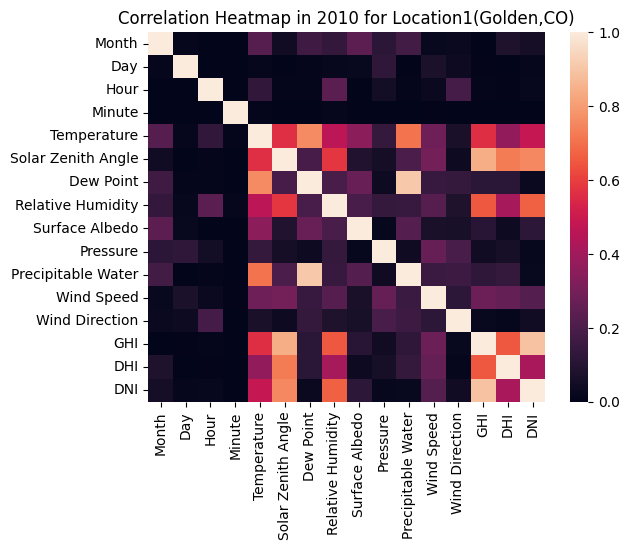

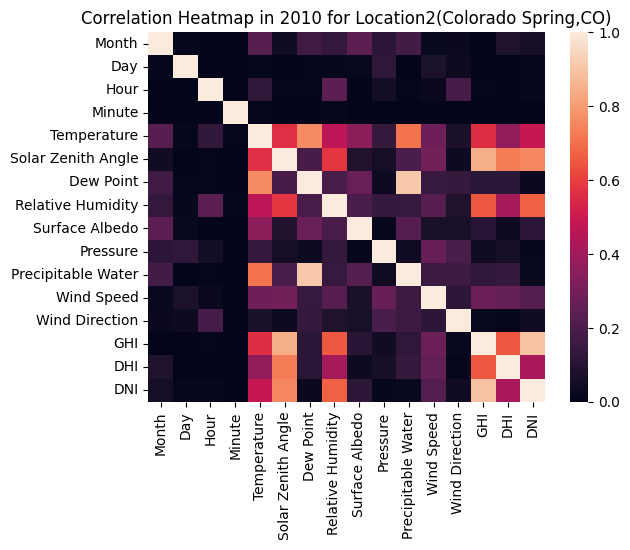

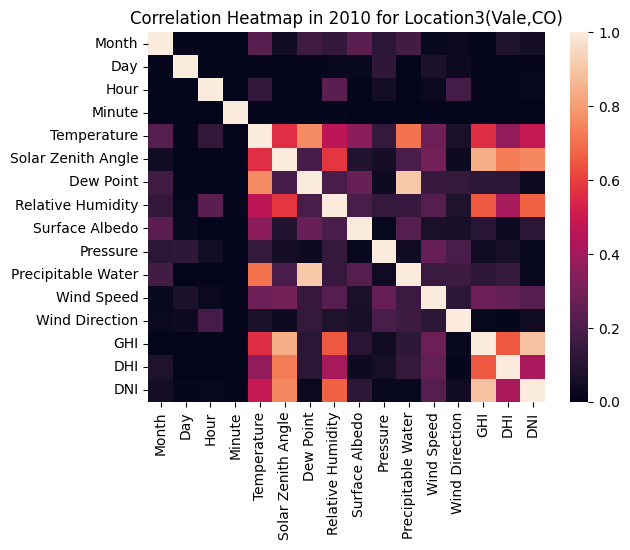

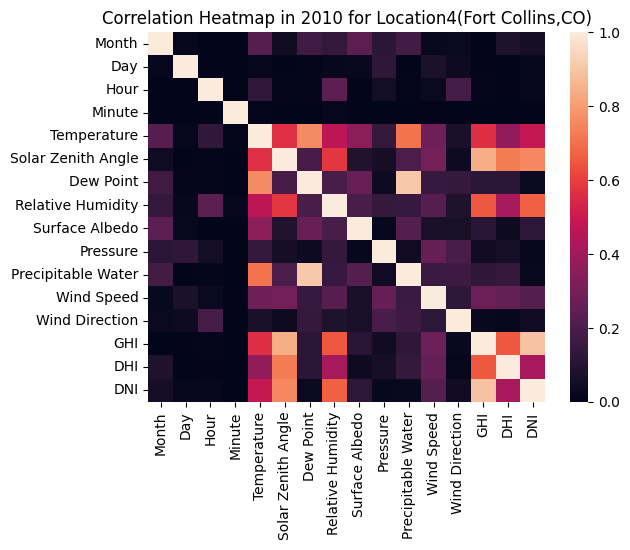

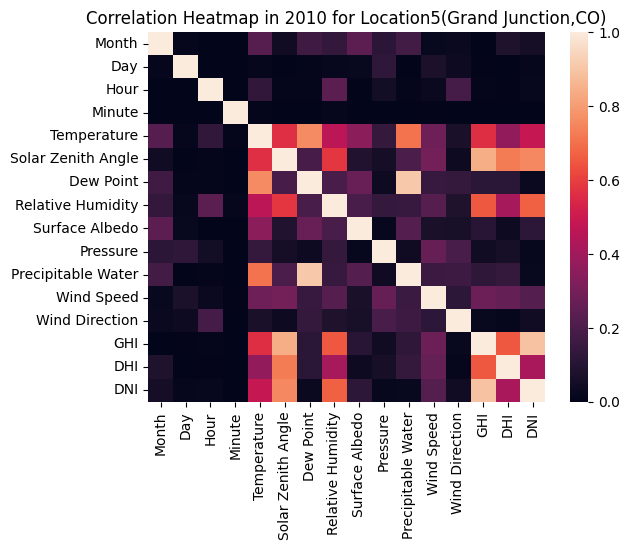

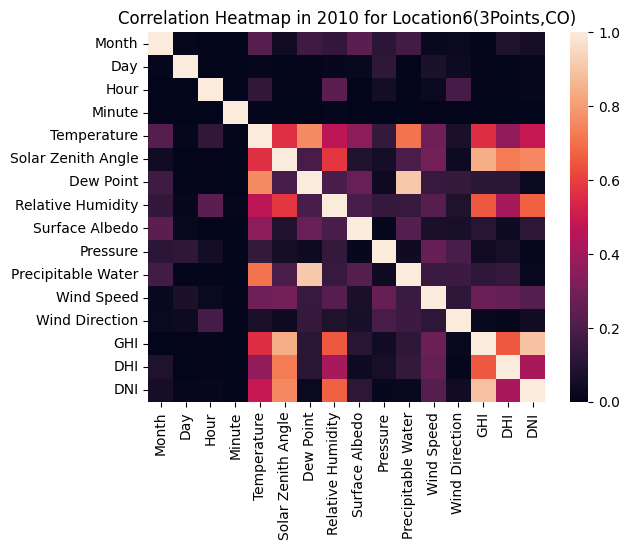

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(locs):
    plt.clf()
    corr_matrix = abs(dff.corr())
    heatmap = sns.heatmap(abs(corr_matrix))
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [123]:
for i in range(locs):
    dfs[i]['DNI after 0.5h'] = dfs[i][['DNI']].shift(1)
    dfs[i]['DNI after 1.0h'] = dfs[i][['DNI']].shift(2)
    dfs[i]['DNI after 1.5h'] = dfs[i][['DNI']].shift(3)
    dfs[i]['DNI after 2.0h'] = dfs[i][['DNI']].shift(4)
    dfs[i]['DNI after 2.5h'] = dfs[i][['DNI']].shift(5)
    dfs[i]['DNI after 3.0h'] = dfs[i][['DNI']].shift(6)
    dfs[i]['DNI after 3.5h'] = dfs[i][['DNI']].shift(7)
    dfs[i]['DNI after 4.0h'] = dfs[i][['DNI']].shift(8)
  
dfs[1].head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [124]:
sub_dfs = []
for i in range(locs):
    sub_dfs.append(dfs[i].iloc[:, 5:])

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


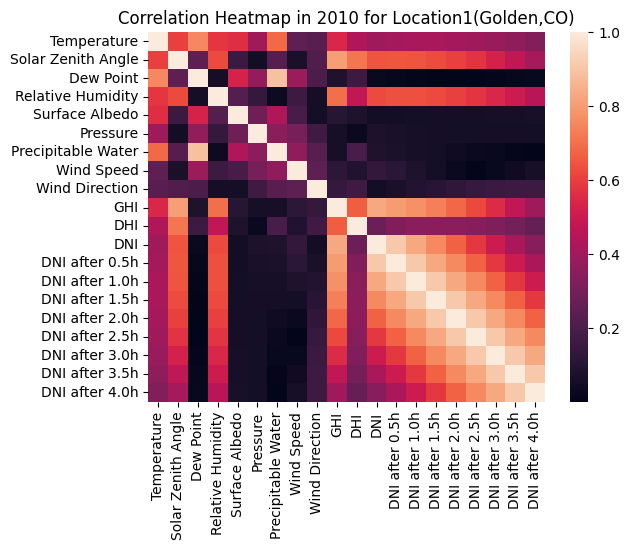

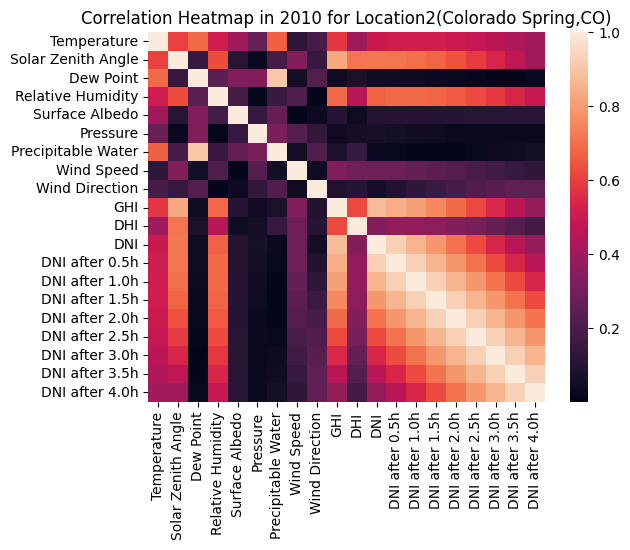

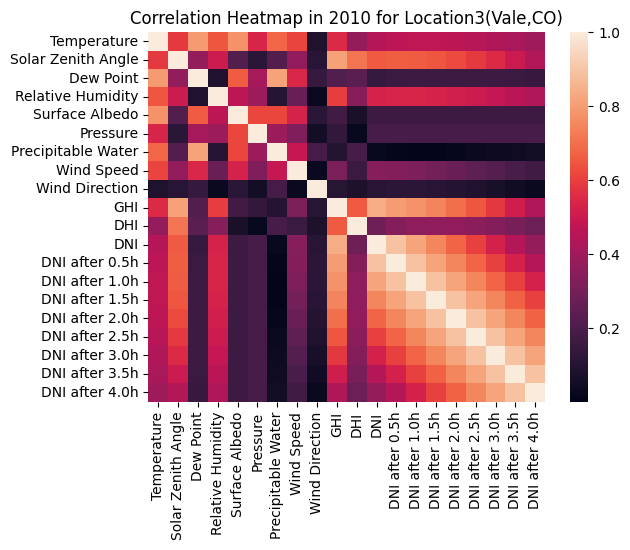

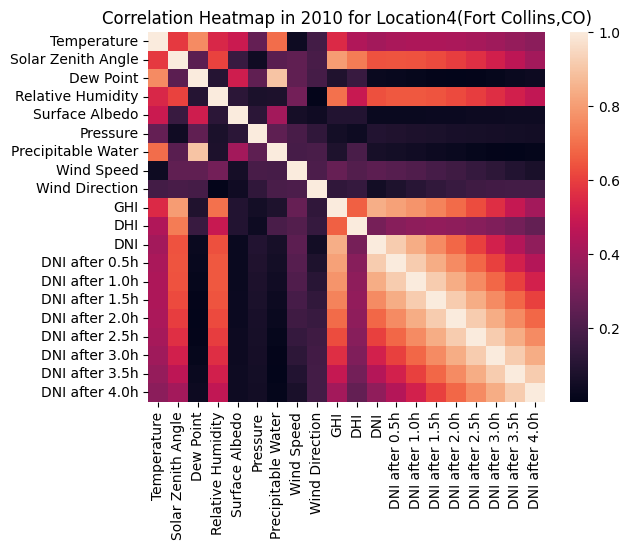

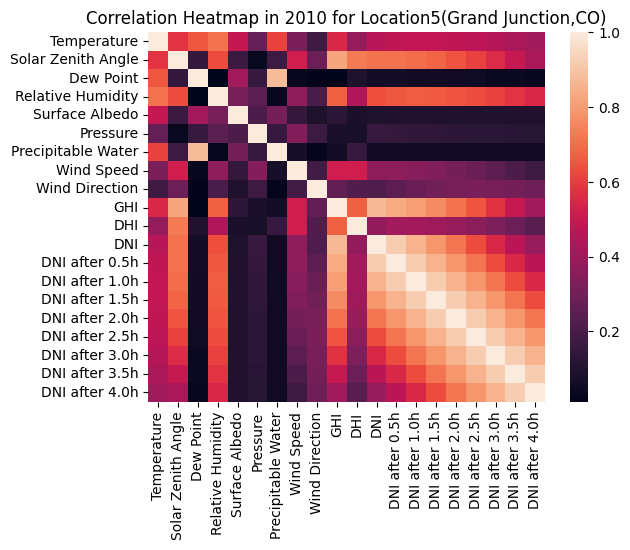

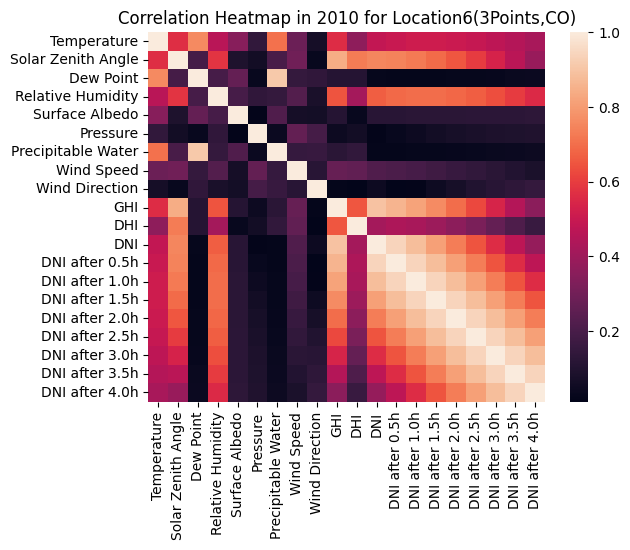

In [125]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr())
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [126]:
for i in range(locs):
    sub_dfs[i].drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,53.95,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,53.94,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,52.81,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,52.81,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,53.11,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


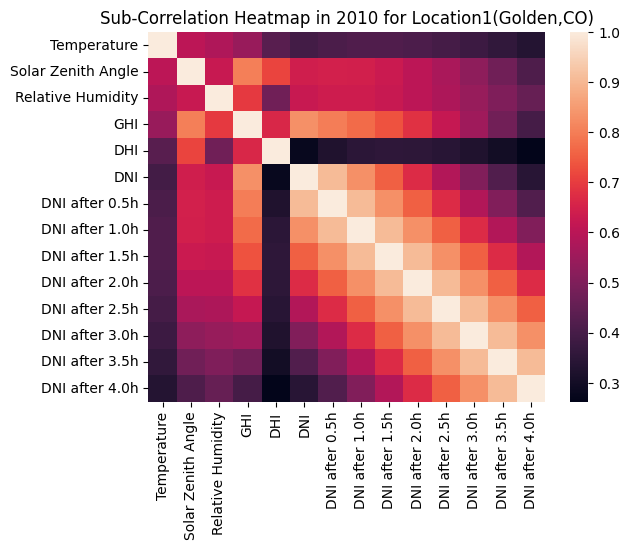

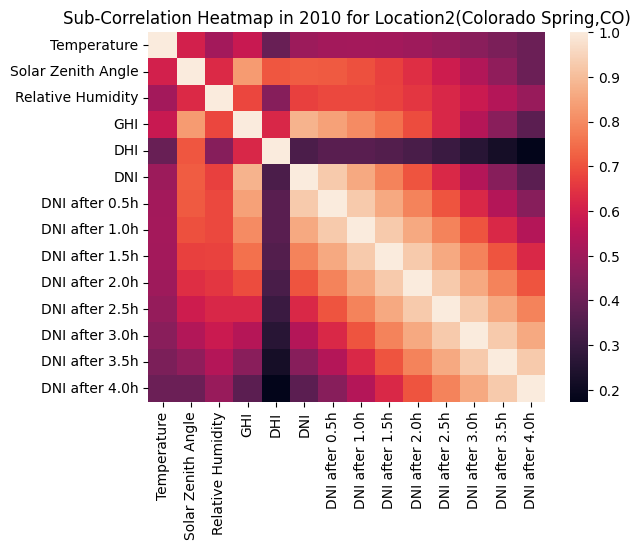

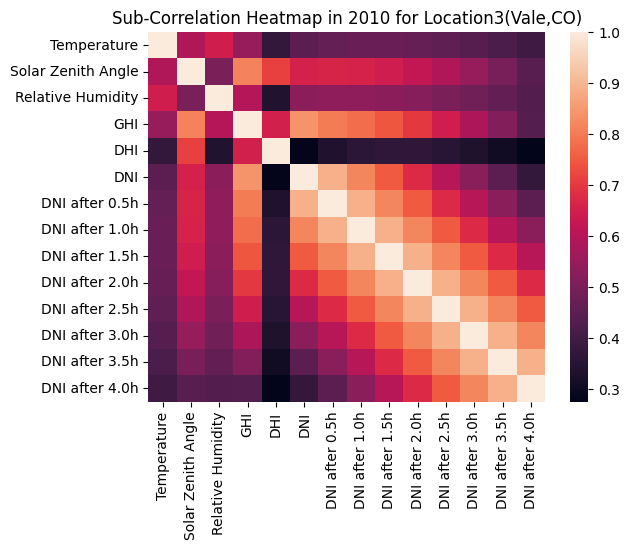

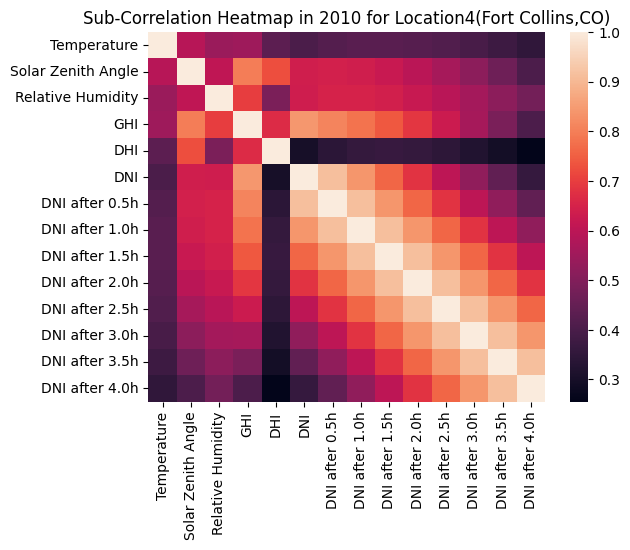

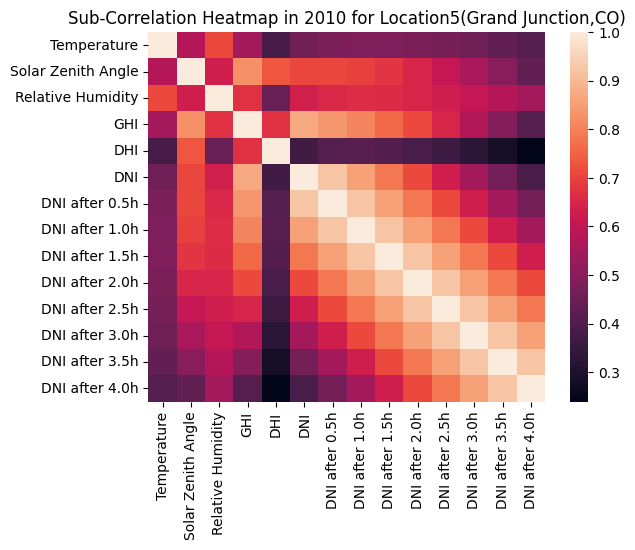

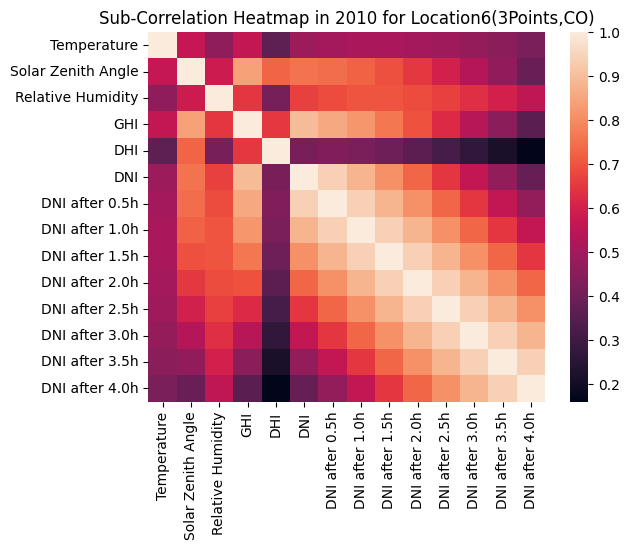

In [127]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr()) 
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Sub-Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

<Figure size 640x480 with 0 Axes>

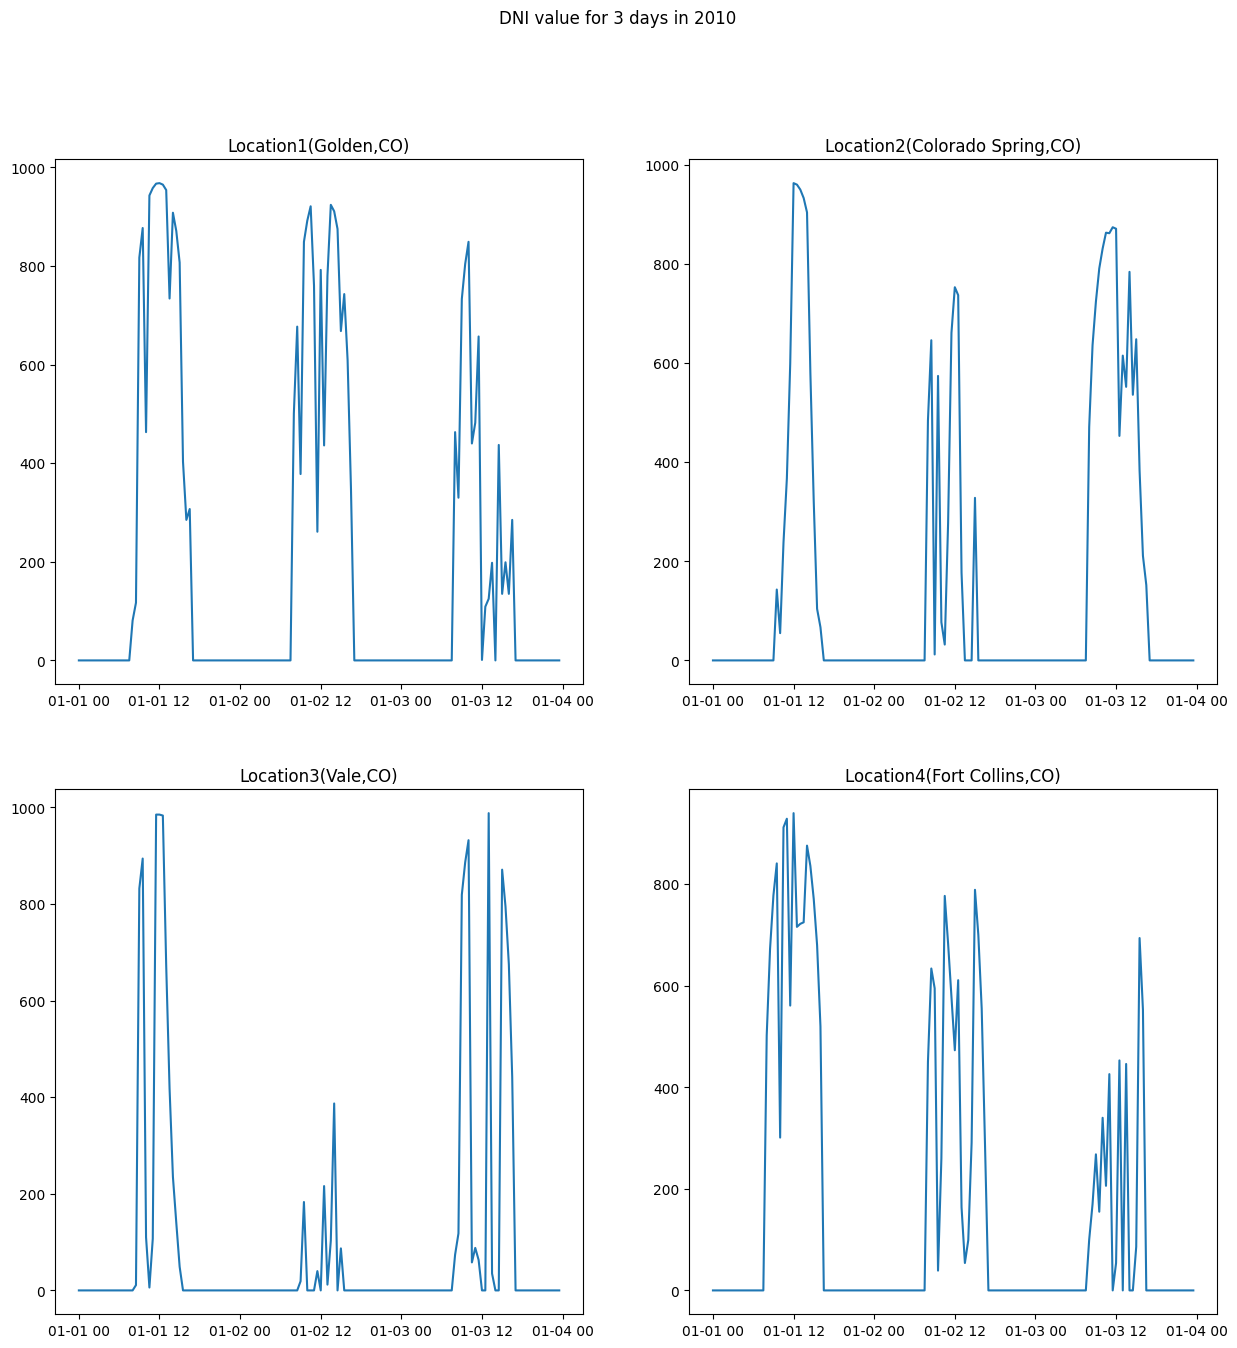

In [128]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('DNI value for 3 days in 2010')
for i, ax in enumerate(axes.flat):
    ax.set_title(text[i])
    ax.plot(dfs[i].index[:48*3], dfs[i]['DNI'][:48*3])
    # plt.xticks(x=dfs[i].index[:48], rotation=45, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

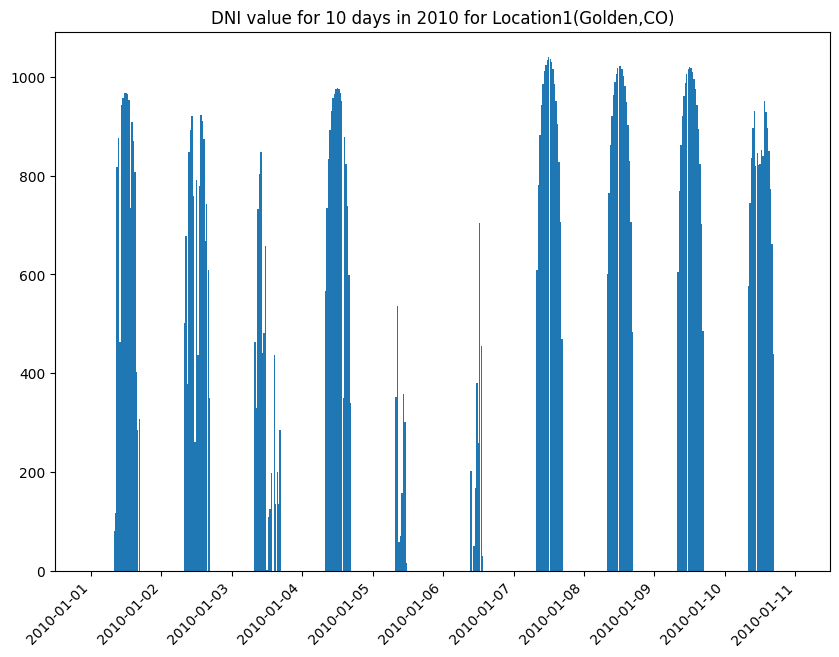

<Figure size 640x480 with 0 Axes>

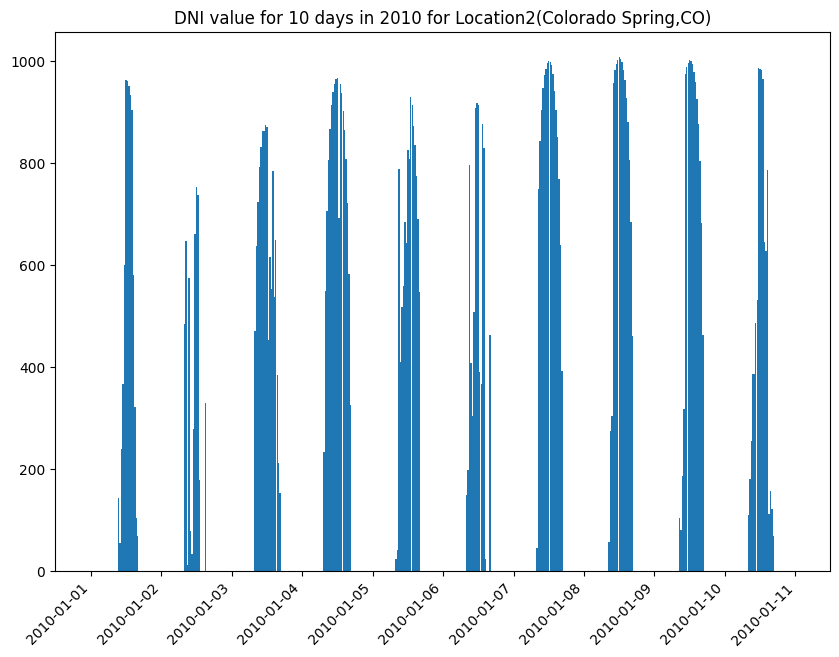

<Figure size 640x480 with 0 Axes>

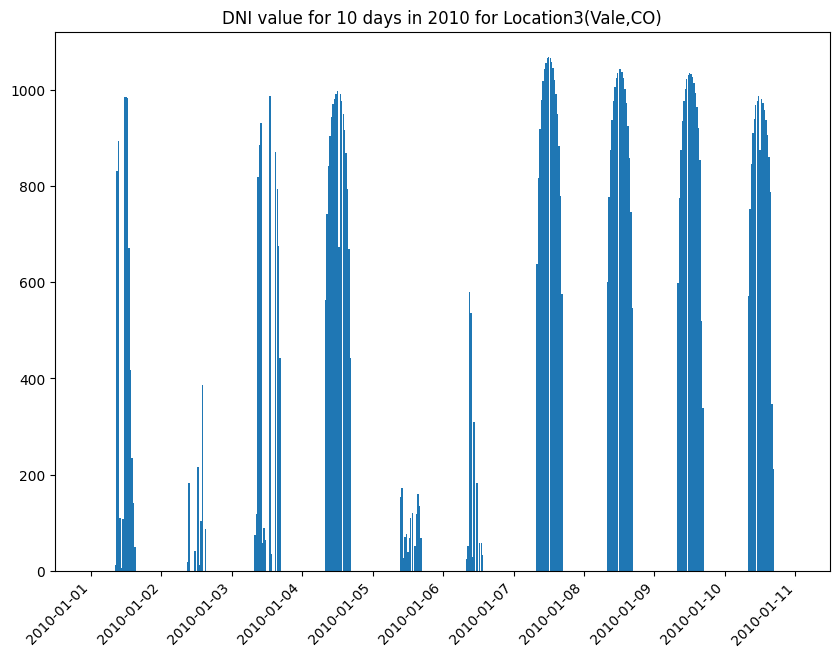

<Figure size 640x480 with 0 Axes>

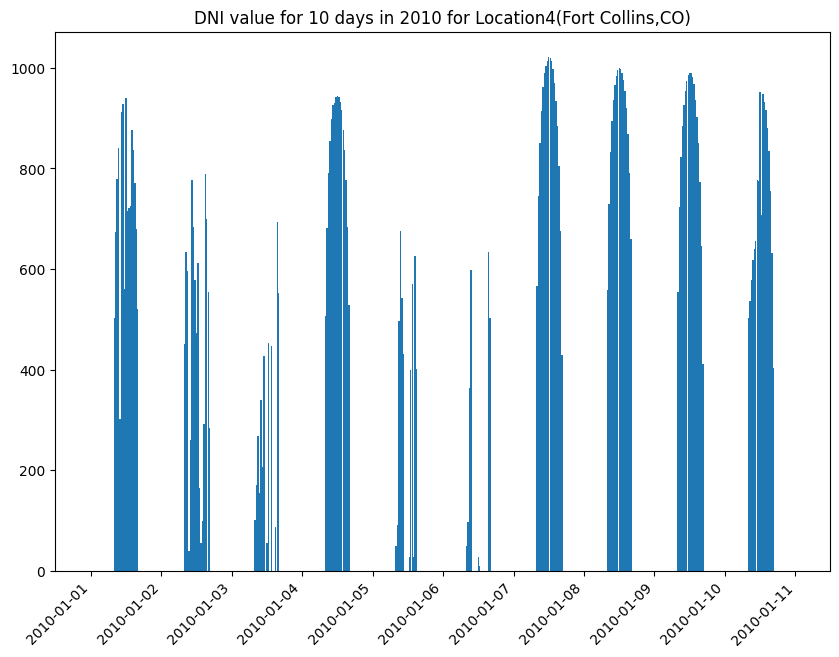

<Figure size 640x480 with 0 Axes>

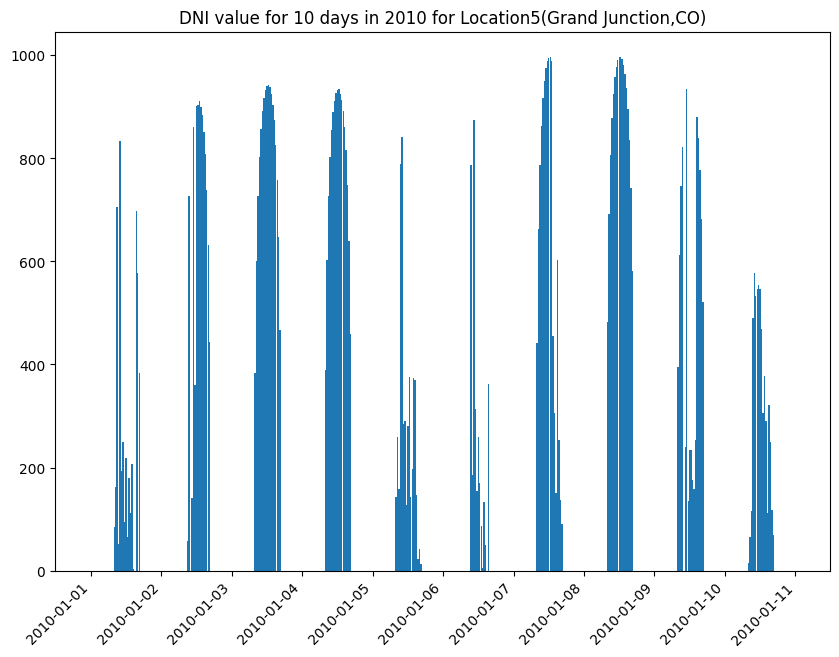

<Figure size 640x480 with 0 Axes>

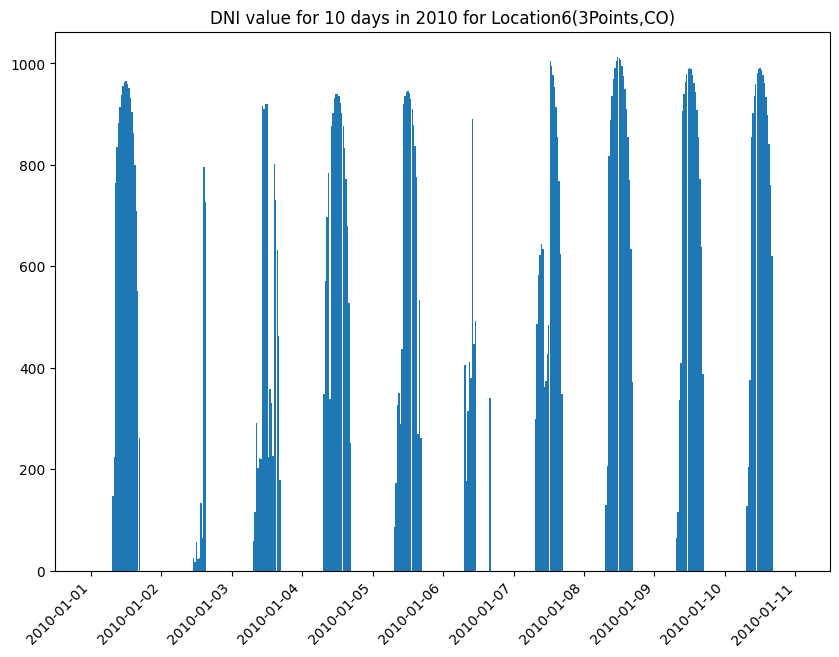

In [129]:
for i in range(locs):
    plt.clf()
    fig = plt.figure(figsize =(10, 7))
    plt.title('DNI value for 10 days in 2010 for {}'.format(text[i]))
    plt.bar(dfs[i].index[:480], dfs[i]['DNI'][:480], width=0.02)

    plt.xticks(x=dfs[i].index[:480], rotation=45, ha='right')
    plt.show()

In [130]:
win_size = 8
X_lst = []
Y_lst = []
for i in range(locs):
    df_fetures = sub_dfs[i].iloc[:,:-8]
    X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
    Y = np.zeros((df_fetures.shape[0] - win_size, 1))
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X.shape, Y.shape))

    for j in range(X.shape[0]):
        chunk_x = df_fetures.iloc[j:j+win_size, :].to_numpy()
        chunk_y = df_fetures.iloc[j+win_size, -1]
        X[j] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
        Y[j]= chunk_y

    X_lst.append(X)
    Y_lst.append(Y)


Location1(Golden,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location2(Colorado Spring,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location3(Vale,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location4(Fort Collins,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location5(Grand Junction,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location6(3Points,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)


In [131]:
# Remove the labels that we are sure they have DNI of 0

for i in range(locs):
    zero_index = []
    for j in range(31, 50):     ## 31 means 7pm, and 50 means 5:30 am
        zero_index = zero_index + list(range(j, Y_lst[i].shape[0], 48))
        ### examples:
        # zero1 = list(range(34, Y.shape[0], 48))    #10pm
        # # zero2 = list(range(35, Y.shape[0], 48))    #11pm

    print("{}\nnum of zero dni: ".format(text[i]), len(zero_index))
    print("This sum must be zeroo ==> ", np.sum(np.take(Y_lst[i], zero_index)))

    Y_lst[i] = np.delete(Y_lst[i], zero_index, axis=0)
    X_lst[i] = np.delete(X_lst[i], zero_index, axis=0)
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X_lst[i].shape, Y_lst[i].shape))


Location1(Golden,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location1(Golden,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location2(Colorado Spring,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location2(Colorado Spring,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location3(Vale,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location3(Vale,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location4(Fort Collins,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location4(Fort Collins,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location5(Grand Junction,CO)
num of zero dni:  6925
This sum must be zeroo ==>  2109.0
Location5(Grand Junction,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location6(3Points,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location6(3Points,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)


In [132]:
big_X = np.zeros((X_lst[0].shape[0]*locs, X_lst[0].shape[1]))
big_Y = np.zeros((Y_lst[0].shape[0]*locs, Y_lst[0].shape[1]))
for i in range(locs):
    big_X[i:i+X_lst[0].shape[0], :] = X_lst[i]
    big_Y[i:i+Y_lst[0].shape[0], :] = Y_lst[i]

big_X[:10]

array([[-10.  , 163.12,  59.53,   0.  ,   0.  ,   0.  , -10.  , 162.32,
         55.02,   0.  ,   0.  ,   0.  , -10.  , 159.5 ,  55.62,   0.  ,
          0.  ,   0.  ,  -9.  , 155.34,  55.63,   0.  ,   0.  ,   0.  ,
         -9.  , 150.42,  57.88,   0.  ,   0.  ,   0.  ,  -9.  , 145.08,
         53.54,   0.  ,   0.  ,   0.  ,  -9.  , 139.51,  57.22,   0.  ,
          0.  ,   0.  ,  -9.  , 133.81,  57.23,   0.  ,   0.  ,   0.  ],
       [ -8.  , 164.18,  53.95,   0.  ,   0.  ,   0.  ,  -7.  , 163.11,
         53.94,   0.  ,   0.  ,   0.  ,  -7.  , 159.95,  52.81,   0.  ,
          0.  ,   0.  ,  -7.  , 155.51,  52.81,   0.  ,   0.  ,   0.  ,
         -8.  , 150.38,  53.11,   0.  ,   0.  ,   0.  ,  -7.  , 144.88,
         49.13,   0.  ,   0.  ,   0.  ,  -7.  , 139.18,  51.95,   0.  ,
          0.  ,   0.  ,  -7.  , 133.37,  51.95,   0.  ,   0.  ,   0.  ],
       [-16.  , 163.24,  77.64,   0.  ,   0.  ,   0.  , -16.  , 162.75,
         77.65,   0.  ,   0.  ,   0.  , -16.  , 160.13,  79.34

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.30

trainX_lst = []
valX_lst = []
testX_lst = []

trainY_lst = []
valY_lst = []
testY_lst = []

trainX_scaled_lst = []
valX_scaled_lst = []
testX_scaled_lst = []

for i in range(locs):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)
    valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    sc=StandardScaler()
    scaler = sc.fit(trainX)
    trainX_scaled = scaler.transform(trainX)
    valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)

    trainX_lst.append(trainX)
    valX_lst.append(valX)
    testX_lst.append(testX)
    
    trainY_lst.append(trainY)
    valY_lst.append(valY)
    testY_lst.append(testY)
    
    trainX_scaled_lst.append(trainX_scaled)
    valX_scaled_lst.append(valX_scaled)
    testX_scaled_lst.append(testX_scaled)
    
    print("=== {} ===".format(text[i]))
    print("trainx size: ", trainX_scaled.shape)
    print("valx size: ", valX_scaled.shape)
    print("testx size: ", testX_scaled.shape)
    print("==============")
    print("trainy size: ", trainY.shape)
    print("valy size: ", valY.shape)
    print("testy size: ", testY.shape)
    print("==============\n\n")

=== Location1(Golden,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location2(Colorado Spring,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location3(Vale,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location4(Fort Collins,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location5(Grand Junction,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location6(3Points,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy

In [134]:
big_trainX, big_testX, big_trainY, big_testY = train_test_split(big_X, big_Y, test_size= 1 - train_ratio)
big_valX, big_testX, big_valY, big_testY = train_test_split(big_testX, big_testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
sc=StandardScaler()
scaler = sc.fit(trainX)
big_trainX_scaled = scaler.transform(big_trainX)
big_valX_scaled = scaler.transform(big_valX)
big_testX_scaled = scaler.transform(big_testX)

In [135]:
# let's try linear regression first
from sklearn import linear_model, metrics

y_pred_linreg_lst = []

for i in range(locs): 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(trainX_scaled_lst[i], trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_linreg = regr.predict(testX_scaled_lst[i])
    y_pred_linreg_lst.append(y_pred_linreg)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=======\n")


=== Location1(Golden,CO) ===
Mean Absolute Error: 59.730069606966644
Mean Squared Error: 12805.556491960073
Root Mean Squared Error: 113.16163878258423

=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 61.63849286341376
Mean Squared Error: 13945.418540998127
Root Mean Squared Error: 118.09072165499764

=== Location3(Vale,CO) ===
Mean Absolute Error: 57.52145927017986
Mean Squared Error: 11686.40889317882
Root Mean Squared Error: 108.10369509493567

=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 57.47306048008908
Mean Squared Error: 11381.76716282224
Root Mean Squared Error: 106.68536527013552

=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 59.29490985630991
Mean Squared Error: 12515.56240823243
Root Mean Squared Error: 111.87297443186371

=== Location6(3Points,CO) ===
Mean Absolute Error: 58.236228808157726
Mean Squared Error: 11937.530001945617
Root Mean Squared Error: 109.25900421450682



In [136]:
from sklearn.svm import SVR

y_pred_svr_lst = []

for i in range(locs):
    regressor = SVR(kernel='poly')
    regressor.fit(trainX_scaled_lst[i],trainY_lst[i])
    y_pred_svr = regressor.predict(testX_scaled_lst[i])
    y_pred_svr_lst.append(y_pred_svr)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=======\n")



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location1(Golden,CO) ===
Mean Absolute Error: 144.15054891890858
Mean Squared Error: 62542.86047750198
Root Mean Squared Error: 250.08570626387663



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 146.0316425970605
Mean Squared Error: 63622.22065736855
Root Mean Squared Error: 252.23445572991915



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location3(Vale,CO) ===
Mean Absolute Error: 138.76150817273108
Mean Squared Error: 59554.61811633974
Root Mean Squared Error: 244.0381488954949



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 139.4834397102921
Mean Squared Error: 59541.828362506305
Root Mean Squared Error: 244.01194307350266



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 143.2121458514631
Mean Squared Error: 62825.07815942441
Root Mean Squared Error: 250.6493131038352



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location6(3Points,CO) ===
Mean Absolute Error: 141.5079861683854
Mean Squared Error: 60710.817471432405
Root Mean Squared Error: 246.39565229815318



In [137]:
input_shape = trainX_lst[0].shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX_lst[0].shape[0] / n_batch_size)
n_validation_steps = int(valX_lst[0].shape[0] / n_batch_size)
n_test_steps = int(testX_lst[0].shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:61
Validation Steps:8
Test Steps:17
Number of Epochs:150


In [138]:
big_input_shape = big_trainX.shape[1]
n_batch_size = 200

big_n_steps_per_epoch = int(big_trainX.shape[0] / n_batch_size)
big_n_validation_steps = int(big_valX.shape[0] / n_batch_size)
big_n_test_steps = int(big_testX.shape[0] / n_batch_size)
n_epochs = 150


print('BIG Input Shape:{} '.format(big_input_shape))
print('BIG Batch Size:{}'.format(n_batch_size))
print('BIG Steps per Epoch:{}'.format(big_n_steps_per_epoch))
print('BIG Validation Steps:{}'.format(big_n_validation_steps))
print('BIG Test Steps:{}'.format(big_n_test_steps))
print('BIG Number of Epochs:{}'.format(n_epochs))

BIG Input Shape:48 
BIG Batch Size:200
BIG Steps per Epoch:222
BIG Validation Steps:31
BIG Test Steps:63
BIG Number of Epochs:150


In [139]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [140]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [141]:
history_lst = []
checkpoint_no_lst = []
model_name_lst = []
for i in range(locs):
    model = build_model()
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # Prepare a directory to store all the checkpoints.
    checkpoint_no = 'ckpt_{}_ANN'.format(i+1)
    model_name = 'dnl_forcast_ANN{}'.format(i+1)
    checkpoint_no_lst.append(checkpoint_no)
    model_name_lst.append(model_name)
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
    history = model.fit(trainX_scaled_lst[i],
                    trainY_lst[i],
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled_lst[i], valY_lst[i]),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])


    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')

    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]

    pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

    
    history_lst.append(history)

Epoch 1/150
22/61 [=========>....................] - ETA: 0s - loss: 212292.0000 - mae: 275.8063 INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 1s 8ms/step - loss: 208371.3125 - mae: 276.7828 - val_loss: 188231.6875 - val_mae: 267.7640
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 163855.1250 - mae: 235.3402INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 131366.0312 - mae: 230.8206 - val_loss: 76843.7969 - val_mae: 182.4902
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 77608.7266 - mae: 190.4505INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 61063.7695 - mae: 164.7840 - val_loss: 41335.4141 - val_mae: 132.1229
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 52944.1719 - mae: 159.1327INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 33170.2266 - mae: 117.8511 - val_loss: 23997.4746 - val_mae: 97.3577
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 21275.4844 - mae: 90.9434INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 23506.4316 - mae: 96.3828 - val_loss: 20274.2812 - val_mae: 88.7431
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 20034.9375 - mae: 91.4512INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 21273.1738 - mae: 92.8143 - val_loss: 18618.6172 - val_mae: 86.1453
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 21587.7227 - mae: 93.6097INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 19757.6133 - mae: 90.0266 - val_loss: 17360.7773 - val_mae: 82.7590
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 19877.1445 - mae: 88.7972INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 18588.4219 - mae: 86.5814 - val_loss: 16204.4805 - val_mae: 79.7113
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 19361.0020 - mae: 90.0919INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 17743.4648 - mae: 83.4927 - val_loss: 15308.2578 - val_mae: 76.8934
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 11859.3789 - mae: 74.5242INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 16351.2979 - mae: 79.5978 - val_loss: 14450.1016 - val_mae: 74.3946
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 17840.1699 - mae: 86.5085INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16498.9258 - mae: 78.7840 - val_loss: 13804.9004 - val_mae: 71.9096
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 12048.5449 - mae: 71.4034INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 15540.9658 - mae: 75.2512 - val_loss: 13095.5049 - val_mae: 67.7694
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 16461.5742 - mae: 78.0884INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 15091.6553 - mae: 72.6847 - val_loss: 12643.8984 - val_mae: 66.7569
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 18716.7109 - mae: 84.4070INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14833.7461 - mae: 71.2358 - val_loss: 12206.1592 - val_mae: 64.0095
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 12340.9463 - mae: 64.0703INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14170.5889 - mae: 68.0684 - val_loss: 12116.8799 - val_mae: 64.5721
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 12852.8125 - mae: 60.4319INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 14074.2549 - mae: 66.9651 - val_loss: 11491.3584 - val_mae: 59.9082
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 10045.9277 - mae: 59.5291INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13611.3408 - mae: 64.8969 - val_loss: 11267.0908 - val_mae: 58.8654
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 16476.5195 - mae: 70.8471INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13551.2686 - mae: 63.4147 - val_loss: 11151.6025 - val_mae: 58.5478
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 11718.3008 - mae: 62.9423INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13179.8994 - mae: 62.6182 - val_loss: 10990.4834 - val_mae: 57.8852
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 13983.2979 - mae: 60.7720INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12494.8311 - mae: 59.2975 - val_loss: 10780.9766 - val_mae: 55.7011
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 17021.4805 - mae: 74.0444INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13036.5449 - mae: 60.0511 - val_loss: 10689.0322 - val_mae: 56.0033
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 14146.7822 - mae: 65.6862INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 12445.0742 - mae: 58.9119 - val_loss: 10462.0430 - val_mae: 53.4987
Epoch 23/150
61/61 [==============================] - 0s 854us/step - loss: 12761.5830 - mae: 58.1884 - val_loss: 10484.5117 - val_mae: 53.7344
Epoch 24/150
61/61 [==============================] - 0s 857us/step - loss: 12020.8037 - mae: 57.2861 - val_loss: 10464.6504 - val_mae: 51.8785
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 11238.1416 - mae: 48.9924INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12773.5430 - mae: 57.5242 - val_loss: 10282.9072 - val_mae: 51.5270
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 9768.1084 - mae: 47.5013INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11708.8330 - mae: 55.0937 - val_loss: 10200.3057 - val_mae: 51.8062
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 8975.7666 - mae: 52.7710INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12562.8818 - mae: 56.3347 - val_loss: 10061.6387 - val_mae: 50.1870
Epoch 28/150
61/61 [==============================] - 0s 811us/step - loss: 12118.0020 - mae: 54.5460 - val_loss: 10118.6016 - val_mae: 49.7454
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 9267.6514 - mae: 51.2000INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11673.7412 - mae: 54.3310 - val_loss: 10017.4824 - val_mae: 49.5500
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 9545.6484 - mae: 52.5079INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11921.6416 - mae: 54.7767 - val_loss: 10006.7988 - val_mae: 49.2961
Epoch 31/150
61/61 [==============================] - 0s 820us/step - loss: 11613.3340 - mae: 53.7103 - val_loss: 10052.3721 - val_mae: 49.5963
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 9512.9541 - mae: 51.3209INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11996.1719 - mae: 53.8887 - val_loss: 9939.4102 - val_mae: 48.5119
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 15491.6748 - mae: 58.7463INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11393.8389 - mae: 52.3582 - val_loss: 9926.1982 - val_mae: 47.8983
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 9750.4756 - mae: 50.7597INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11564.7900 - mae: 52.5467 - val_loss: 9925.8867 - val_mae: 49.1626
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 9641.9980 - mae: 51.0019INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11855.1689 - mae: 52.9407 - val_loss: 9884.5400 - val_mae: 48.9402
Epoch 36/150
61/61 [==============================] - 0s 859us/step - loss: 11402.5264 - mae: 51.3921 - val_loss: 9946.2588 - val_mae: 47.5543
Epoch 37/150
61/61 [==============================] - 0s 853us/step - loss: 11883.8516 - mae: 53.2725 - val_loss: 9948.7666 - val_mae: 47.4610
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 10201.7363 - mae: 47.9233INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11274.0811 - mae: 51.2547 - val_loss: 9767.7842 - val_mae: 47.3390
Epoch 39/150
61/61 [==============================] - 0s 814us/step - loss: 11474.2920 - mae: 51.8298 - val_loss: 9785.3564 - val_mae: 46.6175
Epoch 40/150
61/61 [==============================] - 0s 826us/step - loss: 11187.8643 - mae: 50.9720 - val_loss: 9813.2139 - val_mae: 47.7448
Epoch 41/150
61/61 [==============================] - 0s 822us/step - loss: 11341.5439 - mae: 51.0875 - val_loss: 9772.9814 - val_mae: 46.5317
Epoch 42/150
61/61 [==============================] - 0s 812us/step - loss: 11249.0693 - mae: 50.3445 - val_loss: 9907.0273 - val_mae: 45.5827
Epoch 43/150
61/61 [==============================] - 0s 811us/step - loss: 11522.8652 - mae: 51.3229 - val_loss: 9851.6807 - val_mae: 46.2699
Epoch 44/150
61/61 [==============================] - 0s 817us/step - loss: 11314.2012 - mae: 51.3073 - val_loss: 9776.2588 - val_mae: 47.4346
Epoch 45/150
6

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10780.5166 - mae: 49.5992 - val_loss: 9746.5752 - val_mae: 47.4894
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 8211.3584 - mae: 41.6710INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11035.9521 - mae: 49.9480 - val_loss: 9681.6064 - val_mae: 46.0298
Epoch 48/150
61/61 [==============================] - 0s 834us/step - loss: 11298.6230 - mae: 49.7251 - val_loss: 9815.6816 - val_mae: 49.5364
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 15939.7402 - mae: 64.8516INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 1s 15ms/step - loss: 11205.4785 - mae: 50.0281 - val_loss: 9656.4922 - val_mae: 46.4437
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 13615.7764 - mae: 52.6019INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10761.4395 - mae: 49.0981 - val_loss: 9644.8516 - val_mae: 46.4242
Epoch 51/150
61/61 [==============================] - 0s 872us/step - loss: 11322.8730 - mae: 49.8330 - val_loss: 9695.7373 - val_mae: 45.8483
Epoch 52/150
61/61 [==============================] - 0s 868us/step - loss: 11382.7207 - mae: 50.4660 - val_loss: 9733.7197 - val_mae: 48.1948
Epoch 53/150
61/61 [==============================] - 0s 929us/step - loss: 11140.8965 - mae: 49.9834 - val_loss: 9682.7803 - val_mae: 45.4976
Epoch 54/150
61/61 [==============================] - 0s 881us/step - loss: 10867.1006 - mae: 49.1743 - val_loss: 9663.5146 - val_mae: 44.8413
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 7528.3657 - mae: 41.4130INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11116.6055 - mae: 49.6737 - val_loss: 9626.7998 - val_mae: 47.5491
Epoch 56/150
 1/61 [..............................] - ETA: 0s - loss: 9458.4111 - mae: 47.5438INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10991.5996 - mae: 49.5765 - val_loss: 9571.5215 - val_mae: 46.1484
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 8549.6709 - mae: 45.6469INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11151.9492 - mae: 49.5098 - val_loss: 9526.9639 - val_mae: 44.8913
Epoch 58/150
 1/61 [..............................] - ETA: 0s - loss: 13425.4521 - mae: 52.6495INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10850.4736 - mae: 48.5787 - val_loss: 9516.5225 - val_mae: 45.3632
Epoch 59/150
 1/61 [..............................] - ETA: 0s - loss: 16704.6016 - mae: 59.1954INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11225.1826 - mae: 49.4309 - val_loss: 9505.7939 - val_mae: 45.5432
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 10350.4492 - mae: 46.9847INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10939.4902 - mae: 48.4166 - val_loss: 9499.6016 - val_mae: 45.0821
Epoch 61/150
61/61 [==============================] - 0s 858us/step - loss: 10825.6240 - mae: 48.1438 - val_loss: 9554.4385 - val_mae: 46.0772
Epoch 62/150
61/61 [==============================] - 0s 885us/step - loss: 10923.3457 - mae: 48.8956 - val_loss: 9548.2627 - val_mae: 46.9119
Epoch 63/150
61/61 [==============================] - 0s 838us/step - loss: 10905.9443 - mae: 48.5245 - val_loss: 9519.3359 - val_mae: 45.8374
Epoch 64/150
61/61 [==============================] - 0s 796us/step - loss: 10904.4180 - mae: 48.4733 - val_loss: 9575.9590 - val_mae: 46.2702
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 10364.6133 - mae: 46.7689INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10859.4902 - mae: 48.3969 - val_loss: 9477.6279 - val_mae: 45.0478
Epoch 66/150
 1/61 [..............................] - ETA: 0s - loss: 13555.1826 - mae: 54.9016INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11034.9297 - mae: 48.5036 - val_loss: 9448.6777 - val_mae: 44.5022
Epoch 67/150
61/61 [==============================] - 0s 868us/step - loss: 10866.1445 - mae: 48.3075 - val_loss: 9494.0439 - val_mae: 46.5445
Epoch 68/150
61/61 [==============================] - 0s 853us/step - loss: 10719.6055 - mae: 48.6404 - val_loss: 9482.7217 - val_mae: 45.1437
Epoch 69/150
61/61 [==============================] - 0s 841us/step - loss: 10688.7656 - mae: 47.8011 - val_loss: 9483.7734 - val_mae: 45.5891
Epoch 70/150
61/61 [==============================] - 0s 874us/step - loss: 10988.6738 - mae: 48.2177 - val_loss: 9607.3086 - val_mae: 48.3680
Epoch 71/150
 1/61 [..............................] - ETA: 0s - loss: 10459.0430 - mae: 47.2229INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10960.6016 - mae: 48.5202 - val_loss: 9427.4541 - val_mae: 44.7450
Epoch 72/150
61/61 [==============================] - 0s 894us/step - loss: 10738.0410 - mae: 47.8541 - val_loss: 9459.8896 - val_mae: 45.3775
Epoch 73/150
61/61 [==============================] - 0s 865us/step - loss: 10557.2197 - mae: 47.4084 - val_loss: 9437.3320 - val_mae: 44.6879
Epoch 74/150
61/61 [==============================] - 0s 858us/step - loss: 10868.1465 - mae: 48.7541 - val_loss: 9445.9473 - val_mae: 44.1954
Epoch 75/150
 1/61 [..............................] - ETA: 0s - loss: 11812.3164 - mae: 49.6595INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10628.3486 - mae: 47.5669 - val_loss: 9405.7148 - val_mae: 43.8189
Epoch 76/150
61/61 [==============================] - 0s 851us/step - loss: 10952.1084 - mae: 48.4602 - val_loss: 9467.4346 - val_mae: 45.0203
Epoch 77/150
61/61 [==============================] - 0s 843us/step - loss: 10910.2637 - mae: 47.9787 - val_loss: 9562.3760 - val_mae: 47.6980
Epoch 78/150
61/61 [==============================] - 0s 871us/step - loss: 10823.6934 - mae: 48.4562 - val_loss: 9604.0303 - val_mae: 47.8380
Epoch 79/150
61/61 [==============================] - 0s 854us/step - loss: 10627.1924 - mae: 47.8479 - val_loss: 9420.5059 - val_mae: 44.1155
Epoch 80/150
61/61 [==============================] - 0s 847us/step - loss: 10708.7100 - mae: 48.2667 - val_loss: 9444.4238 - val_mae: 46.0993
Epoch 81/150
61/61 [==============================] - 0s 891us/step - loss: 11262.1797 - mae: 48.6440 - val_loss: 9429.7070 - val_mae: 43.9533
Epoch 82/150
6

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10261.0762 - mae: 46.4042 - val_loss: 9378.8604 - val_mae: 44.4150
Epoch 88/150
61/61 [==============================] - 0s 893us/step - loss: 10671.1377 - mae: 47.0357 - val_loss: 9427.2354 - val_mae: 44.1622
Epoch 89/150
61/61 [==============================] - 0s 853us/step - loss: 10620.9844 - mae: 47.5847 - val_loss: 9458.0088 - val_mae: 46.2227
Epoch 90/150
61/61 [==============================] - 0s 827us/step - loss: 11143.9902 - mae: 48.9366 - val_loss: 9429.9297 - val_mae: 44.7747
Epoch 91/150
61/61 [==============================] - 0s 807us/step - loss: 10913.8203 - mae: 47.3415 - val_loss: 9428.7715 - val_mae: 45.4906
Epoch 92/150
 1/61 [..............................] - ETA: 0s - loss: 10975.8379 - mae: 49.6435INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 9630.6953 - mae: 44.8952 - val_loss: 9373.2129 - val_mae: 43.5018
Epoch 93/150
61/61 [==============================] - 0s 874us/step - loss: 11388.7539 - mae: 49.3186 - val_loss: 9403.9141 - val_mae: 43.7447
Epoch 94/150
61/61 [==============================] - 0s 887us/step - loss: 10750.5068 - mae: 47.4572 - val_loss: 9470.2822 - val_mae: 46.3194
Epoch 95/150
61/61 [==============================] - 0s 848us/step - loss: 10327.7451 - mae: 46.7286 - val_loss: 9413.2451 - val_mae: 44.8070
Epoch 96/150
61/61 [==============================] - 0s 880us/step - loss: 10743.5889 - mae: 47.1301 - val_loss: 9459.2725 - val_mae: 46.2198
Epoch 97/150
61/61 [==============================] - 0s 849us/step - loss: 10415.8193 - mae: 47.1021 - val_loss: 9402.2500 - val_mae: 42.7805
Epoch 98/150
 1/61 [..............................] - ETA: 0s - loss: 6078.3364 - mae: 38.0318INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10364.4893 - mae: 46.2704 - val_loss: 9353.9795 - val_mae: 44.0519
Epoch 99/150
61/61 [==============================] - 0s 869us/step - loss: 10561.0391 - mae: 47.6981 - val_loss: 9369.3848 - val_mae: 44.4562
Epoch 100/150
61/61 [==============================] - 0s 855us/step - loss: 11115.7842 - mae: 48.3930 - val_loss: 9487.7979 - val_mae: 43.3042
Epoch 101/150
 1/61 [..............................] - ETA: 0s - loss: 12205.3242 - mae: 51.1742INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10118.0557 - mae: 46.4611 - val_loss: 9333.8037 - val_mae: 44.7542
Epoch 102/150
61/61 [==============================] - 0s 959us/step - loss: 10225.0791 - mae: 46.7316 - val_loss: 9355.6377 - val_mae: 43.4541
Epoch 103/150
61/61 [==============================] - 0s 881us/step - loss: 10484.0557 - mae: 46.4443 - val_loss: 9446.0938 - val_mae: 46.8653
Epoch 104/150
61/61 [==============================] - 0s 858us/step - loss: 10710.1455 - mae: 47.7022 - val_loss: 9410.1729 - val_mae: 43.8579
Epoch 105/150
61/61 [==============================] - 0s 859us/step - loss: 10913.5703 - mae: 47.4451 - val_loss: 9342.0723 - val_mae: 43.7609
Epoch 106/150
61/61 [==============================] - 0s 846us/step - loss: 10511.6602 - mae: 47.6414 - val_loss: 9388.1211 - val_mae: 44.4717
Epoch 107/150
61/61 [==============================] - 0s 844us/step - loss: 10587.0137 - mae: 46.4993 - val_loss: 9386.8779 - val_mae: 43.7588
Epoch 10

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 10573.6953 - mae: 47.2207 - val_loss: 9329.8428 - val_mae: 43.2487
Epoch 119/150
61/61 [==============================] - 0s 1ms/step - loss: 10573.6543 - mae: 46.7955 - val_loss: 9425.2695 - val_mae: 43.7923
Epoch 120/150
 1/61 [..............................] - ETA: 0s - loss: 9638.8613 - mae: 45.6234INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10259.4268 - mae: 46.6068 - val_loss: 9328.5205 - val_mae: 43.3641
Epoch 121/150
61/61 [==============================] - 0s 976us/step - loss: 10463.3457 - mae: 46.9073 - val_loss: 9363.3945 - val_mae: 43.1470
Epoch 122/150
61/61 [==============================] - 0s 991us/step - loss: 10405.0811 - mae: 46.9006 - val_loss: 9374.4873 - val_mae: 42.6760
Epoch 123/150
 1/61 [..............................] - ETA: 0s - loss: 15864.5771 - mae: 54.0140INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 10471.0029 - mae: 46.6921 - val_loss: 9327.5078 - val_mae: 42.9615
Epoch 124/150
61/61 [==============================] - 0s 2ms/step - loss: 10441.8779 - mae: 46.8566 - val_loss: 9334.9492 - val_mae: 42.3911
Epoch 125/150
61/61 [==============================] - 0s 933us/step - loss: 10403.8828 - mae: 46.0776 - val_loss: 9376.2373 - val_mae: 45.2449
Epoch 126/150
61/61 [==============================] - 0s 1ms/step - loss: 10299.7627 - mae: 46.1085 - val_loss: 9365.0596 - val_mae: 44.2461
Epoch 127/150
61/61 [==============================] - 0s 910us/step - loss: 10565.4326 - mae: 46.8183 - val_loss: 9349.5117 - val_mae: 43.1405
Epoch 128/150
61/61 [==============================] - 0s 1ms/step - loss: 10238.6992 - mae: 46.2332 - val_loss: 9470.6133 - val_mae: 47.5572
Epoch 129/150
 1/61 [..............................] - ETA: 0s - loss: 9739.2998 - mae: 48.3582INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10411.1094 - mae: 46.6926 - val_loss: 9307.6846 - val_mae: 42.9366
Epoch 130/150
61/61 [==============================] - 0s 1ms/step - loss: 10708.8203 - mae: 46.9979 - val_loss: 9499.9736 - val_mae: 44.2509
Epoch 131/150
61/61 [==============================] - 0s 981us/step - loss: 9963.5117 - mae: 45.5329 - val_loss: 9352.0117 - val_mae: 43.4550
Epoch 132/150
61/61 [==============================] - 0s 883us/step - loss: 10310.8359 - mae: 46.3811 - val_loss: 9530.3154 - val_mae: 48.1198
Epoch 133/150
61/61 [==============================] - 0s 929us/step - loss: 10522.1846 - mae: 47.2001 - val_loss: 9408.9902 - val_mae: 46.2838
Epoch 134/150
61/61 [==============================] - 0s 872us/step - loss: 10078.0850 - mae: 46.4793 - val_loss: 9347.9072 - val_mae: 43.3768
Epoch 135/150
61/61 [==============================] - 0s 835us/step - loss: 10385.2578 - mae: 46.5381 - val_loss: 9468.9102 - val_mae: 47.9972
Epoch 136/1

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 1s 7ms/step - loss: 208630.8750 - mae: 275.8168 - val_loss: 187126.2188 - val_mae: 268.2894
Epoch 2/150
42/61 [===================>..........] - ETA: 0s - loss: 141687.0781 - mae: 234.5087INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 7ms/step - loss: 125811.2266 - mae: 222.4784 - val_loss: 83199.0859 - val_mae: 189.3544
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 89778.2734 - mae: 194.2247INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 59915.7070 - mae: 159.3611 - val_loss: 47827.3359 - val_mae: 144.0037
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 37565.0156 - mae: 123.3036INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 6ms/step - loss: 32974.8633 - mae: 117.2098 - val_loss: 28097.1230 - val_mae: 106.4571
Epoch 5/150
37/61 [=================>............] - ETA: 0s - loss: 24522.9238 - mae: 100.6492INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 5ms/step - loss: 23629.4316 - mae: 98.1121 - val_loss: 23807.3691 - val_mae: 97.4632
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 23650.3203 - mae: 94.0758INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 21233.9570 - mae: 94.0401 - val_loss: 22137.9766 - val_mae: 93.8056
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 19922.9570 - mae: 87.8093INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 19697.7305 - mae: 90.3197 - val_loss: 20993.5742 - val_mae: 90.5943
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 20281.7168 - mae: 91.9560INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 19003.3887 - mae: 88.2101 - val_loss: 19828.3750 - val_mae: 87.4651
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 20815.5684 - mae: 90.0111INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 18032.4785 - mae: 84.9830 - val_loss: 18912.0352 - val_mae: 84.6634
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 13214.5752 - mae: 81.2290INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 16965.1250 - mae: 80.6849 - val_loss: 18276.7363 - val_mae: 81.2205
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 15438.5947 - mae: 76.4235INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 16392.2832 - mae: 78.8066 - val_loss: 17373.7148 - val_mae: 78.5665
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 12576.4209 - mae: 71.2842INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 15807.0469 - mae: 75.7590 - val_loss: 16670.3086 - val_mae: 76.1769
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 16944.9883 - mae: 82.0058INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 15365.1084 - mae: 73.8541 - val_loss: 15912.9912 - val_mae: 73.6135
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 12807.0713 - mae: 64.6180INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14025.7266 - mae: 69.5485 - val_loss: 15392.2549 - val_mae: 71.0381
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 12545.6602 - mae: 65.4690INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14030.2471 - mae: 67.8693 - val_loss: 14913.2100 - val_mae: 69.1472
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 12789.7246 - mae: 64.2779INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13861.0312 - mae: 66.3854 - val_loss: 14562.6865 - val_mae: 67.2887
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 9740.9121 - mae: 58.8915INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13216.4502 - mae: 64.5656 - val_loss: 14367.2217 - val_mae: 65.2716
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 9894.3691 - mae: 59.9576INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 12641.5088 - mae: 62.2864 - val_loss: 13939.6426 - val_mae: 64.2039
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 10562.7842 - mae: 59.4429INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12596.2168 - mae: 60.8644 - val_loss: 13634.3633 - val_mae: 63.4631
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 8566.8906 - mae: 53.4297INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12619.3506 - mae: 60.1616 - val_loss: 13540.4473 - val_mae: 60.8803
Epoch 21/150
61/61 [==============================] - 0s 862us/step - loss: 12489.3770 - mae: 59.2386 - val_loss: 13610.8721 - val_mae: 60.1470
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 23041.4258 - mae: 75.8162INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11942.3359 - mae: 57.2212 - val_loss: 13113.1963 - val_mae: 59.1483
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 11429.2100 - mae: 54.6387INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 1s 13ms/step - loss: 11911.2314 - mae: 56.0709 - val_loss: 12930.7139 - val_mae: 58.5587
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 14429.2500 - mae: 58.3102INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11821.7598 - mae: 55.6261 - val_loss: 12892.2178 - val_mae: 56.7167
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 17937.1484 - mae: 63.7256INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 11562.1885 - mae: 54.1835 - val_loss: 12699.1387 - val_mae: 55.9547
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 15010.2188 - mae: 64.8238INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 11995.8213 - mae: 54.5992 - val_loss: 12611.2471 - val_mae: 56.6919
Epoch 27/150
61/61 [==============================] - 0s 920us/step - loss: 11201.8203 - mae: 52.2558 - val_loss: 12670.1787 - val_mae: 54.4555
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 6722.5273 - mae: 42.7883INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11388.4521 - mae: 53.4761 - val_loss: 12562.2021 - val_mae: 54.2847
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 13801.9473 - mae: 56.1873INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11078.0391 - mae: 51.4615 - val_loss: 12503.9385 - val_mae: 53.1366
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 9576.3174 - mae: 50.6801INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11696.0986 - mae: 53.3338 - val_loss: 12182.3115 - val_mae: 54.6307
Epoch 31/150
61/61 [==============================] - 0s 836us/step - loss: 11365.2822 - mae: 52.2166 - val_loss: 12186.3301 - val_mae: 53.9240
Epoch 32/150
61/61 [==============================] - 0s 823us/step - loss: 10906.8398 - mae: 50.7147 - val_loss: 12229.7617 - val_mae: 52.8583
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 9921.4766 - mae: 53.2278INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11453.7148 - mae: 51.6879 - val_loss: 12134.8164 - val_mae: 53.5934
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 11028.4004 - mae: 53.3011INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10653.6670 - mae: 50.4400 - val_loss: 12088.9238 - val_mae: 51.5192
Epoch 35/150
61/61 [==============================] - 0s 880us/step - loss: 11416.8242 - mae: 51.8151 - val_loss: 12170.2549 - val_mae: 51.7167
Epoch 36/150
61/61 [==============================] - 0s 846us/step - loss: 11037.7871 - mae: 50.3765 - val_loss: 12155.7939 - val_mae: 51.2457
Epoch 37/150
61/61 [==============================] - 0s 895us/step - loss: 10808.3730 - mae: 49.7881 - val_loss: 12185.3350 - val_mae: 52.2572
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 9501.5967 - mae: 50.1372INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10935.5811 - mae: 50.1865 - val_loss: 11991.9004 - val_mae: 51.2792
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 13259.9150 - mae: 53.0468INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10604.6982 - mae: 49.9101 - val_loss: 11914.9336 - val_mae: 51.3346
Epoch 40/150
61/61 [==============================] - 0s 837us/step - loss: 11204.6113 - mae: 50.2332 - val_loss: 11971.9238 - val_mae: 51.3728
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 11921.7129 - mae: 50.0055INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10550.6230 - mae: 49.1655 - val_loss: 11835.2422 - val_mae: 51.1628
Epoch 42/150
61/61 [==============================] - 0s 2ms/step - loss: 11164.3564 - mae: 49.5969 - val_loss: 11845.8096 - val_mae: 50.5173
Epoch 43/150
61/61 [==============================] - 0s 902us/step - loss: 10224.1973 - mae: 48.0028 - val_loss: 11885.6084 - val_mae: 50.9920
Epoch 44/150
61/61 [==============================] - 0s 866us/step - loss: 10948.0898 - mae: 50.0186 - val_loss: 12161.1172 - val_mae: 51.6318
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 7171.6523 - mae: 44.3379INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10987.7490 - mae: 50.0210 - val_loss: 11790.0078 - val_mae: 50.5208
Epoch 46/150
 1/61 [..............................] - ETA: 0s - loss: 8201.1006 - mae: 43.0705INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10259.1992 - mae: 47.5795 - val_loss: 11625.8379 - val_mae: 51.0599
Epoch 47/150
61/61 [==============================] - 0s 834us/step - loss: 10478.2734 - mae: 48.8861 - val_loss: 12024.9189 - val_mae: 49.6010
Epoch 48/150
61/61 [==============================] - 0s 821us/step - loss: 10861.5342 - mae: 48.7484 - val_loss: 11704.4287 - val_mae: 50.4066
Epoch 49/150
61/61 [==============================] - 0s 857us/step - loss: 10655.3145 - mae: 48.7762 - val_loss: 11749.0498 - val_mae: 49.7637
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 10681.3936 - mae: 46.5580INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10890.0947 - mae: 48.4151 - val_loss: 11573.8535 - val_mae: 50.8622
Epoch 51/150
61/61 [==============================] - 0s 815us/step - loss: 10081.0840 - mae: 47.4085 - val_loss: 11580.8320 - val_mae: 50.2005
Epoch 52/150
61/61 [==============================] - 0s 846us/step - loss: 10477.6211 - mae: 47.7476 - val_loss: 11675.1299 - val_mae: 49.5784
Epoch 53/150
61/61 [==============================] - 0s 831us/step - loss: 10318.8896 - mae: 47.6015 - val_loss: 11671.2910 - val_mae: 50.4167
Epoch 54/150
 1/61 [..............................] - ETA: 0s - loss: 8751.2363 - mae: 48.8221INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10482.5234 - mae: 48.4292 - val_loss: 11519.3574 - val_mae: 51.2700
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 11951.6738 - mae: 52.5796INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 10501.4082 - mae: 47.8593 - val_loss: 11507.0029 - val_mae: 49.6498
Epoch 56/150
61/61 [==============================] - 0s 1ms/step - loss: 10531.8623 - mae: 48.0340 - val_loss: 11588.2002 - val_mae: 51.0888
Epoch 57/150
61/61 [==============================] - 0s 885us/step - loss: 10462.2227 - mae: 48.0567 - val_loss: 11539.1250 - val_mae: 50.2565
Epoch 58/150
61/61 [==============================] - 0s 839us/step - loss: 10313.2383 - mae: 46.9423 - val_loss: 11627.8271 - val_mae: 49.1403
Epoch 59/150
61/61 [==============================] - 0s 835us/step - loss: 10374.7451 - mae: 47.3942 - val_loss: 12322.4209 - val_mae: 50.5043
Epoch 60/150
61/61 [==============================] - 0s 848us/step - loss: 10414.8193 - mae: 47.7829 - val_loss: 11763.9521 - val_mae: 48.2251
Epoch 61/150
61/61 [==============================] - 0s 841us/step - loss: 10358.3438 - mae: 47.0792 - val_loss: 11555.5889 - val_mae: 50.5028
Epoch 62/

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10324.2734 - mae: 46.6871 - val_loss: 11423.3174 - val_mae: 50.4195
Epoch 63/150
61/61 [==============================] - 0s 848us/step - loss: 10338.5762 - mae: 47.1038 - val_loss: 11539.9287 - val_mae: 48.9201
Epoch 64/150
61/61 [==============================] - 0s 824us/step - loss: 10317.6250 - mae: 46.6905 - val_loss: 11772.4785 - val_mae: 47.9095
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 7025.0552 - mae: 38.4643INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10168.3818 - mae: 46.5732 - val_loss: 11417.8135 - val_mae: 49.8303
Epoch 66/150
61/61 [==============================] - 0s 818us/step - loss: 10409.1787 - mae: 47.6041 - val_loss: 11564.7051 - val_mae: 48.6863
Epoch 67/150
61/61 [==============================] - 0s 845us/step - loss: 10363.1445 - mae: 46.6528 - val_loss: 11429.1084 - val_mae: 50.4718
Epoch 68/150
61/61 [==============================] - 0s 837us/step - loss: 10166.8008 - mae: 46.4964 - val_loss: 11505.8066 - val_mae: 48.0819
Epoch 69/150
61/61 [==============================] - 0s 894us/step - loss: 10217.3486 - mae: 46.1365 - val_loss: 11444.1953 - val_mae: 49.1857
Epoch 70/150
61/61 [==============================] - 0s 868us/step - loss: 10330.3252 - mae: 46.6919 - val_loss: 11688.6904 - val_mae: 47.4410
Epoch 71/150
61/61 [==============================] - 0s 857us/step - loss: 10115.1084 - mae: 46.0128 - val_loss: 11435.2637 - val_mae: 49.1016
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10162.5488 - mae: 46.2807 - val_loss: 11402.6533 - val_mae: 47.9893
Epoch 77/150
61/61 [==============================] - 0s 855us/step - loss: 9781.7246 - mae: 45.2761 - val_loss: 11531.9902 - val_mae: 47.6786
Epoch 78/150
61/61 [==============================] - 0s 890us/step - loss: 10186.7305 - mae: 45.6545 - val_loss: 11572.8154 - val_mae: 49.1272
Epoch 79/150
 1/61 [..............................] - ETA: 0s - loss: 10453.9355 - mae: 48.4801INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10300.8223 - mae: 46.4620 - val_loss: 11384.0117 - val_mae: 48.4267
Epoch 80/150
61/61 [==============================] - 0s 883us/step - loss: 10145.2158 - mae: 45.5366 - val_loss: 11529.5049 - val_mae: 47.2396
Epoch 81/150
61/61 [==============================] - 0s 865us/step - loss: 10291.6680 - mae: 46.3223 - val_loss: 11578.7666 - val_mae: 47.3068
Epoch 82/150
61/61 [==============================] - 0s 862us/step - loss: 10107.0322 - mae: 46.4061 - val_loss: 11489.7871 - val_mae: 48.4251
Epoch 83/150
61/61 [==============================] - 0s 870us/step - loss: 10062.3994 - mae: 45.9159 - val_loss: 11554.2383 - val_mae: 47.2257
Epoch 84/150
61/61 [==============================] - 0s 921us/step - loss: 10386.9854 - mae: 46.4885 - val_loss: 11589.6250 - val_mae: 48.5316
Epoch 85/150
61/61 [==============================] - 0s 920us/step - loss: 9698.1514 - mae: 44.8812 - val_loss: 11405.7051 - val_mae: 48.5314
Epoch 86

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10097.7803 - mae: 45.6629 - val_loss: 11330.7090 - val_mae: 49.9161
Epoch 87/150
61/61 [==============================] - 0s 843us/step - loss: 9948.4141 - mae: 45.1919 - val_loss: 11352.3896 - val_mae: 49.2557
Epoch 88/150
61/61 [==============================] - 0s 895us/step - loss: 9954.6621 - mae: 45.5639 - val_loss: 11478.2852 - val_mae: 47.1499
Epoch 89/150
61/61 [==============================] - 0s 897us/step - loss: 10163.1250 - mae: 45.4122 - val_loss: 11460.6602 - val_mae: 47.7191
Epoch 90/150
61/61 [==============================] - 0s 906us/step - loss: 10355.6143 - mae: 46.2055 - val_loss: 11408.9541 - val_mae: 48.3247
Epoch 91/150
61/61 [==============================] - 0s 868us/step - loss: 10240.7354 - mae: 46.2237 - val_loss: 11563.9092 - val_mae: 48.7883
Epoch 92/150
61/61 [==============================] - 0s 894us/step - loss: 10007.9180 - mae: 46.3546 - val_loss: 11582.1973 - val_mae: 47.1569
Epoch 93/

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 9648.2656 - mae: 44.6456 - val_loss: 11315.0400 - val_mae: 48.1370
Epoch 114/150
61/61 [==============================] - 0s 828us/step - loss: 10067.3799 - mae: 46.0056 - val_loss: 11577.9316 - val_mae: 49.5864
Epoch 115/150
61/61 [==============================] - 0s 836us/step - loss: 9841.6670 - mae: 45.0347 - val_loss: 11563.5303 - val_mae: 48.2398
Epoch 116/150
61/61 [==============================] - 0s 826us/step - loss: 10042.7842 - mae: 45.5530 - val_loss: 11471.1465 - val_mae: 47.0853
Epoch 117/150
61/61 [==============================] - 0s 846us/step - loss: 9562.2217 - mae: 43.9556 - val_loss: 11374.6250 - val_mae: 47.5065
Epoch 118/150
61/61 [==============================] - 0s 819us/step - loss: 9928.6338 - mae: 44.8603 - val_loss: 11428.8750 - val_mae: 47.4401
Epoch 119/150
61/61 [==============================] - 0s 825us/step - loss: 9900.4854 - mae: 45.3258 - val_loss: 11659.5273 - val_mae: 47.9440
Epoch 

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 9827.9404 - mae: 45.4464 - val_loss: 11297.2539 - val_mae: 48.9701
Epoch 131/150
61/61 [==============================] - 0s 870us/step - loss: 9859.9775 - mae: 44.8004 - val_loss: 11410.1221 - val_mae: 47.7685
Epoch 132/150
61/61 [==============================] - 0s 894us/step - loss: 9634.8096 - mae: 44.2630 - val_loss: 11430.9805 - val_mae: 46.9937
Epoch 133/150
61/61 [==============================] - 0s 886us/step - loss: 9580.3525 - mae: 44.4183 - val_loss: 11762.1641 - val_mae: 47.6815
Epoch 134/150
61/61 [==============================] - 0s 881us/step - loss: 10248.2832 - mae: 45.7277 - val_loss: 11445.7510 - val_mae: 47.7287
Epoch 135/150
61/61 [==============================] - 0s 854us/step - loss: 9525.3916 - mae: 43.7456 - val_loss: 11422.2266 - val_mae: 46.5340
Epoch 136/150
61/61 [==============================] - 0s 889us/step - loss: 9492.5039 - mae: 44.1455 - val_loss: 11518.3447 - val_mae: 46.1882
Epoch 1

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 7ms/step - loss: 207183.7031 - mae: 275.0758 - val_loss: 183277.5156 - val_mae: 262.4945
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 173629.8438 - mae: 241.2846INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 121053.7344 - mae: 218.1980 - val_loss: 81682.6484 - val_mae: 184.7121
Epoch 3/150
51/61 [========================>.....] - ETA: 0s - loss: 64742.6445 - mae: 167.1190INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 62372.0938 - mae: 163.9708 - val_loss: 47992.9531 - val_mae: 144.5148
Epoch 4/150
59/61 [============================>.] - ETA: 0s - loss: 35892.7109 - mae: 123.8831INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 6ms/step - loss: 35550.2383 - mae: 123.1996 - val_loss: 28331.0957 - val_mae: 108.2790
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 29697.4805 - mae: 115.8970INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 24637.9375 - mae: 100.6909 - val_loss: 23645.2070 - val_mae: 98.3264
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 17178.1855 - mae: 86.3126INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 21975.2500 - mae: 94.6528 - val_loss: 21839.1973 - val_mae: 94.5059
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 24411.4395 - mae: 102.1683INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 20503.3008 - mae: 91.8744 - val_loss: 20505.9512 - val_mae: 91.3471
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 14983.7891 - mae: 80.0202INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 19570.7832 - mae: 88.5070 - val_loss: 19333.3105 - val_mae: 87.7278
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 20491.7773 - mae: 87.3037INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 18451.0293 - mae: 84.2267 - val_loss: 18362.7480 - val_mae: 82.9581
Epoch 10/150
44/61 [====================>.........] - ETA: 0s - loss: 17732.5918 - mae: 80.9782INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 7ms/step - loss: 17641.7070 - mae: 80.4755 - val_loss: 17470.7422 - val_mae: 80.2997
Epoch 11/150
54/61 [=========================>....] - ETA: 0s - loss: 16835.1543 - mae: 77.6337INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 9ms/step - loss: 16617.2070 - mae: 76.9607 - val_loss: 16538.8066 - val_mae: 75.3641
Epoch 12/150
50/61 [=======================>......] - ETA: 0s - loss: 15867.4424 - mae: 74.3550INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 12ms/step - loss: 16135.0986 - mae: 74.7463 - val_loss: 16016.9658 - val_mae: 73.8398
Epoch 13/150
58/61 [===========================>..] - ETA: 0s - loss: 14967.5674 - mae: 70.8284INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 19ms/step - loss: 14881.2490 - mae: 70.8263 - val_loss: 15260.6279 - val_mae: 70.4417
Epoch 14/150
48/61 [======================>.......] - ETA: 0s - loss: 15081.8984 - mae: 69.4738INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 10ms/step - loss: 15062.8047 - mae: 69.5791 - val_loss: 14894.2178 - val_mae: 69.2859
Epoch 15/150
38/61 [=================>............] - ETA: 0s - loss: 14307.3643 - mae: 66.8384INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 7ms/step - loss: 13923.7168 - mae: 66.0107 - val_loss: 14551.8301 - val_mae: 66.9426
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 10885.1396 - mae: 66.5797INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 13920.5703 - mae: 65.4337 - val_loss: 14096.6074 - val_mae: 63.8465
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 12669.5596 - mae: 60.8277INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 14000.4141 - mae: 64.6314 - val_loss: 13921.7109 - val_mae: 62.2848
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 14442.2900 - mae: 61.2962INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 21ms/step - loss: 12748.2754 - mae: 60.5621 - val_loss: 13690.6084 - val_mae: 60.8307
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 17370.8633 - mae: 69.2127INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 13276.0654 - mae: 61.8369 - val_loss: 13494.5654 - val_mae: 60.5378
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 12421.2197 - mae: 65.0617INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 13226.1006 - mae: 60.4637 - val_loss: 13321.8828 - val_mae: 58.6668
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 10350.8721 - mae: 55.0575INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12462.7354 - mae: 58.1829 - val_loss: 13197.0508 - val_mae: 57.6681
Epoch 22/150
41/61 [===================>..........] - ETA: 0s - loss: 13263.9561 - mae: 59.9364INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12868.8340 - mae: 58.9190 - val_loss: 13023.5879 - val_mae: 56.6116
Epoch 23/150
61/61 [==============================] - 0s 837us/step - loss: 12221.1826 - mae: 57.1388 - val_loss: 13033.6201 - val_mae: 56.0242
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 13284.3320 - mae: 56.5329INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12980.3750 - mae: 57.4717 - val_loss: 12869.0703 - val_mae: 55.7311
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 12809.7754 - mae: 57.4103INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11834.8633 - mae: 55.7867 - val_loss: 12788.8975 - val_mae: 54.8490
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 11380.7227 - mae: 54.7276INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12467.7900 - mae: 56.1401 - val_loss: 12688.2646 - val_mae: 54.0260
Epoch 27/150
61/61 [==============================] - ETA: 0s - loss: 12311.9766 - mae: 56.3647INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12311.9766 - mae: 56.3647 - val_loss: 12619.6123 - val_mae: 53.9097
Epoch 28/150
61/61 [==============================] - 0s 1ms/step - loss: 11841.7197 - mae: 53.6275 - val_loss: 12671.9961 - val_mae: 54.9468
Epoch 29/150
61/61 [==============================] - 0s 1ms/step - loss: 12183.7627 - mae: 55.5818 - val_loss: 12774.0801 - val_mae: 56.0235
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 10766.1211 - mae: 57.9753INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12448.4912 - mae: 54.9972 - val_loss: 12439.5000 - val_mae: 52.1053
Epoch 31/150
61/61 [==============================] - 0s 891us/step - loss: 11939.3906 - mae: 54.5673 - val_loss: 12563.6328 - val_mae: 52.9885
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 6968.2515 - mae: 48.7181INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11355.4033 - mae: 52.5136 - val_loss: 12384.7842 - val_mae: 53.8269
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 9767.4033 - mae: 52.1028INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11815.8633 - mae: 53.5289 - val_loss: 12321.8486 - val_mae: 50.9157
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 6386.0273 - mae: 38.8929INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11944.8105 - mae: 53.4009 - val_loss: 12318.0850 - val_mae: 51.7398
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 10701.8096 - mae: 54.7875INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11429.7041 - mae: 52.2523 - val_loss: 12306.1699 - val_mae: 51.3630
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 9801.7666 - mae: 48.9084INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11758.4434 - mae: 53.0446 - val_loss: 12173.4277 - val_mae: 50.4985
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 9717.9297 - mae: 47.8445INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11820.6641 - mae: 52.7766 - val_loss: 12094.5947 - val_mae: 49.7104
Epoch 38/150
61/61 [==============================] - 0s 881us/step - loss: 11591.2041 - mae: 52.6926 - val_loss: 12143.9512 - val_mae: 50.4579
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 20355.3145 - mae: 71.8567INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 11538.6992 - mae: 51.1978 - val_loss: 12048.3613 - val_mae: 48.9597
Epoch 40/150
61/61 [==============================] - 0s 1ms/step - loss: 11334.8818 - mae: 52.1519 - val_loss: 12061.6875 - val_mae: 49.3351
Epoch 41/150
61/61 [==============================] - 0s 967us/step - loss: 11808.9727 - mae: 52.1042 - val_loss: 12054.5176 - val_mae: 50.7392
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 9729.4297 - mae: 48.6455INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11132.7920 - mae: 50.7345 - val_loss: 12029.1299 - val_mae: 49.5156
Epoch 43/150
 1/61 [..............................] - ETA: 0s - loss: 9652.5791 - mae: 50.9432INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11281.1055 - mae: 50.4122 - val_loss: 12011.9033 - val_mae: 50.8675
Epoch 44/150
 1/61 [..............................] - ETA: 0s - loss: 7617.1348 - mae: 45.9803INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11449.8506 - mae: 50.8807 - val_loss: 11940.5752 - val_mae: 49.4889
Epoch 45/150
61/61 [==============================] - 0s 905us/step - loss: 11251.5723 - mae: 50.8259 - val_loss: 11940.5928 - val_mae: 49.7410
Epoch 46/150
61/61 [==============================] - ETA: 0s - loss: 11087.5537 - mae: 49.8666INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11087.5537 - mae: 49.8666 - val_loss: 11912.0889 - val_mae: 49.3084
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 12035.2949 - mae: 51.5104INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11666.4268 - mae: 51.6351 - val_loss: 11882.3164 - val_mae: 48.0260
Epoch 48/150
61/61 [==============================] - 0s 863us/step - loss: 10637.6689 - mae: 49.1332 - val_loss: 11900.6680 - val_mae: 47.6571
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 11596.3789 - mae: 58.4514INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11692.1865 - mae: 50.5940 - val_loss: 11836.3965 - val_mae: 48.0519
Epoch 50/150
61/61 [==============================] - 0s 900us/step - loss: 11367.7070 - mae: 50.5780 - val_loss: 11842.0225 - val_mae: 48.9805
Epoch 51/150
61/61 [==============================] - 0s 899us/step - loss: 11127.4297 - mae: 49.9616 - val_loss: 11920.7441 - val_mae: 49.9251
Epoch 52/150
61/61 [==============================] - 0s 892us/step - loss: 11291.9531 - mae: 50.0070 - val_loss: 11851.3877 - val_mae: 48.1563
Epoch 53/150
 1/61 [..............................] - ETA: 0s - loss: 9747.5244 - mae: 46.5931INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11191.1973 - mae: 49.7204 - val_loss: 11804.0225 - val_mae: 47.8191
Epoch 54/150
61/61 [==============================] - 0s 1ms/step - loss: 11333.7637 - mae: 50.1784 - val_loss: 11808.1035 - val_mae: 47.2431
Epoch 55/150
61/61 [==============================] - 0s 1ms/step - loss: 10916.9941 - mae: 49.0633 - val_loss: 11853.1699 - val_mae: 49.5911
Epoch 56/150
61/61 [==============================] - 0s 1ms/step - loss: 11040.0195 - mae: 49.5856 - val_loss: 11818.6562 - val_mae: 48.6130
Epoch 57/150
47/61 [======================>.......] - ETA: 0s - loss: 11075.5176 - mae: 49.8983INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 10ms/step - loss: 11089.8535 - mae: 49.6621 - val_loss: 11794.4971 - val_mae: 47.7298
Epoch 58/150
61/61 [==============================] - 0s 4ms/step - loss: 11167.4111 - mae: 49.8072 - val_loss: 11883.1016 - val_mae: 48.1020
Epoch 59/150
61/61 [==============================] - 0s 2ms/step - loss: 11223.0166 - mae: 49.7775 - val_loss: 11846.2139 - val_mae: 49.0033
Epoch 60/150
57/61 [===========================>..] - ETA: 0s - loss: 11014.6533 - mae: 49.4254INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 11025.7100 - mae: 49.3949 - val_loss: 11793.9570 - val_mae: 48.1342
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 13996.9863 - mae: 54.6275INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11048.3984 - mae: 49.1833 - val_loss: 11776.4111 - val_mae: 47.2022
Epoch 62/150
 1/61 [..............................] - ETA: 0s - loss: 7796.4536 - mae: 42.3001INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 6ms/step - loss: 10988.7461 - mae: 48.8717 - val_loss: 11748.8975 - val_mae: 47.1908
Epoch 63/150
61/61 [==============================] - 0s 4ms/step - loss: 10987.4297 - mae: 48.9373 - val_loss: 11763.9102 - val_mae: 48.0675
Epoch 64/150
35/61 [================>.............] - ETA: 0s - loss: 11349.4219 - mae: 49.9403INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 6ms/step - loss: 11008.6465 - mae: 48.9420 - val_loss: 11748.8174 - val_mae: 48.1720
Epoch 65/150
61/61 [==============================] - 0s 827us/step - loss: 11106.7725 - mae: 49.7757 - val_loss: 11811.7051 - val_mae: 48.8847
Epoch 66/150
 1/61 [..............................] - ETA: 0s - loss: 9523.4023 - mae: 49.8060INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10995.9990 - mae: 49.0954 - val_loss: 11724.9463 - val_mae: 46.6849
Epoch 67/150
61/61 [==============================] - 0s 837us/step - loss: 10829.0918 - mae: 48.5266 - val_loss: 11749.0713 - val_mae: 47.2773
Epoch 68/150
61/61 [==============================] - 0s 889us/step - loss: 10931.6064 - mae: 49.1687 - val_loss: 11748.1191 - val_mae: 48.4178
Epoch 69/150
61/61 [==============================] - 0s 4ms/step - loss: 11081.9893 - mae: 48.8910 - val_loss: 11760.6025 - val_mae: 48.2871
Epoch 70/150
61/61 [==============================] - 0s 3ms/step - loss: 11229.6504 - mae: 49.4637 - val_loss: 11748.8975 - val_mae: 47.0145
Epoch 71/150
61/61 [==============================] - ETA: 0s - loss: 10985.7637 - mae: 48.8712INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 10985.7637 - mae: 48.8712 - val_loss: 11698.4727 - val_mae: 48.1570
Epoch 72/150
61/61 [==============================] - 0s 868us/step - loss: 10706.2822 - mae: 48.1632 - val_loss: 11826.2549 - val_mae: 49.6647
Epoch 73/150
61/61 [==============================] - 0s 887us/step - loss: 10869.9648 - mae: 48.7352 - val_loss: 11743.4863 - val_mae: 49.1832
Epoch 74/150
 1/61 [..............................] - ETA: 0s - loss: 7045.8467 - mae: 40.1691INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11294.0166 - mae: 49.4261 - val_loss: 11671.9258 - val_mae: 47.2361
Epoch 75/150
 1/61 [..............................] - ETA: 0s - loss: 5945.0957 - mae: 37.4863INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10552.9062 - mae: 48.0851 - val_loss: 11652.5166 - val_mae: 46.8651
Epoch 76/150
61/61 [==============================] - 0s 1ms/step - loss: 10979.0293 - mae: 48.9711 - val_loss: 11702.5723 - val_mae: 48.7887
Epoch 77/150
61/61 [==============================] - 0s 940us/step - loss: 11088.3701 - mae: 49.3995 - val_loss: 11700.9922 - val_mae: 46.1116
Epoch 78/150
61/61 [==============================] - 0s 959us/step - loss: 10903.5254 - mae: 48.8198 - val_loss: 11695.2822 - val_mae: 46.8268
Epoch 79/150
 1/61 [..............................] - ETA: 0s - loss: 8943.6533 - mae: 40.0758INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10753.9072 - mae: 48.3857 - val_loss: 11652.0703 - val_mae: 48.2401
Epoch 80/150
 1/61 [..............................] - ETA: 0s - loss: 9365.0547 - mae: 49.0183INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11288.1514 - mae: 49.1646 - val_loss: 11609.5352 - val_mae: 45.8032
Epoch 81/150
61/61 [==============================] - 0s 945us/step - loss: 10778.2812 - mae: 48.8401 - val_loss: 11764.5947 - val_mae: 48.3695
Epoch 82/150
61/61 [==============================] - 0s 895us/step - loss: 10688.2432 - mae: 48.4305 - val_loss: 11673.9570 - val_mae: 47.6374
Epoch 83/150
61/61 [==============================] - 0s 938us/step - loss: 11063.6865 - mae: 48.5702 - val_loss: 11678.0225 - val_mae: 48.1077
Epoch 84/150
61/61 [==============================] - 0s 1ms/step - loss: 10741.9346 - mae: 48.4183 - val_loss: 11676.3848 - val_mae: 47.2169
Epoch 85/150
61/61 [==============================] - 0s 959us/step - loss: 10850.5908 - mae: 48.5050 - val_loss: 11618.6416 - val_mae: 47.8735
Epoch 86/150
61/61 [==============================] - 0s 1ms/step - loss: 10752.6689 - mae: 48.2080 - val_loss: 11701.6611 - val_mae: 48.3293
Epoch 87/15

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10736.4668 - mae: 47.1467 - val_loss: 11586.2910 - val_mae: 47.2702
Epoch 91/150
61/61 [==============================] - 0s 946us/step - loss: 11260.3428 - mae: 49.5567 - val_loss: 11644.4766 - val_mae: 47.1415
Epoch 92/150
61/61 [==============================] - 0s 1ms/step - loss: 10589.9316 - mae: 47.7951 - val_loss: 11624.2090 - val_mae: 47.8706
Epoch 93/150
 1/61 [..............................] - ETA: 0s - loss: 13546.7227 - mae: 58.3404INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10709.6250 - mae: 48.0696 - val_loss: 11570.0820 - val_mae: 46.7897
Epoch 94/150
61/61 [==============================] - 0s 944us/step - loss: 10261.1523 - mae: 47.5480 - val_loss: 11605.3350 - val_mae: 46.2003
Epoch 95/150
 1/61 [..............................] - ETA: 0s - loss: 8009.0977 - mae: 43.5700INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 25ms/step - loss: 11174.2998 - mae: 49.3095 - val_loss: 11554.1777 - val_mae: 45.6904
Epoch 96/150
61/61 [==============================] - 0s 1ms/step - loss: 10375.7227 - mae: 47.5087 - val_loss: 11557.4678 - val_mae: 47.0371
Epoch 97/150
61/61 [==============================] - 0s 989us/step - loss: 11010.8027 - mae: 48.4803 - val_loss: 11599.7002 - val_mae: 46.7077
Epoch 98/150
61/61 [==============================] - 0s 1ms/step - loss: 10785.6914 - mae: 47.7885 - val_loss: 11561.4014 - val_mae: 47.9775
Epoch 99/150
61/61 [==============================] - 0s 1ms/step - loss: 10954.0625 - mae: 48.6242 - val_loss: 11614.4375 - val_mae: 50.1277
Epoch 100/150
61/61 [==============================] - 0s 1ms/step - loss: 10925.2734 - mae: 49.6666 - val_loss: 11594.5322 - val_mae: 46.5776
Epoch 101/150
 1/61 [..............................] - ETA: 0s - loss: 13673.2451 - mae: 46.7118INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_A

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10657.4697 - mae: 47.9095 - val_loss: 11549.4521 - val_mae: 47.6058
Epoch 102/150
61/61 [==============================] - 0s 1ms/step - loss: 10355.6318 - mae: 47.3761 - val_loss: 11577.1504 - val_mae: 49.3742
Epoch 103/150
 1/61 [..............................] - ETA: 0s - loss: 13843.3711 - mae: 54.2968INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10861.2412 - mae: 48.0252 - val_loss: 11541.6514 - val_mae: 48.4581
Epoch 104/150
61/61 [==============================] - 0s 1ms/step - loss: 10571.2764 - mae: 47.9667 - val_loss: 11559.6748 - val_mae: 47.3582
Epoch 105/150
 1/61 [..............................] - ETA: 0s - loss: 8792.5039 - mae: 43.5569INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10788.0371 - mae: 48.0451 - val_loss: 11491.5439 - val_mae: 46.5964
Epoch 106/150
61/61 [==============================] - 0s 1ms/step - loss: 10881.0723 - mae: 48.6629 - val_loss: 11628.3779 - val_mae: 46.0402
Epoch 107/150
61/61 [==============================] - 0s 934us/step - loss: 10704.2705 - mae: 48.1254 - val_loss: 11506.0713 - val_mae: 47.0854
Epoch 108/150
 1/61 [..............................] - ETA: 0s - loss: 10786.4277 - mae: 46.5106INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10833.0020 - mae: 48.0712 - val_loss: 11459.3252 - val_mae: 47.1563
Epoch 109/150
61/61 [==============================] - 0s 916us/step - loss: 10722.8896 - mae: 48.3829 - val_loss: 11520.9238 - val_mae: 48.8205
Epoch 110/150
 1/61 [..............................] - ETA: 0s - loss: 8737.1367 - mae: 48.4492INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10626.4854 - mae: 47.7122 - val_loss: 11456.0410 - val_mae: 48.4391
Epoch 111/150
61/61 [==============================] - 0s 1ms/step - loss: 10679.4590 - mae: 48.1803 - val_loss: 11701.1924 - val_mae: 51.7575
Epoch 112/150
61/61 [==============================] - 0s 1ms/step - loss: 10411.7812 - mae: 47.6250 - val_loss: 11590.8877 - val_mae: 50.0346
Epoch 113/150
61/61 [==============================] - 0s 3ms/step - loss: 10505.2119 - mae: 47.3753 - val_loss: 11482.9053 - val_mae: 46.1473
Epoch 114/150
61/61 [==============================] - 0s 2ms/step - loss: 10751.4443 - mae: 48.1732 - val_loss: 11491.7227 - val_mae: 46.9985
Epoch 115/150
61/61 [==============================] - 0s 3ms/step - loss: 10935.8320 - mae: 48.4591 - val_loss: 11483.9990 - val_mae: 47.7574
Epoch 116/150
57/61 [===========================>..] - ETA: 0s - loss: 10280.5420 - mae: 47.0526INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 9ms/step - loss: 10322.8711 - mae: 47.1276 - val_loss: 11438.0820 - val_mae: 46.1686
Epoch 117/150
61/61 [==============================] - 0s 2ms/step - loss: 10554.6602 - mae: 47.4810 - val_loss: 11501.7930 - val_mae: 45.4347
Epoch 118/150
61/61 [==============================] - 0s 2ms/step - loss: 10638.1035 - mae: 47.8881 - val_loss: 11476.8389 - val_mae: 47.9506
Epoch 119/150
61/61 [==============================] - 0s 2ms/step - loss: 10580.4082 - mae: 47.5750 - val_loss: 11447.3076 - val_mae: 46.5185
Epoch 120/150
61/61 [==============================] - 0s 1ms/step - loss: 10532.3779 - mae: 47.5012 - val_loss: 11477.0488 - val_mae: 47.2115
Epoch 121/150
59/61 [============================>.] - ETA: 0s - loss: 10585.3184 - mae: 47.6295INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 10594.9980 - mae: 47.6011 - val_loss: 11425.2305 - val_mae: 46.5892
Epoch 122/150
61/61 [==============================] - 0s 1ms/step - loss: 10679.1758 - mae: 48.3208 - val_loss: 11510.3066 - val_mae: 48.3755
Epoch 123/150
58/61 [===========================>..] - ETA: 0s - loss: 10533.8369 - mae: 47.5533INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10467.1758 - mae: 47.3698 - val_loss: 11423.3633 - val_mae: 46.1738
Epoch 124/150
61/61 [==============================] - 0s 1ms/step - loss: 10566.2695 - mae: 47.5401 - val_loss: 11482.0537 - val_mae: 46.2148
Epoch 125/150
16/61 [======>.......................] - ETA: 0s - loss: 10265.6123 - mae: 46.7252INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10559.4268 - mae: 47.5277 - val_loss: 11412.4238 - val_mae: 47.6190
Epoch 126/150
61/61 [==============================] - 0s 978us/step - loss: 10670.2510 - mae: 48.4277 - val_loss: 11466.1191 - val_mae: 47.9746
Epoch 127/150
61/61 [==============================] - 0s 1ms/step - loss: 10551.0586 - mae: 47.3135 - val_loss: 11492.6377 - val_mae: 49.1245
Epoch 128/150
54/61 [=========================>....] - ETA: 0s - loss: 10244.6328 - mae: 47.2820INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10316.8779 - mae: 47.3670 - val_loss: 11380.0225 - val_mae: 45.9653
Epoch 129/150
61/61 [==============================] - 0s 996us/step - loss: 10898.1738 - mae: 49.6671 - val_loss: 11422.3125 - val_mae: 46.6140
Epoch 130/150
61/61 [==============================] - 0s 943us/step - loss: 10461.4502 - mae: 47.5798 - val_loss: 11398.0859 - val_mae: 47.2626
Epoch 131/150
61/61 [==============================] - 0s 944us/step - loss: 10609.9395 - mae: 47.7113 - val_loss: 11481.4609 - val_mae: 48.8085
Epoch 132/150
61/61 [==============================] - 0s 949us/step - loss: 10258.0977 - mae: 47.3633 - val_loss: 11452.4541 - val_mae: 47.2231
Epoch 133/150
 1/61 [..............................] - ETA: 0s - loss: 4847.6846 - mae: 36.9275INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10510.5645 - mae: 47.4721 - val_loss: 11359.9834 - val_mae: 46.1830
Epoch 134/150
61/61 [==============================] - 0s 869us/step - loss: 10584.7070 - mae: 47.4325 - val_loss: 11400.3496 - val_mae: 48.1576
Epoch 135/150
 1/61 [..............................] - ETA: 0s - loss: 9505.8262 - mae: 47.0981INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10286.7158 - mae: 46.8432 - val_loss: 11357.5029 - val_mae: 46.3524
Epoch 136/150
61/61 [==============================] - 0s 905us/step - loss: 10465.2676 - mae: 47.3716 - val_loss: 11391.1514 - val_mae: 45.7276
Epoch 137/150
61/61 [==============================] - 0s 1ms/step - loss: 10929.4062 - mae: 49.1133 - val_loss: 11441.8613 - val_mae: 46.5815
Epoch 138/150
61/61 [==============================] - 0s 929us/step - loss: 10179.4531 - mae: 46.5361 - val_loss: 11433.9727 - val_mae: 48.1543
Epoch 139/150
61/61 [==============================] - 0s 970us/step - loss: 10738.1982 - mae: 48.3910 - val_loss: 11392.3799 - val_mae: 48.0892
Epoch 140/150
61/61 [==============================] - 0s 929us/step - loss: 9937.6543 - mae: 46.3716 - val_loss: 11358.9883 - val_mae: 46.6633
Epoch 141/150
61/61 [==============================] - 0s 963us/step - loss: 10392.7373 - mae: 46.5723 - val_loss: 11415.7490 - val_mae: 47.2047
Epoc

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10252.1250 - mae: 46.5697 - val_loss: 11351.0703 - val_mae: 45.8422
Epoch 146/150
61/61 [==============================] - 0s 857us/step - loss: 10191.1963 - mae: 46.5341 - val_loss: 11405.1113 - val_mae: 46.2701
Epoch 147/150
 1/61 [..............................] - ETA: 0s - loss: 13030.2422 - mae: 51.6843INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10654.8447 - mae: 48.0793 - val_loss: 11333.2871 - val_mae: 46.1840
Epoch 148/150
61/61 [==============================] - 0s 834us/step - loss: 10462.9834 - mae: 46.7835 - val_loss: 11352.5771 - val_mae: 45.4784
Epoch 149/150
61/61 [==============================] - 0s 828us/step - loss: 10444.6523 - mae: 47.2958 - val_loss: 11438.1445 - val_mae: 47.5747
Epoch 150/150
61/61 [==============================] - 0s 828us/step - loss: 10183.4180 - mae: 46.7085 - val_loss: 11393.6709 - val_mae: 47.4802
Epoch 1/150
 1/61 [..............................] - ETA: 7s - loss: 197080.3438 - mae: 259.2704INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 206177.0000 - mae: 275.0554 - val_loss: 175631.5156 - val_mae: 258.9459
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 176953.6250 - mae: 262.6656INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 115022.4453 - mae: 213.5285 - val_loss: 73250.1562 - val_mae: 177.5236
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 66614.0391 - mae: 166.1898INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 56478.6562 - mae: 152.3925 - val_loss: 41612.1914 - val_mae: 131.9578
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 48101.4414 - mae: 139.4538INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 31502.8477 - mae: 110.9444 - val_loss: 26659.0566 - val_mae: 101.9843
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 21953.0117 - mae: 88.5167INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 23287.3438 - mae: 93.8730 - val_loss: 22628.7441 - val_mae: 94.3948
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 24498.1367 - mae: 93.7484INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 20703.9258 - mae: 89.3066 - val_loss: 20424.2363 - val_mae: 90.4363
Epoch 7/150
23/61 [==========>...................] - ETA: 0s - loss: 19965.9531 - mae: 87.7565INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 19091.7969 - mae: 85.9378 - val_loss: 19054.3730 - val_mae: 86.6403
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 15020.4551 - mae: 74.9809INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 18511.4805 - mae: 83.3828 - val_loss: 17833.1934 - val_mae: 82.6618
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 17250.3848 - mae: 88.7951INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 17661.0508 - mae: 79.6777 - val_loss: 16765.8965 - val_mae: 79.2647
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 15942.1504 - mae: 81.3670INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 16954.2070 - mae: 76.3352 - val_loss: 16009.4854 - val_mae: 74.6602
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 15092.1650 - mae: 70.5855INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 16103.6426 - mae: 72.9463 - val_loss: 15299.9385 - val_mae: 71.7680
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 13934.7100 - mae: 69.3123INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 15400.8018 - mae: 69.7064 - val_loss: 14716.4600 - val_mae: 69.2124
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 17272.4180 - mae: 72.0417INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 15362.0996 - mae: 68.5086 - val_loss: 14131.7148 - val_mae: 66.5639
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 8481.0547 - mae: 50.6743INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 15139.1514 - mae: 66.4595 - val_loss: 13734.7285 - val_mae: 64.2373
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 12111.4570 - mae: 59.6301INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 14133.5820 - mae: 63.0526 - val_loss: 13378.4326 - val_mae: 63.1928
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 17959.7266 - mae: 71.4424INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 14573.9404 - mae: 63.5407 - val_loss: 12937.5547 - val_mae: 60.4888
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 14945.6299 - mae: 65.4481INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 13440.5479 - mae: 60.3921 - val_loss: 12665.0088 - val_mae: 58.8120
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 13738.8428 - mae: 65.4857INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 14108.4395 - mae: 61.3090 - val_loss: 12538.0439 - val_mae: 57.2832
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 12331.1074 - mae: 54.5483INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13370.9150 - mae: 58.5617 - val_loss: 11983.1309 - val_mae: 56.6136
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 8206.2705 - mae: 49.1235INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13039.7891 - mae: 57.2946 - val_loss: 11839.9854 - val_mae: 55.1650
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 12363.3027 - mae: 50.7085INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12786.7812 - mae: 55.8775 - val_loss: 11575.0303 - val_mae: 53.9866
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 11446.1602 - mae: 54.7018INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12842.6045 - mae: 55.5686 - val_loss: 11470.6162 - val_mae: 52.7674
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 16196.8037 - mae: 58.7208INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12808.6797 - mae: 55.1753 - val_loss: 11368.6592 - val_mae: 52.1642
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 16918.8359 - mae: 63.4525INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11964.8857 - mae: 52.6621 - val_loss: 11290.4209 - val_mae: 50.7152
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 6718.8242 - mae: 41.5122INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12595.9414 - mae: 53.0655 - val_loss: 10949.1504 - val_mae: 51.5742
Epoch 26/150
61/61 [==============================] - 0s 837us/step - loss: 12321.6768 - mae: 52.9822 - val_loss: 10970.0791 - val_mae: 48.9926
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 6774.6948 - mae: 41.7750INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11950.5127 - mae: 51.3647 - val_loss: 10835.2559 - val_mae: 49.4316
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 12639.0850 - mae: 56.8629INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12429.1035 - mae: 52.4078 - val_loss: 10764.4609 - val_mae: 48.9841
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 10848.7871 - mae: 51.2301INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11591.8105 - mae: 49.3217 - val_loss: 10724.8086 - val_mae: 48.1262
Epoch 30/150
61/61 [==============================] - 0s 850us/step - loss: 12339.1357 - mae: 50.7020 - val_loss: 10811.1650 - val_mae: 48.5050
Epoch 31/150
28/61 [============>.................] - ETA: 0s - loss: 11000.0342 - mae: 48.5132INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 1s 14ms/step - loss: 11223.8369 - mae: 48.9248 - val_loss: 10467.5703 - val_mae: 47.4466
Epoch 32/150
61/61 [==============================] - 0s 907us/step - loss: 12026.4141 - mae: 49.6985 - val_loss: 10526.6016 - val_mae: 46.6754
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 12433.6816 - mae: 49.8666INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11529.3691 - mae: 47.9690 - val_loss: 10350.2217 - val_mae: 47.1353
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 9959.2217 - mae: 47.7293INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11541.2266 - mae: 48.5809 - val_loss: 10285.8691 - val_mae: 46.8741
Epoch 35/150
61/61 [==============================] - 0s 991us/step - loss: 11157.0879 - mae: 47.2382 - val_loss: 10462.6553 - val_mae: 45.8310
Epoch 36/150
61/61 [==============================] - 0s 954us/step - loss: 12061.4512 - mae: 49.1572 - val_loss: 10503.9492 - val_mae: 45.4391
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 15730.7451 - mae: 58.6381INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11409.1611 - mae: 48.2854 - val_loss: 10267.6465 - val_mae: 46.4452
Epoch 38/150
61/61 [==============================] - 0s 905us/step - loss: 11385.7461 - mae: 47.0123 - val_loss: 10481.7656 - val_mae: 44.8451
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 11621.1299 - mae: 47.7377INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11962.7617 - mae: 48.6742 - val_loss: 10251.5215 - val_mae: 45.4938
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 5784.2900 - mae: 37.2081INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11069.7686 - mae: 46.8961 - val_loss: 10235.6230 - val_mae: 45.3075
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 22561.9316 - mae: 64.3738INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11393.9443 - mae: 47.6272 - val_loss: 10215.7295 - val_mae: 45.1646
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 9673.6133 - mae: 49.8488INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11306.1191 - mae: 46.5346 - val_loss: 10119.4316 - val_mae: 46.0328
Epoch 43/150
61/61 [==============================] - 0s 891us/step - loss: 11232.6738 - mae: 47.5044 - val_loss: 10169.9248 - val_mae: 47.5603
Epoch 44/150
61/61 [==============================] - 0s 904us/step - loss: 11477.2617 - mae: 46.8194 - val_loss: 10224.6221 - val_mae: 46.0523
Epoch 45/150
61/61 [==============================] - 0s 913us/step - loss: 11162.8545 - mae: 46.7159 - val_loss: 10243.3564 - val_mae: 44.7463
Epoch 46/150
 1/61 [..............................] - ETA: 0s - loss: 12761.4365 - mae: 51.5635INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11525.8096 - mae: 47.2408 - val_loss: 10070.1836 - val_mae: 46.4743
Epoch 47/150
61/61 [==============================] - 0s 927us/step - loss: 11052.0840 - mae: 46.2343 - val_loss: 10428.0322 - val_mae: 46.2814
Epoch 48/150
61/61 [==============================] - 0s 880us/step - loss: 10998.3105 - mae: 45.7550 - val_loss: 10311.4883 - val_mae: 44.4942
Epoch 49/150
61/61 [==============================] - 0s 895us/step - loss: 11550.3604 - mae: 47.5089 - val_loss: 10118.5264 - val_mae: 49.3434
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 17756.0293 - mae: 56.5501INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11093.7744 - mae: 46.2820 - val_loss: 10067.2891 - val_mae: 45.5359
Epoch 51/150
61/61 [==============================] - 0s 904us/step - loss: 11156.1914 - mae: 46.1869 - val_loss: 10103.9531 - val_mae: 47.2261
Epoch 52/150
61/61 [==============================] - 0s 887us/step - loss: 11399.5645 - mae: 46.6530 - val_loss: 10135.0410 - val_mae: 45.9702
Epoch 53/150
61/61 [==============================] - 0s 910us/step - loss: 11055.8760 - mae: 46.3714 - val_loss: 10276.4355 - val_mae: 45.3831
Epoch 54/150
61/61 [==============================] - 0s 913us/step - loss: 11034.7363 - mae: 46.2202 - val_loss: 10076.3672 - val_mae: 47.0894
Epoch 55/150
61/61 [==============================] - 0s 846us/step - loss: 11375.8848 - mae: 47.1301 - val_loss: 10105.4512 - val_mae: 45.5110
Epoch 56/150
61/61 [==============================] - 0s 834us/step - loss: 11136.9326 - mae: 45.9392 - val_loss: 10118.7314 - val_mae: 45.4038
Epoch 5

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11148.0684 - mae: 46.4688 - val_loss: 10024.9473 - val_mae: 46.2192
Epoch 60/150
61/61 [==============================] - 0s 906us/step - loss: 10924.3418 - mae: 45.6851 - val_loss: 10563.2900 - val_mae: 44.5680
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 17174.8984 - mae: 57.6958INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11125.8174 - mae: 46.0677 - val_loss: 10014.8770 - val_mae: 45.0811
Epoch 62/150
61/61 [==============================] - 0s 884us/step - loss: 11097.7842 - mae: 46.0994 - val_loss: 10076.9189 - val_mae: 45.4948
Epoch 63/150
61/61 [==============================] - 0s 879us/step - loss: 11038.7803 - mae: 46.1653 - val_loss: 10075.4375 - val_mae: 44.9684
Epoch 64/150
61/61 [==============================] - 0s 879us/step - loss: 11006.4844 - mae: 45.5734 - val_loss: 10078.0527 - val_mae: 44.6258
Epoch 65/150
61/61 [==============================] - 0s 863us/step - loss: 11147.8291 - mae: 46.8786 - val_loss: 10284.0117 - val_mae: 44.5675
Epoch 66/150
61/61 [==============================] - 0s 880us/step - loss: 10745.9111 - mae: 45.2351 - val_loss: 10067.6924 - val_mae: 44.4651
Epoch 67/150
61/61 [==============================] - 0s 865us/step - loss: 11443.9287 - mae: 46.7320 - val_loss: 10057.5781 - val_mae: 44.7654
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10671.2793 - mae: 44.7749 - val_loss: 10004.2842 - val_mae: 45.6196
Epoch 69/150
61/61 [==============================] - 0s 881us/step - loss: 11059.0820 - mae: 45.8432 - val_loss: 10014.8398 - val_mae: 46.1450
Epoch 70/150
61/61 [==============================] - 0s 869us/step - loss: 10825.4492 - mae: 45.3058 - val_loss: 10228.4248 - val_mae: 43.7147
Epoch 71/150
61/61 [==============================] - 0s 863us/step - loss: 11060.9004 - mae: 46.0240 - val_loss: 10224.2002 - val_mae: 44.7829
Epoch 72/150
61/61 [==============================] - 0s 869us/step - loss: 10829.1689 - mae: 45.3081 - val_loss: 10283.4248 - val_mae: 44.3201
Epoch 73/150
61/61 [==============================] - 0s 870us/step - loss: 11060.1768 - mae: 46.0077 - val_loss: 10161.7891 - val_mae: 43.8857
Epoch 74/150
61/61 [==============================] - 0s 879us/step - loss: 10940.4287 - mae: 46.1047 - val_loss: 10189.2646 - val_mae: 43.8327
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10811.1885 - mae: 44.8960 - val_loss: 9999.9385 - val_mae: 45.1288
Epoch 85/150
61/61 [==============================] - 0s 899us/step - loss: 10414.1104 - mae: 44.2811 - val_loss: 10327.0391 - val_mae: 43.8711
Epoch 86/150
61/61 [==============================] - 0s 875us/step - loss: 11271.6641 - mae: 46.6936 - val_loss: 10179.3564 - val_mae: 44.2190
Epoch 87/150
61/61 [==============================] - 0s 911us/step - loss: 10531.3760 - mae: 44.2022 - val_loss: 10405.9023 - val_mae: 44.0328
Epoch 88/150
61/61 [==============================] - 0s 3ms/step - loss: 10851.8643 - mae: 45.7441 - val_loss: 10140.1943 - val_mae: 43.9456
Epoch 89/150
61/61 [==============================] - 0s 1ms/step - loss: 10907.9004 - mae: 45.4131 - val_loss: 10124.7539 - val_mae: 44.2224
Epoch 90/150
61/61 [==============================] - 0s 834us/step - loss: 10857.0791 - mae: 45.6195 - val_loss: 10271.9951 - val_mae: 43.8899
Epoch 91/150

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10899.6758 - mae: 45.5501 - val_loss: 9979.3672 - val_mae: 43.9907
Epoch 92/150
61/61 [==============================] - 0s 1ms/step - loss: 10533.2988 - mae: 44.1585 - val_loss: 9983.6436 - val_mae: 46.9738
Epoch 93/150
61/61 [==============================] - 0s 1ms/step - loss: 10867.4424 - mae: 45.6241 - val_loss: 10125.9902 - val_mae: 44.4940
Epoch 94/150
61/61 [==============================] - 0s 928us/step - loss: 11157.8672 - mae: 45.6510 - val_loss: 10087.7637 - val_mae: 45.4351
Epoch 95/150
61/61 [==============================] - 0s 932us/step - loss: 9962.6924 - mae: 43.5983 - val_loss: 10093.4834 - val_mae: 43.9804
Epoch 96/150
 1/61 [..............................] - ETA: 0s - loss: 11121.2363 - mae: 47.9278INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11044.7070 - mae: 46.3202 - val_loss: 9891.6914 - val_mae: 44.4006
Epoch 97/150
61/61 [==============================] - 0s 1ms/step - loss: 11068.0371 - mae: 45.3311 - val_loss: 9949.5986 - val_mae: 45.5281
Epoch 98/150
61/61 [==============================] - 0s 940us/step - loss: 10778.3672 - mae: 45.0579 - val_loss: 10021.7969 - val_mae: 45.4949
Epoch 99/150
61/61 [==============================] - 0s 953us/step - loss: 10708.1045 - mae: 44.8354 - val_loss: 9958.8135 - val_mae: 44.8335
Epoch 100/150
61/61 [==============================] - 0s 968us/step - loss: 10659.8896 - mae: 45.0242 - val_loss: 9986.2979 - val_mae: 44.1458
Epoch 101/150
61/61 [==============================] - 0s 917us/step - loss: 10575.0723 - mae: 44.4772 - val_loss: 9991.4365 - val_mae: 44.8347
Epoch 102/150
61/61 [==============================] - 0s 880us/step - loss: 10743.2070 - mae: 45.4986 - val_loss: 9945.5566 - val_mae: 44.3407
Epoch 103/15

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10877.3184 - mae: 46.2035 - val_loss: 9867.5635 - val_mae: 44.5914
Epoch 106/150
61/61 [==============================] - 0s 890us/step - loss: 10379.8174 - mae: 43.9327 - val_loss: 9919.5244 - val_mae: 44.0382
Epoch 107/150
61/61 [==============================] - 0s 900us/step - loss: 10754.6211 - mae: 45.1012 - val_loss: 10008.7559 - val_mae: 43.0685
Epoch 108/150
61/61 [==============================] - 0s 903us/step - loss: 10288.2041 - mae: 43.6211 - val_loss: 10513.1836 - val_mae: 43.6313
Epoch 109/150
61/61 [==============================] - 0s 892us/step - loss: 10890.9316 - mae: 45.6847 - val_loss: 9975.3184 - val_mae: 44.1684
Epoch 110/150
61/61 [==============================] - 0s 901us/step - loss: 11060.1738 - mae: 45.4956 - val_loss: 10003.0791 - val_mae: 46.1521
Epoch 111/150
61/61 [==============================] - 0s 920us/step - loss: 10294.9395 - mae: 44.2084 - val_loss: 10102.4805 - val_mae: 45.0687
Epoc

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 10582.5586 - mae: 44.8788 - val_loss: 9862.7803 - val_mae: 47.0669
Epoch 125/150
61/61 [==============================] - 0s 2ms/step - loss: 10521.2979 - mae: 44.5970 - val_loss: 10215.2910 - val_mae: 44.7663
Epoch 126/150
61/61 [==============================] - 0s 1ms/step - loss: 10585.7793 - mae: 44.8120 - val_loss: 10101.2471 - val_mae: 43.3890
Epoch 127/150
61/61 [==============================] - 0s 924us/step - loss: 10557.0674 - mae: 44.5744 - val_loss: 10085.2539 - val_mae: 44.0311
Epoch 128/150
 1/61 [..............................] - ETA: 0s - loss: 11016.7500 - mae: 46.3123INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10436.9971 - mae: 44.4387 - val_loss: 9861.2744 - val_mae: 45.6475
Epoch 129/150
61/61 [==============================] - 0s 899us/step - loss: 10432.5586 - mae: 44.7132 - val_loss: 9979.7119 - val_mae: 43.6904
Epoch 130/150
61/61 [==============================] - 0s 951us/step - loss: 10630.7891 - mae: 44.6475 - val_loss: 10354.4043 - val_mae: 44.1325
Epoch 131/150
 1/61 [..............................] - ETA: 0s - loss: 11104.7051 - mae: 49.0449INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10490.3164 - mae: 44.8562 - val_loss: 9776.4141 - val_mae: 45.8285
Epoch 132/150
61/61 [==============================] - 0s 889us/step - loss: 10510.7061 - mae: 44.4150 - val_loss: 10295.9180 - val_mae: 43.8818
Epoch 133/150
61/61 [==============================] - 0s 858us/step - loss: 10693.7617 - mae: 45.3111 - val_loss: 10379.9258 - val_mae: 43.7809
Epoch 134/150
61/61 [==============================] - 0s 874us/step - loss: 10153.3330 - mae: 43.6605 - val_loss: 9932.9199 - val_mae: 45.3533
Epoch 135/150
61/61 [==============================] - 0s 883us/step - loss: 10833.1787 - mae: 45.5922 - val_loss: 10088.0674 - val_mae: 43.6489
Epoch 136/150
61/61 [==============================] - 0s 882us/step - loss: 10130.0557 - mae: 43.7548 - val_loss: 9992.9990 - val_mae: 45.1124
Epoch 137/150
61/61 [==============================] - 0s 886us/step - loss: 10576.0664 - mae: 44.8749 - val_loss: 10130.0977 - val_mae: 43.7702
Epoc

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 206782.1562 - mae: 275.3823 - val_loss: 188675.8594 - val_mae: 268.5773
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 171121.1094 - mae: 267.1344INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 124536.0703 - mae: 222.8530 - val_loss: 79495.3828 - val_mae: 185.0193
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 72167.4766 - mae: 172.2520INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 59786.8711 - mae: 161.4427 - val_loss: 45709.5508 - val_mae: 142.5936
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 43269.3359 - mae: 139.1444INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 33753.2344 - mae: 120.4866 - val_loss: 27829.9980 - val_mae: 108.0156
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 32302.6504 - mae: 108.7277INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 24460.9648 - mae: 99.5177 - val_loss: 23805.7969 - val_mae: 101.4509
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 23129.9043 - mae: 97.1507INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 22539.6035 - mae: 96.7404 - val_loss: 21976.4707 - val_mae: 95.7425
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 19607.5469 - mae: 90.2950INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 20507.8887 - mae: 92.4950 - val_loss: 20671.6777 - val_mae: 94.0336
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 18465.5234 - mae: 86.8390INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 19731.6641 - mae: 90.2716 - val_loss: 19707.3418 - val_mae: 89.5447
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 17630.4316 - mae: 84.4892INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 18754.4551 - mae: 86.5078 - val_loss: 18543.1641 - val_mae: 86.7406
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 14305.1387 - mae: 73.0742INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 17932.4551 - mae: 83.9057 - val_loss: 17608.4590 - val_mae: 84.2855
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 12861.9014 - mae: 73.4313INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 17154.2520 - mae: 81.8471 - val_loss: 16739.2695 - val_mae: 81.7811
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 13274.8262 - mae: 71.9752INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 16827.4336 - mae: 79.2294 - val_loss: 16016.0752 - val_mae: 78.4053
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 13009.1611 - mae: 72.9687INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 15953.4062 - mae: 76.3287 - val_loss: 15189.3027 - val_mae: 75.7192
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 17796.1680 - mae: 80.0320INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 15254.7510 - mae: 74.3832 - val_loss: 14618.4014 - val_mae: 73.4397
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 16661.5547 - mae: 75.6965INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14955.8711 - mae: 72.2960 - val_loss: 13947.8828 - val_mae: 70.4461
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 20187.4980 - mae: 81.2139INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14532.7969 - mae: 70.7060 - val_loss: 13440.1016 - val_mae: 68.8391
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 9768.1611 - mae: 61.5645INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13840.8545 - mae: 68.1587 - val_loss: 13052.6260 - val_mae: 67.1604
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 16764.5488 - mae: 70.4609INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 1s 13ms/step - loss: 13929.3789 - mae: 67.3816 - val_loss: 12611.2588 - val_mae: 64.7101
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 8664.6416 - mae: 54.7339INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14072.6436 - mae: 66.1979 - val_loss: 12394.5195 - val_mae: 63.9233
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 10505.2051 - mae: 61.1849INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12737.4834 - mae: 63.2499 - val_loss: 12108.5967 - val_mae: 61.8195
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 13626.2021 - mae: 69.2122INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13050.9404 - mae: 62.2984 - val_loss: 11862.9863 - val_mae: 60.3182
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 8813.9746 - mae: 55.5476INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12503.0674 - mae: 61.1456 - val_loss: 11644.9473 - val_mae: 59.6543
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 15129.5000 - mae: 69.0686INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12597.0342 - mae: 59.7702 - val_loss: 11486.8984 - val_mae: 58.5988
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 15173.0879 - mae: 71.4857INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12802.8564 - mae: 60.3303 - val_loss: 11293.2666 - val_mae: 56.4244
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 12704.3291 - mae: 58.2493INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12402.1260 - mae: 57.7554 - val_loss: 11183.9951 - val_mae: 56.4870
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 15606.6992 - mae: 57.9089INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11786.8799 - mae: 56.0767 - val_loss: 11115.3271 - val_mae: 56.0514
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 9331.0615 - mae: 55.3505INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12521.4414 - mae: 57.4726 - val_loss: 10996.8447 - val_mae: 53.9981
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 10278.9922 - mae: 49.6027INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11866.2158 - mae: 55.3224 - val_loss: 10942.0186 - val_mae: 54.3775
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 16771.8496 - mae: 63.2682INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11869.0703 - mae: 55.7115 - val_loss: 10801.8311 - val_mae: 52.1646
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 10103.1260 - mae: 56.0124INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11880.2041 - mae: 54.7970 - val_loss: 10798.8340 - val_mae: 52.4793
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 17097.5625 - mae: 63.9464INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11919.9121 - mae: 54.8057 - val_loss: 10718.4336 - val_mae: 52.7610
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 18115.3750 - mae: 63.8361INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11807.3457 - mae: 54.1277 - val_loss: 10682.6816 - val_mae: 51.9902
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 11899.9277 - mae: 56.8274INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11478.7100 - mae: 53.3566 - val_loss: 10606.3779 - val_mae: 50.4164
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 12448.4180 - mae: 56.7774INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11552.2617 - mae: 53.2155 - val_loss: 10602.5254 - val_mae: 50.9006
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 8727.8965 - mae: 43.4493INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11243.7812 - mae: 52.4851 - val_loss: 10556.2412 - val_mae: 50.0466
Epoch 36/150
61/61 [==============================] - 0s 861us/step - loss: 12148.6387 - mae: 53.8651 - val_loss: 10693.9600 - val_mae: 51.3643
Epoch 37/150
61/61 [==============================] - 0s 924us/step - loss: 11013.5010 - mae: 51.7870 - val_loss: 10697.1992 - val_mae: 49.6728
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 12810.3037 - mae: 57.6737INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10996.5586 - mae: 50.9107 - val_loss: 10553.4834 - val_mae: 52.1051
Epoch 39/150
61/61 [==============================] - 0s 826us/step - loss: 11395.5537 - mae: 51.9281 - val_loss: 10597.0312 - val_mae: 50.4734
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 13099.8447 - mae: 55.2491INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11376.1914 - mae: 51.8006 - val_loss: 10484.0039 - val_mae: 51.0744
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 18875.7695 - mae: 66.2417INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11561.3057 - mae: 52.0166 - val_loss: 10409.1309 - val_mae: 49.2444
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 11276.8750 - mae: 49.1213INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10849.8770 - mae: 50.7242 - val_loss: 10398.9258 - val_mae: 48.5334
Epoch 43/150
61/61 [==============================] - 0s 840us/step - loss: 11068.2012 - mae: 50.4582 - val_loss: 10555.7422 - val_mae: 50.9656
Epoch 44/150
61/61 [==============================] - 0s 842us/step - loss: 11273.3525 - mae: 50.9892 - val_loss: 10410.0186 - val_mae: 49.0140
Epoch 45/150
61/61 [==============================] - 0s 843us/step - loss: 11043.3057 - mae: 50.3185 - val_loss: 10419.1504 - val_mae: 48.0909
Epoch 46/150
 1/61 [..............................] - ETA: 0s - loss: 7422.5488 - mae: 39.0886INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11224.7061 - mae: 50.8927 - val_loss: 10319.4160 - val_mae: 47.3545
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 11592.8379 - mae: 51.9508INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11325.3857 - mae: 51.2926 - val_loss: 10267.6797 - val_mae: 48.1802
Epoch 48/150
61/61 [==============================] - 0s 851us/step - loss: 10896.8008 - mae: 49.8516 - val_loss: 10400.9561 - val_mae: 46.8095
Epoch 49/150
61/61 [==============================] - 0s 823us/step - loss: 11169.2363 - mae: 51.0238 - val_loss: 10292.1934 - val_mae: 47.7634
Epoch 50/150
61/61 [==============================] - 0s 838us/step - loss: 11063.8740 - mae: 49.9121 - val_loss: 10429.3008 - val_mae: 46.5533
Epoch 51/150
61/61 [==============================] - 0s 814us/step - loss: 10958.5771 - mae: 50.1778 - val_loss: 10468.8457 - val_mae: 52.0062
Epoch 52/150
61/61 [==============================] - 0s 824us/step - loss: 11048.1240 - mae: 49.7623 - val_loss: 10299.7227 - val_mae: 48.4868
Epoch 53/150
61/61 [==============================] - 0s 824us/step - loss: 10830.0127 - mae: 49.1574 - val_loss: 10305.0918 - val_mae: 48.8899
Epoch 5

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10795.3223 - mae: 48.8340 - val_loss: 10202.5195 - val_mae: 46.3611
Epoch 58/150
61/61 [==============================] - 0s 876us/step - loss: 10914.3770 - mae: 49.1254 - val_loss: 10468.7129 - val_mae: 51.0337
Epoch 59/150
61/61 [==============================] - 0s 921us/step - loss: 10907.6924 - mae: 49.0241 - val_loss: 10346.7939 - val_mae: 47.8238
Epoch 60/150
61/61 [==============================] - 0s 914us/step - loss: 10738.6436 - mae: 48.6681 - val_loss: 10214.5234 - val_mae: 47.2108
Epoch 61/150
61/61 [==============================] - 0s 906us/step - loss: 10821.9678 - mae: 49.1415 - val_loss: 10301.4141 - val_mae: 47.4516
Epoch 62/150
61/61 [==============================] - 0s 872us/step - loss: 10843.2715 - mae: 48.6249 - val_loss: 10509.6553 - val_mae: 46.9490
Epoch 63/150
61/61 [==============================] - 0s 885us/step - loss: 10876.0820 - mae: 48.9313 - val_loss: 10295.4160 - val_mae: 49.3325
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 10712.9639 - mae: 47.9587 - val_loss: 10188.0518 - val_mae: 46.0947
Epoch 77/150
61/61 [==============================] - 0s 1ms/step - loss: 10445.2998 - mae: 46.9091 - val_loss: 10305.8125 - val_mae: 46.7061
Epoch 78/150
61/61 [==============================] - 0s 850us/step - loss: 10647.4189 - mae: 47.8340 - val_loss: 10305.0049 - val_mae: 49.2122
Epoch 79/150
61/61 [==============================] - 0s 869us/step - loss: 10698.8037 - mae: 47.8026 - val_loss: 10296.5488 - val_mae: 46.9412
Epoch 80/150
61/61 [==============================] - 0s 866us/step - loss: 10353.5850 - mae: 46.8262 - val_loss: 10369.9824 - val_mae: 49.4960
Epoch 81/150
61/61 [==============================] - 0s 879us/step - loss: 10418.6553 - mae: 47.7369 - val_loss: 10264.7178 - val_mae: 47.7397
Epoch 82/150
61/61 [==============================] - 0s 884us/step - loss: 10865.8945 - mae: 48.1258 - val_loss: 10276.0918 - val_mae: 48.1023
Epoch 83/

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10220.8828 - mae: 46.5867 - val_loss: 10163.9395 - val_mae: 46.0867
Epoch 87/150
61/61 [==============================] - 0s 834us/step - loss: 10555.9961 - mae: 47.6594 - val_loss: 10349.4775 - val_mae: 46.7605
Epoch 88/150
61/61 [==============================] - 0s 825us/step - loss: 10435.5889 - mae: 47.1728 - val_loss: 10331.3057 - val_mae: 49.0498
Epoch 89/150
61/61 [==============================] - 0s 854us/step - loss: 10462.9453 - mae: 46.5892 - val_loss: 10494.0859 - val_mae: 45.2842
Epoch 90/150
61/61 [==============================] - 0s 875us/step - loss: 10815.6680 - mae: 47.8757 - val_loss: 10263.2715 - val_mae: 46.2073
Epoch 91/150
61/61 [==============================] - 0s 870us/step - loss: 10445.0146 - mae: 47.0360 - val_loss: 10199.3789 - val_mae: 46.7386
Epoch 92/150
61/61 [==============================] - 0s 871us/step - loss: 10224.4814 - mae: 46.2492 - val_loss: 10230.2100 - val_mae: 46.6505
Epoch 9

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10148.8662 - mae: 45.9319 - val_loss: 10126.7705 - val_mae: 44.8592
Epoch 121/150
61/61 [==============================] - 0s 831us/step - loss: 10461.9482 - mae: 46.0731 - val_loss: 10239.6484 - val_mae: 44.3436
Epoch 122/150
61/61 [==============================] - 0s 861us/step - loss: 10181.9541 - mae: 45.7476 - val_loss: 10498.2812 - val_mae: 51.3942
Epoch 123/150
61/61 [==============================] - 0s 877us/step - loss: 10331.5586 - mae: 47.0790 - val_loss: 10272.2021 - val_mae: 45.5157
Epoch 124/150
61/61 [==============================] - 0s 863us/step - loss: 10267.7959 - mae: 45.9355 - val_loss: 10340.6523 - val_mae: 47.4251
Epoch 125/150
61/61 [==============================] - 0s 858us/step - loss: 10228.6465 - mae: 46.0101 - val_loss: 10348.2178 - val_mae: 44.7910
Epoch 126/150
61/61 [==============================] - 0s 831us/step - loss: 10222.5859 - mae: 45.9783 - val_loss: 10333.6016 - val_mae: 45.3266
E

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 5ms/step - loss: 206130.7969 - mae: 274.3229 - val_loss: 188287.6250 - val_mae: 271.8498
Epoch 2/150
57/61 [===========================>..] - ETA: 0s - loss: 128900.5000 - mae: 227.4974INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 125645.9062 - mae: 224.7598 - val_loss: 75889.5625 - val_mae: 182.0753
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 69097.1172 - mae: 175.8349INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 58400.0898 - mae: 159.7189 - val_loss: 41518.9141 - val_mae: 136.2647
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 36835.6758 - mae: 134.2495INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 31698.5938 - mae: 116.3261 - val_loss: 25259.9004 - val_mae: 100.9449
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 28831.0957 - mae: 108.5449INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 23755.2363 - mae: 97.5180 - val_loss: 21319.9316 - val_mae: 92.0743
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 26328.7402 - mae: 103.1232INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 7ms/step - loss: 21129.6621 - mae: 90.9362 - val_loss: 19359.2754 - val_mae: 87.1086
Epoch 7/150
57/61 [===========================>..] - ETA: 0s - loss: 19384.1191 - mae: 86.9327 INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 6ms/step - loss: 19363.6504 - mae: 86.8996 - val_loss: 18022.2754 - val_mae: 84.7432
Epoch 8/150
40/61 [==================>...........] - ETA: 0s - loss: 18699.7031 - mae: 85.0728INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 5ms/step - loss: 18173.6738 - mae: 84.3287 - val_loss: 17050.2852 - val_mae: 82.3881
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 20396.7852 - mae: 91.6905INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 17583.7949 - mae: 83.7264 - val_loss: 16165.5742 - val_mae: 80.7652
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 12205.6123 - mae: 71.1774INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 16419.9922 - mae: 79.6154 - val_loss: 15524.3613 - val_mae: 77.8670
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 12895.7051 - mae: 74.2529INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 15887.6143 - mae: 78.2394 - val_loss: 15060.1465 - val_mae: 75.7209
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 11085.8291 - mae: 65.8719INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 15310.2109 - mae: 75.7625 - val_loss: 14603.4736 - val_mae: 73.6340
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 13314.2188 - mae: 67.0197INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14725.0068 - mae: 72.9305 - val_loss: 14111.9746 - val_mae: 71.0416
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 15247.7451 - mae: 74.0756INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13796.5381 - mae: 69.7688 - val_loss: 13683.3125 - val_mae: 68.8188
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 13934.6514 - mae: 67.5269INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 5ms/step - loss: 14137.9609 - mae: 68.2178 - val_loss: 13434.3926 - val_mae: 66.7121
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 8446.0244 - mae: 52.9815INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 1s 14ms/step - loss: 13292.4121 - mae: 66.2292 - val_loss: 13289.8447 - val_mae: 63.6175
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 14841.2754 - mae: 66.6307INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13460.8848 - mae: 64.0196 - val_loss: 12900.5547 - val_mae: 62.7688
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 7024.8462 - mae: 52.3357INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12831.1348 - mae: 62.2533 - val_loss: 12654.7461 - val_mae: 62.0173
Epoch 19/150
31/61 [==============>...............] - ETA: 0s - loss: 12432.0195 - mae: 61.0771INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 12448.8740 - mae: 60.0194 - val_loss: 12476.4189 - val_mae: 58.9455
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 13454.8477 - mae: 63.0034INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12841.7227 - mae: 59.6908 - val_loss: 12319.2334 - val_mae: 58.3297
Epoch 21/150
61/61 [==============================] - 0s 838us/step - loss: 11926.1611 - mae: 56.6981 - val_loss: 12339.5615 - val_mae: 56.7247
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 17655.1191 - mae: 66.7229INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12259.5957 - mae: 57.2302 - val_loss: 12113.1748 - val_mae: 56.5396
Epoch 23/150
61/61 [==============================] - 0s 2ms/step - loss: 11921.6650 - mae: 55.7105 - val_loss: 12236.4102 - val_mae: 54.8237
Epoch 24/150
59/61 [============================>.] - ETA: 0s - loss: 12243.4424 - mae: 55.4611INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 5ms/step - loss: 12142.5283 - mae: 55.3021 - val_loss: 12006.6523 - val_mae: 55.6292
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 11144.9287 - mae: 46.8920INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11599.9229 - mae: 54.1266 - val_loss: 11962.4570 - val_mae: 53.5425
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 9934.4824 - mae: 50.7034INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11932.7451 - mae: 53.7122 - val_loss: 11860.7812 - val_mae: 53.5343
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 16705.0996 - mae: 62.8129INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12147.3867 - mae: 54.7371 - val_loss: 11817.5449 - val_mae: 52.4263
Epoch 28/150
61/61 [==============================] - 0s 824us/step - loss: 10769.3291 - mae: 51.4251 - val_loss: 11873.7451 - val_mae: 51.3607
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 12966.1055 - mae: 58.6543INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11891.9385 - mae: 53.1333 - val_loss: 11760.1650 - val_mae: 54.1973
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 10058.9697 - mae: 48.1907INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11597.7119 - mae: 52.8051 - val_loss: 11698.9805 - val_mae: 52.6561
Epoch 31/150
61/61 [==============================] - 0s 805us/step - loss: 11102.4277 - mae: 51.2200 - val_loss: 11732.5352 - val_mae: 51.0073
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 11492.9854 - mae: 48.4078INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 11885.0596 - mae: 52.0493 - val_loss: 11653.9424 - val_mae: 51.1168
Epoch 33/150
61/61 [==============================] - 0s 827us/step - loss: 10943.1504 - mae: 50.6033 - val_loss: 11733.2471 - val_mae: 49.5868
Epoch 34/150
61/61 [==============================] - 0s 828us/step - loss: 11307.9619 - mae: 51.0414 - val_loss: 11668.3398 - val_mae: 50.5004
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 10147.5654 - mae: 47.2043INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11646.7129 - mae: 51.2963 - val_loss: 11595.1338 - val_mae: 50.0584
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 8545.9004 - mae: 41.6771INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11154.3779 - mae: 50.4049 - val_loss: 11559.9092 - val_mae: 50.5632
Epoch 37/150
61/61 [==============================] - 0s 800us/step - loss: 11134.8027 - mae: 50.7412 - val_loss: 11733.2305 - val_mae: 49.3981
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 10281.2979 - mae: 40.0709INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10898.7305 - mae: 48.9982 - val_loss: 11482.6055 - val_mae: 51.7059
Epoch 39/150
61/61 [==============================] - 0s 788us/step - loss: 11101.4707 - mae: 49.9682 - val_loss: 11541.7373 - val_mae: 49.6380
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 7248.5801 - mae: 40.4726INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11561.2051 - mae: 50.4645 - val_loss: 11463.5674 - val_mae: 50.1983
Epoch 41/150
61/61 [==============================] - 0s 801us/step - loss: 10752.9170 - mae: 49.1194 - val_loss: 11502.8359 - val_mae: 50.8701
Epoch 42/150
61/61 [==============================] - 0s 814us/step - loss: 11258.2188 - mae: 50.0386 - val_loss: 11487.5713 - val_mae: 48.5683
Epoch 43/150
61/61 [==============================] - 0s 863us/step - loss: 11155.3662 - mae: 49.2540 - val_loss: 11477.3945 - val_mae: 48.6311
Epoch 44/150
 1/61 [..............................] - ETA: 0s - loss: 7409.6836 - mae: 44.6293INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 5ms/step - loss: 10602.4688 - mae: 48.5064 - val_loss: 11441.8564 - val_mae: 49.1061
Epoch 45/150
61/61 [==============================] - 0s 845us/step - loss: 11092.3389 - mae: 48.7693 - val_loss: 11496.6152 - val_mae: 47.9673
Epoch 46/150
61/61 [==============================] - 0s 825us/step - loss: 11109.0498 - mae: 48.7952 - val_loss: 11549.7490 - val_mae: 47.8065
Epoch 47/150
61/61 [==============================] - 0s 817us/step - loss: 10963.7871 - mae: 48.0398 - val_loss: 11626.5898 - val_mae: 47.8719
Epoch 48/150
61/61 [==============================] - 0s 837us/step - loss: 10601.6816 - mae: 48.3762 - val_loss: 11454.4160 - val_mae: 47.4080
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 10618.7979 - mae: 38.7957INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11484.0566 - mae: 49.2382 - val_loss: 11419.7676 - val_mae: 49.0742
Epoch 50/150
61/61 [==============================] - 0s 822us/step - loss: 10656.1006 - mae: 48.1152 - val_loss: 11436.1162 - val_mae: 47.6496
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 11113.9658 - mae: 48.7475INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11101.7432 - mae: 48.8497 - val_loss: 11339.6055 - val_mae: 48.3183
Epoch 52/150
61/61 [==============================] - 0s 792us/step - loss: 10629.0645 - mae: 47.9221 - val_loss: 11457.7314 - val_mae: 47.0456
Epoch 53/150
61/61 [==============================] - 0s 810us/step - loss: 11119.6406 - mae: 47.9628 - val_loss: 11428.5029 - val_mae: 49.7152
Epoch 54/150
 1/61 [..............................] - ETA: 0s - loss: 8337.0869 - mae: 43.5481INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10709.4980 - mae: 47.3446 - val_loss: 11339.5996 - val_mae: 48.1627
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 8646.0449 - mae: 46.6716INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10813.0264 - mae: 47.6709 - val_loss: 11319.2246 - val_mae: 48.2812
Epoch 56/150
61/61 [==============================] - 0s 793us/step - loss: 10486.1035 - mae: 46.4803 - val_loss: 11396.1074 - val_mae: 47.2140
Epoch 57/150
61/61 [==============================] - 0s 803us/step - loss: 11063.2236 - mae: 47.9253 - val_loss: 11375.5947 - val_mae: 47.1754
Epoch 58/150
 1/61 [..............................] - ETA: 0s - loss: 7828.0239 - mae: 37.3524INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10969.4414 - mae: 47.9786 - val_loss: 11265.7754 - val_mae: 49.4576
Epoch 59/150
61/61 [==============================] - 0s 1ms/step - loss: 10655.8105 - mae: 47.6078 - val_loss: 11301.9277 - val_mae: 49.0958
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 8878.0762 - mae: 45.4260INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10894.9668 - mae: 47.6225 - val_loss: 11245.8701 - val_mae: 47.5875
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 10794.7930 - mae: 48.8074INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10597.0654 - mae: 46.8536 - val_loss: 11234.2246 - val_mae: 48.2907
Epoch 62/150
61/61 [==============================] - 0s 826us/step - loss: 10810.6611 - mae: 48.1295 - val_loss: 11272.9521 - val_mae: 47.7534
Epoch 63/150
61/61 [==============================] - 0s 810us/step - loss: 10718.5674 - mae: 47.0045 - val_loss: 11316.6729 - val_mae: 46.7173
Epoch 64/150
61/61 [==============================] - 0s 821us/step - loss: 10699.2979 - mae: 47.4104 - val_loss: 11515.8174 - val_mae: 46.6143
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 9320.4199 - mae: 42.7054INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10858.9658 - mae: 47.4442 - val_loss: 11228.9297 - val_mae: 48.1955
Epoch 66/150
61/61 [==============================] - 0s 800us/step - loss: 10523.6992 - mae: 46.4668 - val_loss: 11342.8350 - val_mae: 46.4929
Epoch 67/150
61/61 [==============================] - 0s 801us/step - loss: 10517.0498 - mae: 47.3222 - val_loss: 11254.5527 - val_mae: 47.3231
Epoch 68/150
61/61 [==============================] - 0s 835us/step - loss: 10994.4219 - mae: 47.1590 - val_loss: 11308.1572 - val_mae: 46.4234
Epoch 69/150
 1/61 [..............................] - ETA: 0s - loss: 8510.9951 - mae: 44.4901INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10566.3369 - mae: 46.4394 - val_loss: 11228.8203 - val_mae: 47.3500
Epoch 70/150
61/61 [==============================] - 0s 811us/step - loss: 10800.8311 - mae: 46.7796 - val_loss: 11263.8135 - val_mae: 47.0193
Epoch 71/150
61/61 [==============================] - 0s 813us/step - loss: 10337.8037 - mae: 45.8546 - val_loss: 11231.8662 - val_mae: 50.9865
Epoch 72/150
61/61 [==============================] - 0s 831us/step - loss: 10894.8438 - mae: 46.9715 - val_loss: 11269.2842 - val_mae: 47.2938
Epoch 73/150
 1/61 [..............................] - ETA: 0s - loss: 9615.9541 - mae: 46.1060INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10197.6934 - mae: 45.5525 - val_loss: 11225.2803 - val_mae: 47.0619
Epoch 74/150
61/61 [==============================] - 0s 851us/step - loss: 11005.8457 - mae: 47.8590 - val_loss: 11245.5879 - val_mae: 46.2365
Epoch 75/150
61/61 [==============================] - 0s 821us/step - loss: 10474.4658 - mae: 46.0812 - val_loss: 11310.0322 - val_mae: 46.5620
Epoch 76/150
61/61 [==============================] - 0s 808us/step - loss: 11061.8535 - mae: 47.7043 - val_loss: 11308.1201 - val_mae: 50.5297
Epoch 77/150
 1/61 [..............................] - ETA: 0s - loss: 9990.9307 - mae: 47.3981INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10262.1660 - mae: 46.2857 - val_loss: 11221.6328 - val_mae: 46.9105
Epoch 78/150
 1/61 [..............................] - ETA: 0s - loss: 5974.1562 - mae: 37.0097INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10674.2510 - mae: 47.2210 - val_loss: 11198.7334 - val_mae: 46.6606
Epoch 79/150
61/61 [==============================] - 0s 832us/step - loss: 10651.8301 - mae: 46.3328 - val_loss: 11205.0029 - val_mae: 50.6008
Epoch 80/150
61/61 [==============================] - 0s 808us/step - loss: 10956.0479 - mae: 47.0045 - val_loss: 11232.3320 - val_mae: 46.6635
Epoch 81/150
61/61 [==============================] - 0s 816us/step - loss: 10100.7705 - mae: 44.8145 - val_loss: 11204.8613 - val_mae: 47.3487
Epoch 82/150
61/61 [==============================] - 0s 806us/step - loss: 10273.9795 - mae: 46.6263 - val_loss: 11244.6650 - val_mae: 46.3347
Epoch 83/150
61/61 [==============================] - 0s 802us/step - loss: 11119.1416 - mae: 47.2551 - val_loss: 11204.9180 - val_mae: 47.8139
Epoch 84/150
61/61 [==============================] - 0s 893us/step - loss: 10339.3887 - mae: 46.1332 - val_loss: 11270.9746 - val_mae: 50.5938
Epoch 8

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10447.0596 - mae: 45.4583 - val_loss: 11198.6250 - val_mae: 45.7253
Epoch 92/150
61/61 [==============================] - 0s 889us/step - loss: 10639.3057 - mae: 45.2093 - val_loss: 11248.5566 - val_mae: 46.1161
Epoch 93/150
61/61 [==============================] - 0s 872us/step - loss: 10611.9766 - mae: 46.9708 - val_loss: 11289.7246 - val_mae: 45.8431
Epoch 94/150
61/61 [==============================] - 0s 826us/step - loss: 10386.4873 - mae: 46.0819 - val_loss: 11249.9277 - val_mae: 46.9876
Epoch 95/150
 1/61 [..............................] - ETA: 0s - loss: 11267.7334 - mae: 45.2695INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10384.3193 - mae: 45.6753 - val_loss: 11124.4404 - val_mae: 46.8452
Epoch 96/150
61/61 [==============================] - 0s 853us/step - loss: 10862.8154 - mae: 46.7661 - val_loss: 11167.2148 - val_mae: 46.4451
Epoch 97/150
61/61 [==============================] - 0s 874us/step - loss: 9702.5146 - mae: 43.8172 - val_loss: 11187.5371 - val_mae: 46.1353
Epoch 98/150
 1/61 [..............................] - ETA: 0s - loss: 10436.7041 - mae: 40.9463INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10788.8906 - mae: 46.7505 - val_loss: 11117.3711 - val_mae: 48.8552
Epoch 99/150
61/61 [==============================] - 0s 976us/step - loss: 10613.6377 - mae: 45.9125 - val_loss: 11220.8652 - val_mae: 45.4352
Epoch 100/150
61/61 [==============================] - 0s 850us/step - loss: 10144.2363 - mae: 44.4977 - val_loss: 11170.4023 - val_mae: 46.3585
Epoch 101/150
61/61 [==============================] - 0s 860us/step - loss: 10471.1182 - mae: 46.0471 - val_loss: 11150.9521 - val_mae: 46.0020
Epoch 102/150
 1/61 [..............................] - ETA: 0s - loss: 13213.6797 - mae: 46.3551INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10554.1016 - mae: 46.5162 - val_loss: 11113.6445 - val_mae: 46.3845
Epoch 103/150
61/61 [==============================] - 0s 814us/step - loss: 9927.6250 - mae: 44.9454 - val_loss: 11165.4072 - val_mae: 46.1412
Epoch 104/150
61/61 [==============================] - 0s 811us/step - loss: 10560.4980 - mae: 45.4613 - val_loss: 11223.9248 - val_mae: 47.0418
Epoch 105/150
61/61 [==============================] - 0s 925us/step - loss: 10622.7295 - mae: 46.7485 - val_loss: 11163.7451 - val_mae: 47.2707
Epoch 106/150
61/61 [==============================] - 0s 857us/step - loss: 10079.5459 - mae: 44.9532 - val_loss: 11222.8301 - val_mae: 46.5065
Epoch 107/150
61/61 [==============================] - 0s 812us/step - loss: 11084.9375 - mae: 47.5799 - val_loss: 11132.8828 - val_mae: 45.9104
Epoch 108/150
61/61 [==============================] - 0s 803us/step - loss: 10048.5088 - mae: 44.4960 - val_loss: 11121.1562 - val_mae: 48.5408
Ep

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10198.0586 - mae: 44.6998 - val_loss: 11103.8975 - val_mae: 46.4032
Epoch 137/150
61/61 [==============================] - 0s 798us/step - loss: 10148.2988 - mae: 44.4052 - val_loss: 11168.8486 - val_mae: 45.0882
Epoch 138/150
61/61 [==============================] - 0s 802us/step - loss: 10085.6250 - mae: 44.8029 - val_loss: 11174.0000 - val_mae: 45.2238
Epoch 139/150
61/61 [==============================] - 0s 796us/step - loss: 9859.8906 - mae: 43.5845 - val_loss: 11208.7002 - val_mae: 45.0125
Epoch 140/150
61/61 [==============================] - 0s 804us/step - loss: 10317.8896 - mae: 45.2819 - val_loss: 11189.3438 - val_mae: 47.4293
Epoch 141/150
61/61 [==============================] - 0s 806us/step - loss: 10283.4053 - mae: 45.1422 - val_loss: 11210.8262 - val_mae: 46.2250
Epoch 142/150
61/61 [==============================] - 0s 797us/step - loss: 10053.1289 - mae: 45.0814 - val_loss: 11388.0195 - val_mae: 45.1319
Ep

In [142]:
big_model = build_model()
big_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Prepare a directory to store all the checkpoints.
big_checkpoint_no = 'ckpt_big_ANN'
big_model_name = 'dnl_forcast_ANN_big'
big_checkpoint_dir = './'+ big_checkpoint_no
if not os.path.exists(big_checkpoint_dir):
    os.makedirs(big_checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = big_checkpoint_dir + '/' + big_model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
big_history = big_model.fit(big_trainX_scaled, big_trainY,
                    steps_per_epoch=big_n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(big_valX_scaled, big_valY),
                    validation_steps=big_n_validation_steps,
                    callbacks=[keras_callbacks])


big_hist_df = pd.DataFrame(big_history.history)
big_hist_df['epoch'] = big_hist_df.index + 1
cols = list(big_hist_df.columns)
cols = [cols[-1]] + cols[:-1]
big_hist_df = big_hist_df[cols]
big_hist_df.to_csv(big_checkpoint_no + '/' + 'history_df_' + big_model_name + '.csv')

big_values_of_best_model = big_hist_df[big_hist_df.val_loss == big_hist_df.val_loss.min()]

pk.dump(scaler, open(big_checkpoint_no + '/' + 'scaler.pkl', 'wb'))


Epoch 1/150
159/222 [====================>.........] - ETA: 0s - loss: 41059.6797 - mae: 67.3259INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 2ms/step - loss: 33293.5898 - mae: 58.8898 - val_loss: 10116.6240 - val_mae: 31.1897
Epoch 2/150
152/222 [===================>..........] - ETA: 0s - loss: 7342.8970 - mae: 27.1817INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 6960.9121 - mae: 26.4667 - val_loss: 5583.9292 - val_mae: 22.0974
Epoch 3/150
154/222 [===================>..........] - ETA: 0s - loss: 5264.8984 - mae: 22.9486INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 5211.1587 - mae: 22.8027 - val_loss: 4701.4312 - val_mae: 20.5086
Epoch 4/150
158/222 [====================>.........] - ETA: 0s - loss: 4544.3140 - mae: 21.0750INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 4528.9727 - mae: 20.8755 - val_loss: 4213.8389 - val_mae: 18.4547
Epoch 5/150
170/222 [=====================>........] - ETA: 0s - loss: 4088.1807 - mae: 19.2932INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 4074.5955 - mae: 19.2964 - val_loss: 3889.1790 - val_mae: 17.5459
Epoch 6/150
145/222 [==================>...........] - ETA: 0s - loss: 3836.7998 - mae: 17.9966INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3838.3076 - mae: 17.8597 - val_loss: 3691.7451 - val_mae: 17.2988
Epoch 7/150
215/222 [============================>.] - ETA: 0s - loss: 3708.0515 - mae: 17.4231INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 5ms/step - loss: 3685.3826 - mae: 17.3528 - val_loss: 3608.2383 - val_mae: 15.6091
Epoch 8/150
157/222 [====================>.........] - ETA: 0s - loss: 3643.5388 - mae: 16.9919INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 3528.0066 - mae: 16.5944 - val_loss: 3498.0244 - val_mae: 16.2539
Epoch 9/150
158/222 [====================>.........] - ETA: 0s - loss: 3367.6028 - mae: 15.8387INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3461.5051 - mae: 16.1504 - val_loss: 3380.1580 - val_mae: 15.2664
Epoch 10/150
217/222 [============================>.] - ETA: 0s - loss: 3328.1487 - mae: 15.3835INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 3325.8948 - mae: 15.3955 - val_loss: 3295.7112 - val_mae: 14.4515
Epoch 11/150
177/222 [======================>.......] - ETA: 0s - loss: 3236.2466 - mae: 15.0691INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 3347.8069 - mae: 15.2174 - val_loss: 3247.8577 - val_mae: 13.9182
Epoch 12/150
222/222 [==============================] - 0s 2ms/step - loss: 3277.9238 - mae: 14.9719 - val_loss: 3251.1167 - val_mae: 14.7100
Epoch 13/150
211/222 [===========================>..] - ETA: 0s - loss: 3276.8555 - mae: 14.9737INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 5ms/step - loss: 3254.5005 - mae: 14.9103 - val_loss: 3223.1135 - val_mae: 14.0069
Epoch 14/150
211/222 [===========================>..] - ETA: 0s - loss: 3158.1633 - mae: 14.5509INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 4ms/step - loss: 3179.5415 - mae: 14.6049 - val_loss: 3179.5603 - val_mae: 14.5731
Epoch 15/150
222/222 [==============================] - 0s 1ms/step - loss: 3202.9832 - mae: 14.5582 - val_loss: 3193.7297 - val_mae: 13.9648
Epoch 16/150
212/222 [===========================>..] - ETA: 0s - loss: 3109.1489 - mae: 13.8736INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 2ms/step - loss: 3098.0486 - mae: 13.8848 - val_loss: 3125.7898 - val_mae: 14.2665
Epoch 17/150
222/222 [==============================] - 0s 722us/step - loss: 3149.0535 - mae: 14.2036 - val_loss: 3159.3276 - val_mae: 13.6562
Epoch 18/150
203/222 [==========================>...] - ETA: 0s - loss: 3124.7327 - mae: 14.2591INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 3103.2258 - mae: 14.1360 - val_loss: 3115.8335 - val_mae: 13.0369
Epoch 19/150
178/222 [=======================>......] - ETA: 0s - loss: 2991.0208 - mae: 13.4714INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3068.5413 - mae: 13.7317 - val_loss: 3103.8452 - val_mae: 13.8836
Epoch 20/150
222/222 [==============================] - 0s 697us/step - loss: 3138.7266 - mae: 13.9239 - val_loss: 3139.9556 - val_mae: 13.0331
Epoch 21/150
222/222 [==============================] - 0s 871us/step - loss: 3054.3022 - mae: 13.4930 - val_loss: 3183.3906 - val_mae: 12.6277
Epoch 22/150
222/222 [==============================] - 0s 931us/step - loss: 3005.6113 - mae: 13.7533 - val_loss: 3111.2964 - val_mae: 12.4972
Epoch 23/150
222/222 [==============================] - 0s 795us/step - loss: 3100.4397 - mae: 13.9875 - val_loss: 3132.9490 - val_mae: 12.8296
Epoch 24/150
222/222 [==============================] - 0s 656us/step - loss: 3060.2214 - mae: 13.8250 - val_loss: 3173.4238 - val_mae: 12.6783
Epoch 25/150
222/222 [==============================] - 0s 669us/step - loss: 3010.0842 - mae: 13.5817 - val_loss: 3137.4387 - val_mae: 13.5535
Epoch 2

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3032.4951 - mae: 13.5507 - val_loss: 3079.1484 - val_mae: 13.0003
Epoch 28/150
171/222 [======================>.......] - ETA: 0s - loss: 2947.8752 - mae: 13.0814INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2991.5095 - mae: 13.2621 - val_loss: 3055.3928 - val_mae: 13.5713
Epoch 29/150
222/222 [==============================] - 0s 700us/step - loss: 3031.3525 - mae: 13.3937 - val_loss: 3089.8835 - val_mae: 14.6249
Epoch 30/150
222/222 [==============================] - 0s 709us/step - loss: 2977.9507 - mae: 13.0109 - val_loss: 3058.3977 - val_mae: 12.7188
Epoch 31/150
222/222 [==============================] - 0s 704us/step - loss: 3052.2483 - mae: 13.0534 - val_loss: 3101.5962 - val_mae: 12.5504
Epoch 32/150
170/222 [=====================>........] - ETA: 0s - loss: 3074.0432 - mae: 13.2955INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2987.8552 - mae: 12.9740 - val_loss: 3042.9324 - val_mae: 12.8274
Epoch 33/150
222/222 [==============================] - 0s 673us/step - loss: 2940.3472 - mae: 12.7496 - val_loss: 3095.2351 - val_mae: 12.7662
Epoch 34/150
222/222 [==============================] - 0s 666us/step - loss: 2964.8406 - mae: 12.9479 - val_loss: 3063.7554 - val_mae: 13.9256
Epoch 35/150
174/222 [======================>.......] - ETA: 0s - loss: 3006.2314 - mae: 12.8974INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3048.5398 - mae: 13.1841 - val_loss: 3040.8923 - val_mae: 14.0043
Epoch 36/150
222/222 [==============================] - 0s 647us/step - loss: 2923.0056 - mae: 12.9683 - val_loss: 3049.0168 - val_mae: 12.0745
Epoch 37/150
222/222 [==============================] - 0s 752us/step - loss: 3006.6082 - mae: 12.7916 - val_loss: 3053.3899 - val_mae: 12.2077
Epoch 38/150
152/222 [===================>..........] - ETA: 0s - loss: 2930.1685 - mae: 13.0339INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2836.5916 - mae: 12.7481 - val_loss: 3026.9138 - val_mae: 12.5270
Epoch 39/150
222/222 [==============================] - 0s 669us/step - loss: 3088.2007 - mae: 13.1524 - val_loss: 3058.7502 - val_mae: 12.5703
Epoch 40/150
222/222 [==============================] - 0s 694us/step - loss: 2800.2664 - mae: 12.5128 - val_loss: 3054.3577 - val_mae: 11.8306
Epoch 41/150
222/222 [==============================] - 0s 670us/step - loss: 2981.3025 - mae: 12.9215 - val_loss: 3078.3604 - val_mae: 12.4023
Epoch 42/150
177/222 [======================>.......] - ETA: 0s - loss: 3081.1169 - mae: 12.7976INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3066.0676 - mae: 12.7764 - val_loss: 3011.2529 - val_mae: 12.9002
Epoch 43/150
222/222 [==============================] - 0s 706us/step - loss: 2776.0837 - mae: 12.4600 - val_loss: 3060.2717 - val_mae: 11.8161
Epoch 44/150
222/222 [==============================] - 0s 1ms/step - loss: 3012.7546 - mae: 12.9956 - val_loss: 3073.4656 - val_mae: 12.0017
Epoch 45/150
222/222 [==============================] - 0s 746us/step - loss: 3017.6604 - mae: 12.8658 - val_loss: 3029.0220 - val_mae: 12.2780
Epoch 46/150
222/222 [==============================] - 0s 729us/step - loss: 2845.2769 - mae: 12.6172 - val_loss: 3104.2964 - val_mae: 12.9525
Epoch 47/150
222/222 [==============================] - 0s 676us/step - loss: 2994.1833 - mae: 12.6999 - val_loss: 3054.9836 - val_mae: 12.4656
Epoch 48/150
222/222 [==============================] - 0s 727us/step - loss: 2828.7085 - mae: 12.4869 - val_loss: 3052.2341 - val_mae: 12.5102
Epoch 49/

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2905.3789 - mae: 12.4745 - val_loss: 3002.9019 - val_mae: 12.1173
Epoch 53/150
175/222 [======================>.......] - ETA: 0s - loss: 3051.3132 - mae: 13.2253INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2964.8408 - mae: 13.0324 - val_loss: 3002.0544 - val_mae: 13.2411
Epoch 54/150
222/222 [==============================] - 0s 669us/step - loss: 2885.1196 - mae: 12.5232 - val_loss: 3021.3552 - val_mae: 12.8055
Epoch 55/150
222/222 [==============================] - 0s 672us/step - loss: 2812.6018 - mae: 12.4009 - val_loss: 3086.9941 - val_mae: 12.5619
Epoch 56/150
222/222 [==============================] - 0s 671us/step - loss: 2969.1875 - mae: 12.7221 - val_loss: 3061.2488 - val_mae: 11.8301
Epoch 57/150
179/222 [=======================>......] - ETA: 0s - loss: 2892.1763 - mae: 12.4845INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2905.5359 - mae: 12.5165 - val_loss: 3001.7068 - val_mae: 12.2009
Epoch 58/150
222/222 [==============================] - 0s 668us/step - loss: 2863.5276 - mae: 12.5619 - val_loss: 3033.5977 - val_mae: 12.9139
Epoch 59/150
222/222 [==============================] - 0s 686us/step - loss: 2764.0107 - mae: 12.4223 - val_loss: 3019.6443 - val_mae: 12.2529
Epoch 60/150
222/222 [==============================] - 0s 663us/step - loss: 2959.3733 - mae: 12.6667 - val_loss: 3011.0891 - val_mae: 12.2277
Epoch 61/150
222/222 [==============================] - 0s 674us/step - loss: 2920.4541 - mae: 12.5792 - val_loss: 3012.4038 - val_mae: 12.8756
Epoch 62/150
222/222 [==============================] - 0s 679us/step - loss: 2829.3262 - mae: 12.3500 - val_loss: 3010.6814 - val_mae: 12.7578
Epoch 63/150
222/222 [==============================] - 0s 675us/step - loss: 2786.9553 - mae: 12.2932 - val_loss: 3007.8875 - val_mae: 13.0362
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2892.2588 - mae: 12.7084 - val_loss: 2979.9480 - val_mae: 12.2385
Epoch 68/150
222/222 [==============================] - 0s 1ms/step - loss: 2935.0916 - mae: 12.7475 - val_loss: 3027.0273 - val_mae: 13.0535
Epoch 69/150
222/222 [==============================] - 0s 683us/step - loss: 2770.1443 - mae: 12.1902 - val_loss: 3017.7629 - val_mae: 13.4144
Epoch 70/150
222/222 [==============================] - 0s 677us/step - loss: 2831.4980 - mae: 12.5077 - val_loss: 3066.3865 - val_mae: 12.1392
Epoch 71/150
222/222 [==============================] - 0s 674us/step - loss: 2871.3525 - mae: 12.3284 - val_loss: 3029.0261 - val_mae: 13.2632
Epoch 72/150
222/222 [==============================] - 0s 672us/step - loss: 2862.1917 - mae: 12.5228 - val_loss: 3030.5042 - val_mae: 12.7951
Epoch 73/150
222/222 [==============================] - 0s 682us/step - loss: 2847.1243 - mae: 12.4449 - val_loss: 3008.9277 - val_mae: 12.6577
Epoch 74/

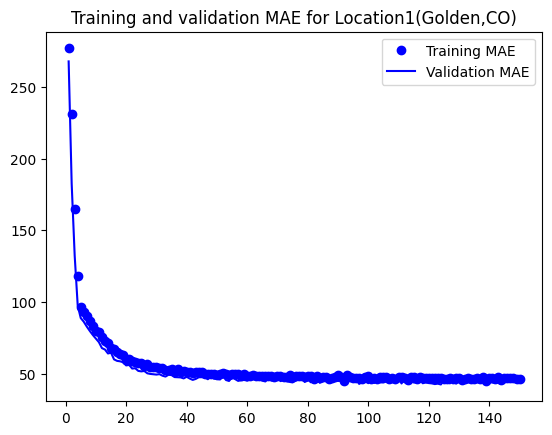

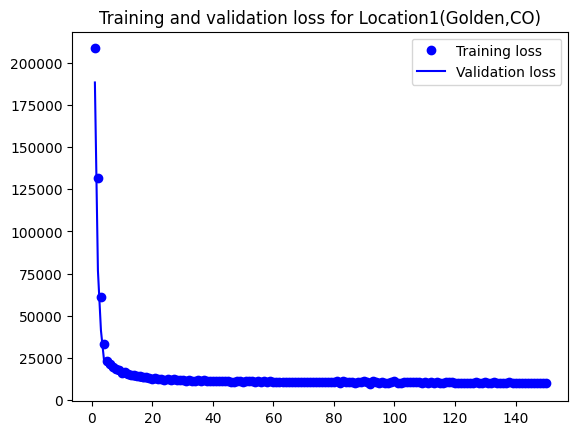

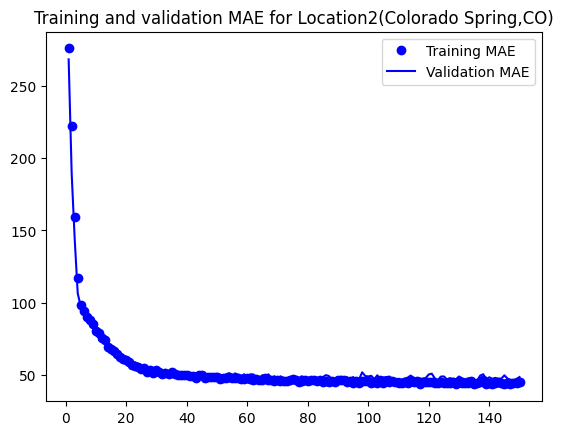

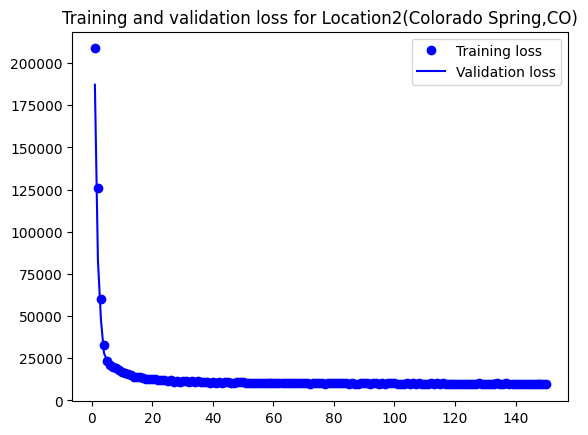

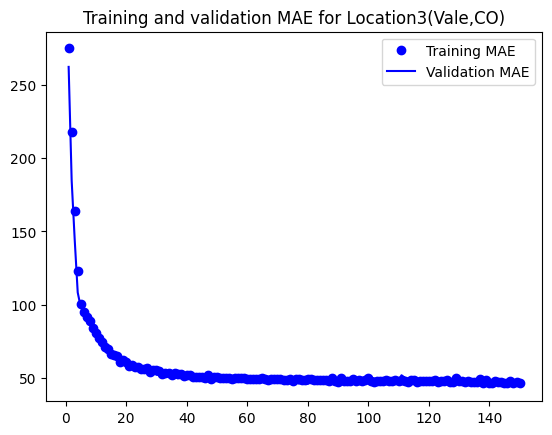

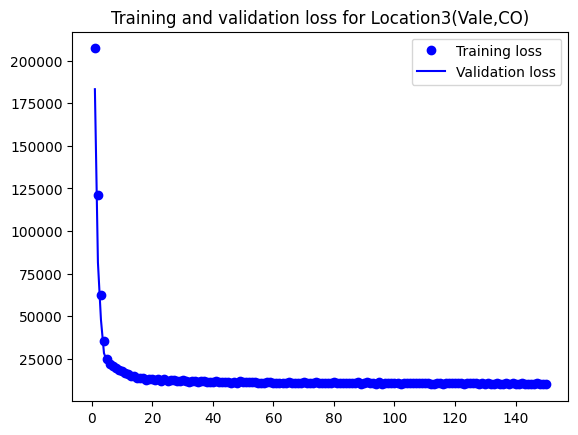

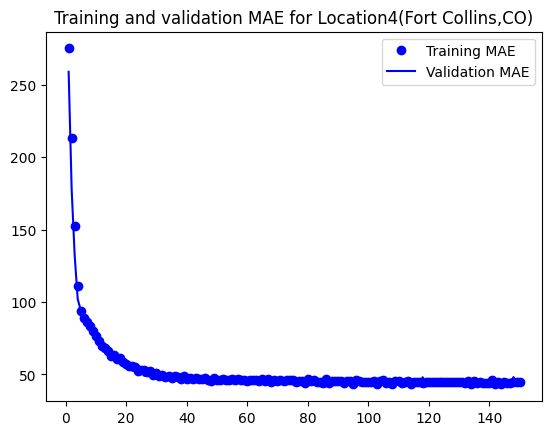

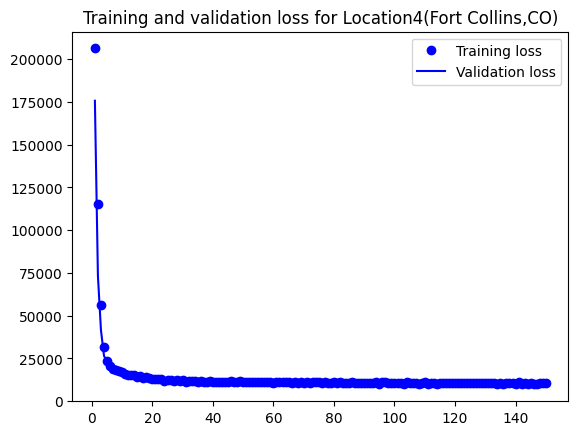

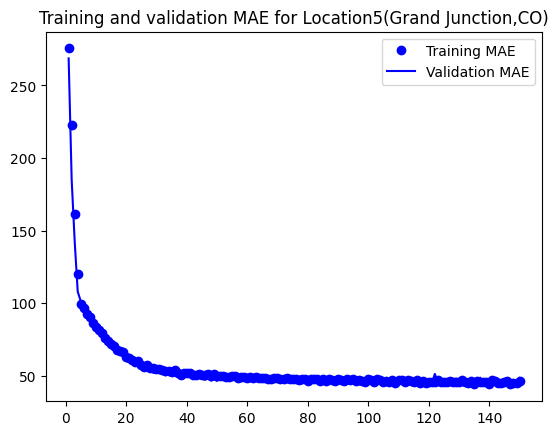

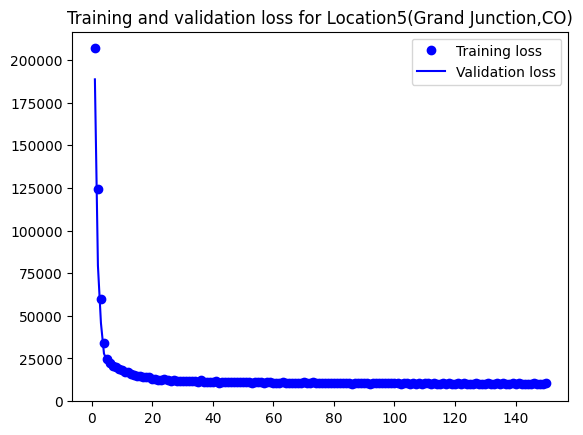

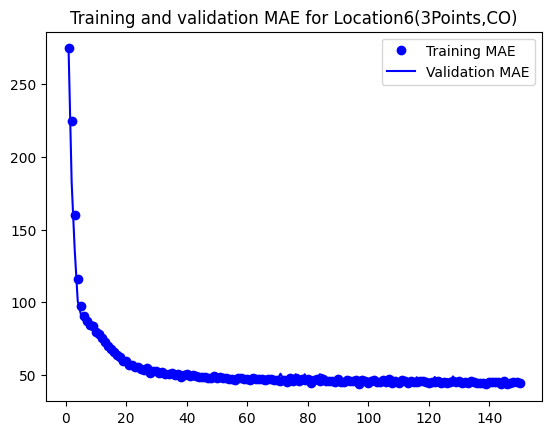

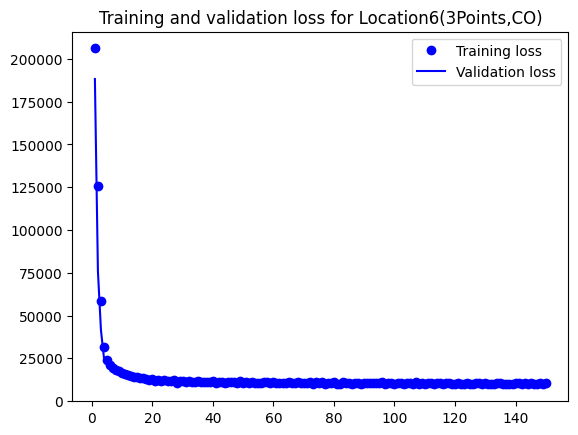

In [143]:
for i in range(locs):
    mae = history_lst[i].history['mae']
    val_mae = history_lst[i].history['val_mae']
    loss = history_lst[i].history['loss']
    val_loss = history_lst[i].history['val_loss']
    
    epochs = range(1, len(mae) + 1)
    plt.clf()
    plt.plot(epochs, mae, 'bo', label='Training MAE')
    plt.plot(epochs, val_mae, 'b', label='Validation MAE')
    plt.title('Training and validation MAE for {}'.format(text[i]))
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss for {}'.format(text[i]))
    plt.legend()
    
    plt.show()

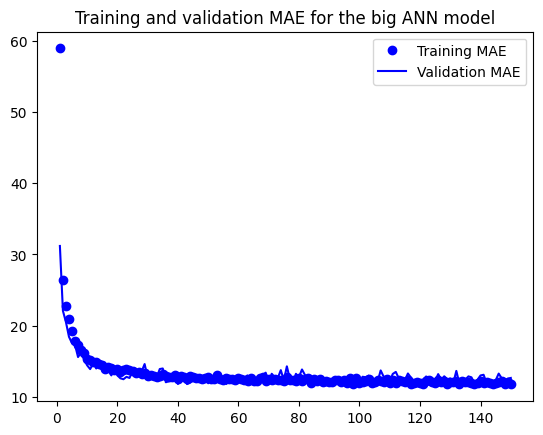

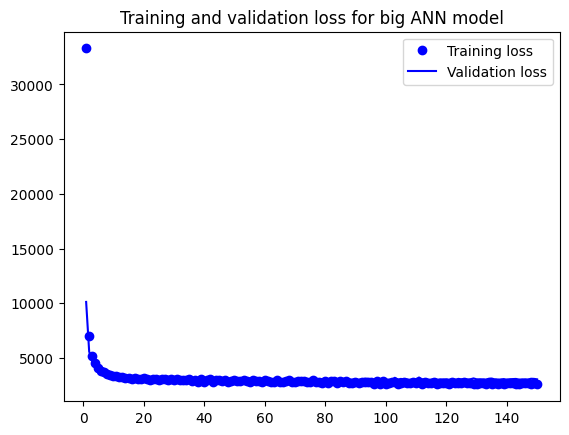

In [144]:
big_mae = big_history.history['mae']
big_val_mae = big_history.history['val_mae']
big_loss = big_history.history['loss']
big_val_loss = big_history.history['val_loss']
    
epochs = range(1, len(big_mae) + 1)
plt.clf()
plt.plot(epochs, big_mae, 'bo', label='Training MAE')
plt.plot(epochs, big_val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE for the big ANN model')
plt.legend()
    
plt.figure()
plt.plot(epochs, big_loss, 'bo', label='Training loss')
plt.plot(epochs, big_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for big ANN model')
plt.legend()
    
plt.show()

In [145]:
k = 5
all_scores_lst = []
num_val_samples = len(trainX_lst[0]) // k
for i in range(locs):
    all_scores = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]

        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE: ' + str(val_mae))
        print('========================')
    all_scores_lst.append(all_scores)


Processing Fold 0
MAE: 47.538238525390625
Processing Fold 1
MAE: 49.81845474243164
Processing Fold 2
MAE: 49.741363525390625
Processing Fold 3
MAE: 47.4849853515625
Processing Fold 4
MAE: 47.29368591308594
Processing Fold 0
MAE: 46.391624450683594
Processing Fold 1
MAE: 45.270877838134766
Processing Fold 2
MAE: 52.9617919921875
Processing Fold 3
MAE: 47.01930236816406
Processing Fold 4
MAE: 47.385009765625
Processing Fold 0
MAE: 49.42877197265625
Processing Fold 1
MAE: 51.400638580322266
Processing Fold 2
MAE: 49.25164031982422
Processing Fold 3
MAE: 46.217552185058594
Processing Fold 4
MAE: 45.33430099487305
Processing Fold 0
MAE: 46.70427322387695
Processing Fold 1
MAE: 44.440032958984375
Processing Fold 2
MAE: 53.923423767089844
Processing Fold 3
MAE: 52.24044418334961
Processing Fold 4
MAE: 48.24402618408203
Processing Fold 0
MAE: 50.545799255371094
Processing Fold 1
MAE: 50.096710205078125
Processing Fold 2
MAE: 53.6269645690918
Processing Fold 3
MAE: 46.113773345947266
Processing

In [146]:
k = 5
big_num_val_samples = len(big_trainX) // k
big_all_scores = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]

    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)

    big_model = build_model()
    big_model.fit(big_partial_train_data, big_partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_val_mse, big_val_mae = big_model.evaluate(big_val_data, big_val_targets, verbose=0)
    big_all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')
    

Processing Fold 0
MAE: 44.96865463256836
Processing Fold 1
MAE: 44.96865463256836
Processing Fold 2
MAE: 44.96865463256836
Processing Fold 3
MAE: 44.96865463256836
Processing Fold 4
MAE: 44.96865463256836


In [147]:
for i in range(locs):
    for j, val in enumerate(all_scores_lst[i]):
        print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds {}: '.format(text[i]) + str(np.mean(all_scores_lst[i])))
    print("================")

Fold 0: MAE of 47.538238525390625
Fold 1: MAE of 49.81845474243164
Fold 2: MAE of 49.741363525390625
Fold 3: MAE of 47.4849853515625
Fold 4: MAE of 47.29368591308594
Mean MAE of all folds Location1(Golden,CO): 48.375345611572264
Fold 0: MAE of 46.391624450683594
Fold 1: MAE of 45.270877838134766
Fold 2: MAE of 52.9617919921875
Fold 3: MAE of 47.01930236816406
Fold 4: MAE of 47.385009765625
Mean MAE of all folds Location2(Colorado Spring,CO): 47.805721282958984
Fold 0: MAE of 49.42877197265625
Fold 1: MAE of 51.400638580322266
Fold 2: MAE of 49.25164031982422
Fold 3: MAE of 46.217552185058594
Fold 4: MAE of 45.33430099487305
Mean MAE of all folds Location3(Vale,CO): 48.32658081054687
Fold 0: MAE of 46.70427322387695
Fold 1: MAE of 44.440032958984375
Fold 2: MAE of 53.923423767089844
Fold 3: MAE of 52.24044418334961
Fold 4: MAE of 48.24402618408203
Mean MAE of all folds Location4(Fort Collins,CO): 49.11044006347656
Fold 0: MAE of 50.545799255371094
Fold 1: MAE of 50.096710205078125
Fold 

In [148]:
for j, val in enumerate(big_all_scores):
    print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds big model: ' + str(np.mean(big_all_scores)))
    print("================")

Fold 0: MAE of 44.96865463256836
Mean MAE of all folds big model: 44.96865463256836
Fold 1: MAE of 44.96865463256836
Mean MAE of all folds big model: 44.96865463256836
Fold 2: MAE of 44.96865463256836
Mean MAE of all folds big model: 44.96865463256836
Fold 3: MAE of 44.96865463256836
Mean MAE of all folds big model: 44.96865463256836
Fold 4: MAE of 44.96865463256836
Mean MAE of all folds big model: 44.96865463256836


In [149]:
all_mae_histories_lst = []
for i in range(locs):
    all_mae_histories = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]],axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    
    all_mae_histories_lst.append(all_mae_histories)

Processing Fold 0


Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [150]:
big_all_mae_histories = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]],axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_model = build_model()
    big_history = big_model.fit(big_partial_train_data, big_partial_train_targets, validation_data=(big_val_data, big_val_targets),
                epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_mae_history = big_history.history['val_mae']
    big_all_mae_histories.append(big_mae_history)
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [151]:
average_mae_history_lst = []
for i in range(locs):
    average_mae_history = [np.mean([x[j] for x in all_mae_histories_lst[i]]) for j in range(n_epochs)]
    average_mae_history_lst.append(average_mae_history)
    print(len(average_mae_history))

150
150
150
150
150
150


In [152]:
big_average_mae_history = [np.mean([x[j] for x in big_all_mae_histories]) for j in range(n_epochs)]
print(len(big_average_mae_history))

150


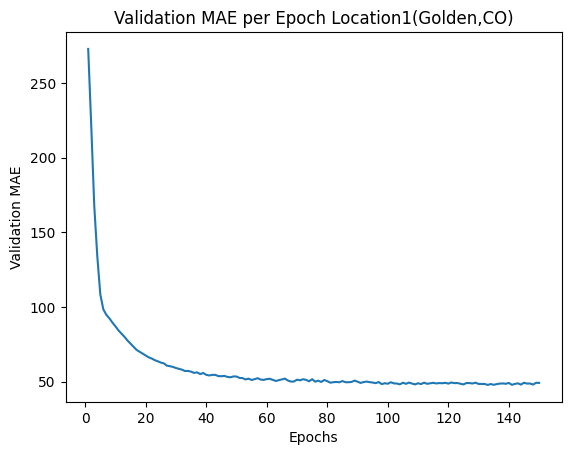

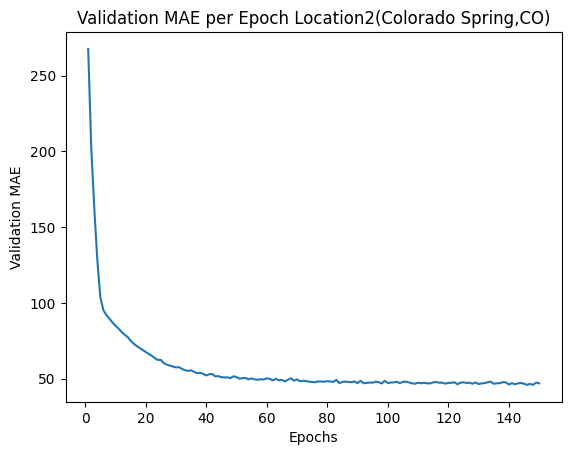

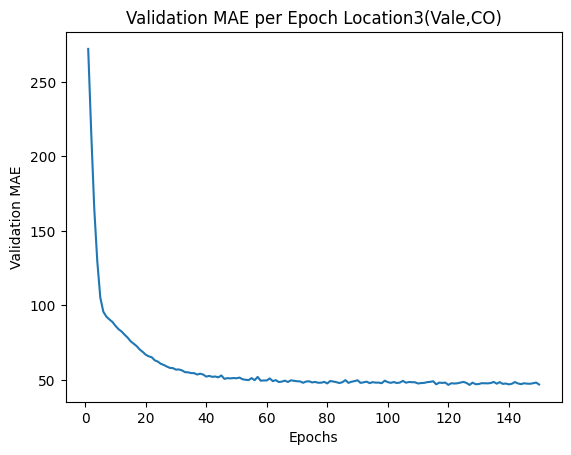

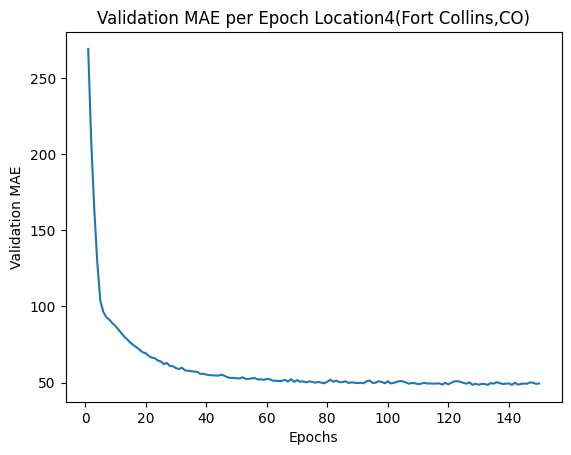

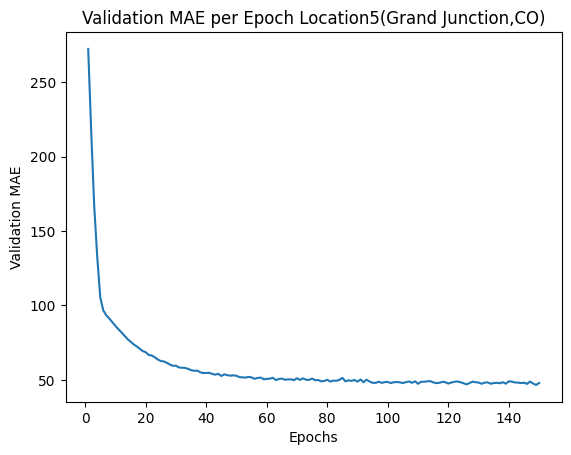

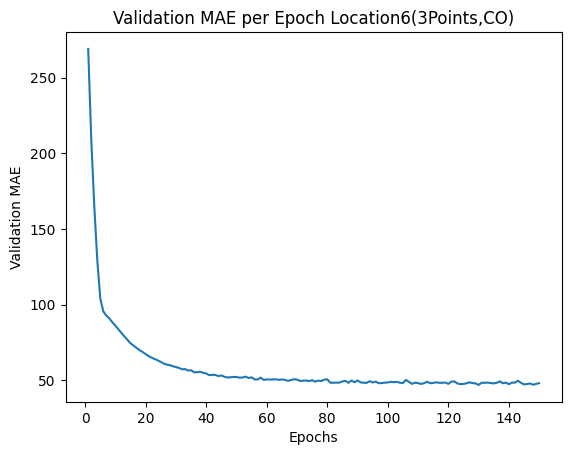

In [153]:
for i in range(locs):
    plt.clf()
    plt.plot(range(1, len(average_mae_history_lst[i]) + 1), average_mae_history_lst[i])
    plt.title('Validation MAE per Epoch {}'.format(text[i]))
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

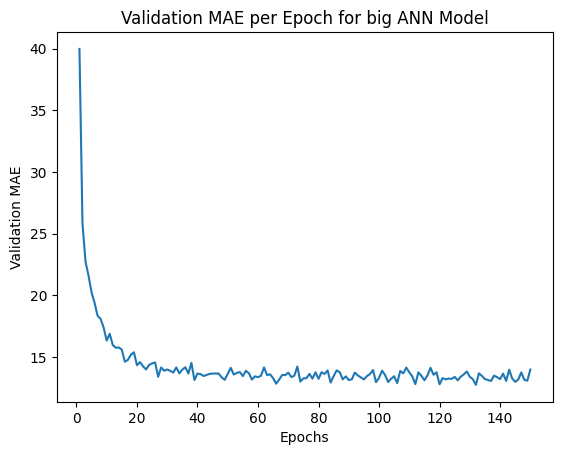

In [154]:
plt.clf()
plt.plot(range(1, len(big_average_mae_history) + 1), big_average_mae_history)
plt.title('Validation MAE per Epoch for big ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [155]:
best_model_lst = []
for i in range(locs):
    model_reloaded = load_model(checkpoint_no_lst[i] + '/' + model_name_lst[i])
    
    # Saving the best model in the correct path and format
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no_lst[i])
    model_name_temp = os.path.join(checkpoint_dir, model_name_lst[i] + '.h5')
    model_reloaded.save(model_name_temp)
    
    # Deletion of the automatically created folder under Model Checkpoint File.
    folder_name_temp = os.path.join(checkpoint_dir, model_name_lst[i])
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    best_model_lst.append(best_model)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.s

In [156]:
big_model_reloaded = load_model(big_checkpoint_no + '/' + big_model_name)
    
# Saving the best model in the correct path and format
root_directory = os.getcwd()
big_checkpoint_dir = os.path.join(root_directory, big_checkpoint_no)
big_model_name_temp = os.path.join(big_checkpoint_dir, big_model_name + '.h5')
big_model_reloaded.save(big_model_name_temp)
    
# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(big_checkpoint_dir, big_model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
big_best_model = load_model(big_model_name_temp)


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [157]:
test_loss_lst = []
test_mae_lst = []
for i in range(locs):
    test_loss, test_mae = best_model_lst[i].evaluate(testX_scaled_lst[i], testY_lst[i], steps=n_test_steps)
    test_loss_lst.append(test_loss)
    test_mae_lst.append(test_mae)
    print()
    print('Test MAE {}:'.format(text[i]), test_mae)

17/17 [==============================] - 0s 596us/step - loss: 11396.4775 - mae: 46.2531

Test MAE Location1(Golden,CO): 46.25307846069336
17/17 [==============================] - 0s 720us/step - loss: 12517.0303 - mae: 51.1100

Test MAE Location2(Colorado Spring,CO): 51.109962463378906
17/17 [==============================] - 0s 632us/step - loss: 10094.6494 - mae: 45.1308

Test MAE Location3(Vale,CO): 45.13079071044922
17/17 [==============================] - 0s 655us/step - loss: 9804.7002 - mae: 44.2950

Test MAE Location4(Fort Collins,CO): 44.295021057128906
17/17 [==============================] - 0s 684us/step - loss: 11237.5098 - mae: 45.7175

Test MAE Location5(Grand Junction,CO): 45.71751403808594
17/17 [==============================] - 0s 809us/step - loss: 10519.0205 - mae: 45.7727

Test MAE Location6(3Points,CO): 45.77273178100586


In [158]:
big_test_loss, big_test_mae = big_best_model.evaluate(big_testX_scaled, big_testY, steps=n_test_steps)
print()
print('Test MAE for big ANN Model:', big_test_mae)

17/17 [==============================] - 0s 912us/step - loss: 2950.3049 - mae: 12.4152

Test MAE for big ANN Model: 12.415210723876953


In [159]:
y_pred_ann_lst = []
for i in range(locs):
    y_pred = best_model_lst[i].predict(testX_scaled_lst[i])
    y_pred_ann_lst.append(y_pred)
    
y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 1ms/step


array([[2.3751625e-01],
       [1.9857986e+01],
       [8.3065735e+01],
       [1.4332756e-01],
       [9.1833356e+02]], dtype=float32)

In [160]:
big_y_pred_ann_lst = []
for i in range(locs):
    y_pred = big_best_model.predict(testX_scaled_lst[i])
    big_y_pred_ann_lst.append(y_pred)
    
big_y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 318us/step


array([[-26.53392  ],
       [  3.9487689],
       [ 73.50895  ],
       [ -3.0812945],
       [885.29034  ]], dtype=float32)

In [161]:
df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    df_results_lst.append(df_results)

df_results_lst[4]

,Actual,Predicted
0,0.0,0.237516
1,884.0,19.857986
2,0.0,83.065735
3,401.0,0.143328
4,0.0,918.333557
...,...,...
3498,0.0,322.827209
3499,749.0,7.918422
3500,877.0,-3.072695
3501,910.0,4.489738


In [162]:
big_df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(big_y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    big_df_results_lst.append(df_results)

big_df_results_lst[4]

,Actual,Predicted
0,0.0,-26.533920
1,884.0,3.948769
2,0.0,73.508949
3,401.0,-3.081295
4,0.0,885.290344
...,...,...
3498,0.0,341.907745
3499,749.0,14.167508
3500,877.0,-84.925377
3501,910.0,-10.380397


In [163]:
for i in range(locs):
    print("Neural Network for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i], squared=False))
    print("=================================================================")
    
    print("Linear Regression for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=================================================================")
    
    print("SVR for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=================================================================\n")
    

Neural Network for Location1(Golden,CO)
Mean Absolute Error: 46.25307987585702
Mean Squared Error: 11396.47799744601
Root Mean Squared Error: 106.75428795812377
Linear Regression for Location1(Golden,CO)
Mean Absolute Error: 59.730069606966644
Mean Squared Error: 12805.556491960073
Root Mean Squared Error: 113.16163878258423
SVR for Location1(Golden,CO)
Mean Absolute Error: 144.15054891890858
Mean Squared Error: 62542.86047750198
Root Mean Squared Error: 250.08570626387663

Neural Network for Location2(Colorado Spring,CO)
Mean Absolute Error: 51.10996179924568
Mean Squared Error: 12517.03153751776
Root Mean Squared Error: 111.8795402990098
Linear Regression for Location2(Colorado Spring,CO)
Mean Absolute Error: 61.63849286341376
Mean Squared Error: 13945.418540998127
Root Mean Squared Error: 118.09072165499764
SVR for Location2(Colorado Spring,CO)
Mean Absolute Error: 146.0316425970605
Mean Squared Error: 63622.22065736855
Root Mean Squared Error: 252.23445572991915

Neural Network for

In [164]:
for i in range(locs):
    print("Neural Network big Model for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i], squared=False))
    print("=================================================================")


Neural Network big Model for Location1(Golden,CO)
Mean Absolute Error: 70.7239703364264
Mean Squared Error: 13781.17622247314
Root Mean Squared Error: 117.3932545867655
Neural Network big Model for Location2(Colorado Spring,CO)
Mean Absolute Error: 73.48822412720041
Mean Squared Error: 14971.571794502963
Root Mean Squared Error: 122.3583744355202
Neural Network big Model for Location3(Vale,CO)
Mean Absolute Error: 70.33534781186029
Mean Squared Error: 12910.000342520205
Root Mean Squared Error: 113.62218244040292
Neural Network big Model for Location4(Fort Collins,CO)
Mean Absolute Error: 67.0103766573367
Mean Squared Error: 12218.639418637078
Root Mean Squared Error: 110.53795465195236
Neural Network big Model for Location5(Grand Junction,CO)
Mean Absolute Error: 70.40271651876711
Mean Squared Error: 13694.100520045191
Root Mean Squared Error: 117.0217950641896
Neural Network big Model for Location6(3Points,CO)
Mean Absolute Error: 70.11032109943893
Mean Squared Error: 13304.896183183

In [165]:
# make the time stamp matches the test Y
test_size = testY_lst[0].shape[0]
shifted_df = dfs[0].iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


In [166]:
#get the best day!
k = 22
day_long = 38
for i in range(locs):
    day1 = y_pred_ann_lst[i][:k]
    print(day1)
    err =[]
    err.append(metrics.mean_absolute_error(testY_lst[i][:k], y_pred_ann_lst[i][:k]))
    for j in range(k, y_pred.shape[0], day_long):
        err.append(metrics.mean_absolute_error(testY[j:j+day_long], y_pred[j:j+day_long]))
    
    print("min error ", min(err))
    print("position of best day ", err.index(min(err)))
    day_ind = day_long * (err.index(min(err))) + 15
    print(day_ind)


[[ 2.3751625e-01]
 [ 1.9857986e+01]
 [ 8.3065735e+01]
 [ 1.4332756e-01]
 [ 9.1833356e+02]
 [ 4.5731106e+00]
 [-5.3497791e+00]
 [ 2.2527168e+00]
 [ 4.2131071e+00]
 [ 7.4626355e+02]
 [ 3.4145154e+02]
 [ 5.6282413e-01]
 [ 1.1044130e+01]
 [ 2.7482187e+01]
 [-3.4715188e+00]
 [ 3.1857641e+00]
 [ 5.7724445e+02]
 [-5.8027110e+00]
 [-4.0639572e+00]
 [ 6.8363226e+02]
 [ 7.1130835e+02]
 [ 1.1125568e+00]]
min error  24.119847305796362
position of best day  0
15
[[ 4.6647079e+02]
 [-5.3059235e+00]
 [ 1.8948326e+02]
 [ 7.9254608e+00]
 [ 2.0199583e+00]
 [ 1.0055584e+01]
 [-7.9315197e-01]
 [ 9.9941933e+01]
 [ 8.0706445e+02]
 [ 1.3666100e+01]
 [ 8.3974207e+02]
 [-2.6821597e+00]
 [-8.7740555e+00]
 [ 8.8388214e+02]
 [ 7.2743140e+02]
 [ 1.5233902e+01]
 [ 3.5759962e+00]
 [ 9.0930908e+02]
 [ 2.6568601e+00]
 [ 2.8044736e+00]
 [-1.4495469e+00]
 [ 2.2271421e+00]]
min error  17.02618144858967
position of best day  0
15
[[ 2.5131741e+01]
 [ 7.1608704e+02]
 [ 6.7403058e+02]
 [ 4.5797262e+00]
 [-2.3032551e+00]
 [-

min error  26.21927506273443
position of best day  0
15


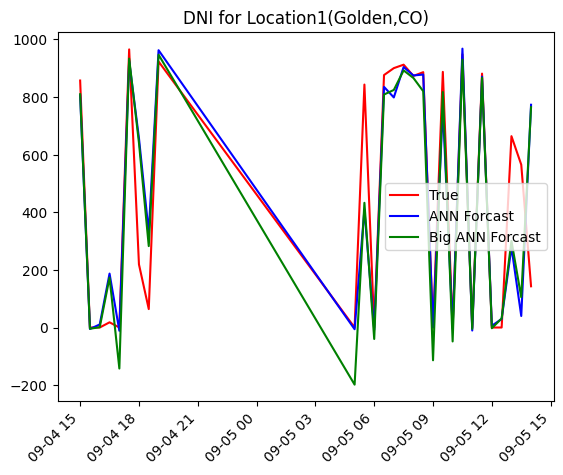

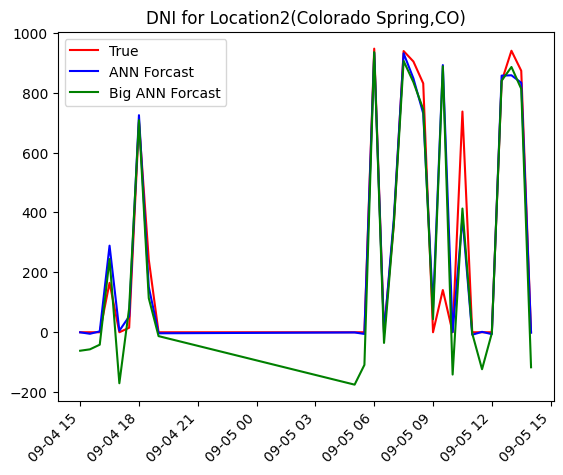

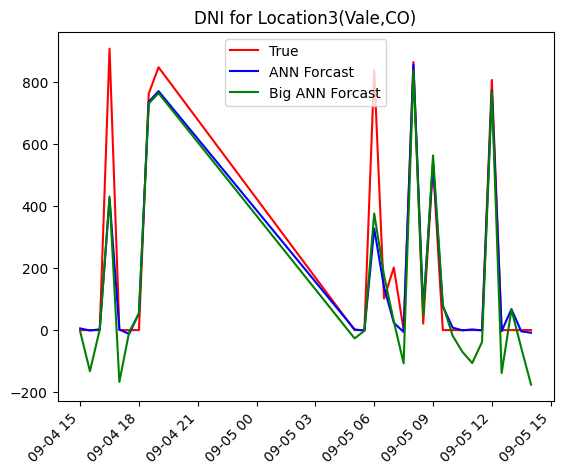

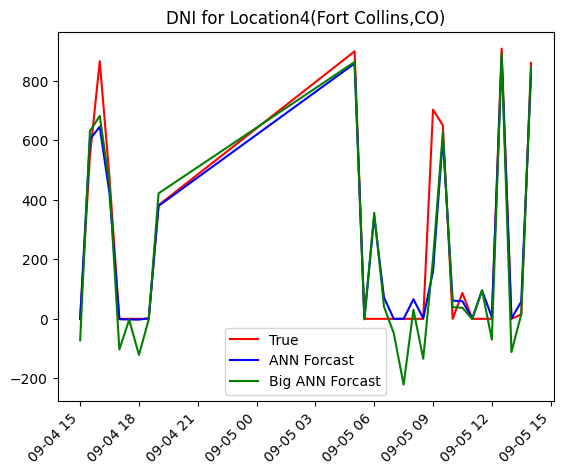

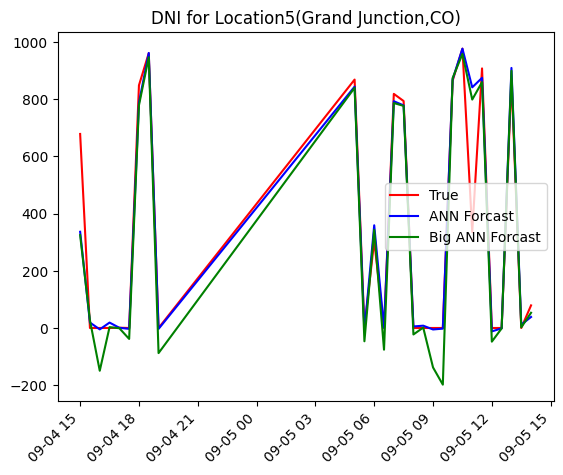

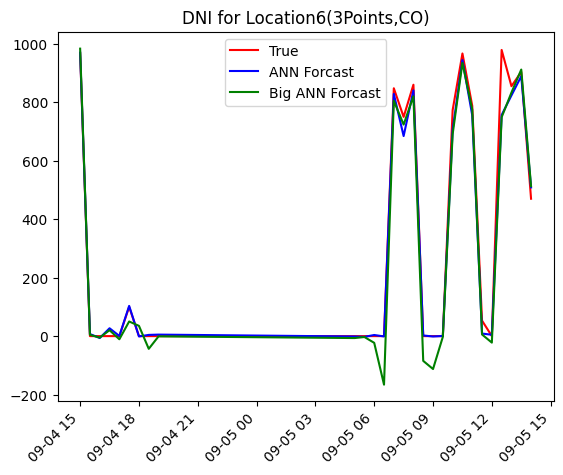

In [167]:
for i in range(locs):
    plt.clf()
    plt.title('DNI for {}'.format(text[i]))
    plt.plot(timest[72:72+28], testY_lst[i][72:72+28], 'r', label='True')
    plt.plot(timest[72:72+28], y_pred_ann_lst[i][72:72+28], 'b', label='ANN Forcast')
    plt.plot(timest[72:72+28], big_y_pred_ann_lst[i][72:72+28], 'g', label='Big ANN Forcast')
    
    # plt.plot(timest[82:82+38], y_pred_svr_lst[i][82:82+38], 'y', label='SVR Forcast')
    # plt.plot(timest[82:82+38], y_pred_linreg_lst[i][82:82+38], 'g', label='LinearReg Forcast')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

<Figure size 3000x3000 with 0 Axes>

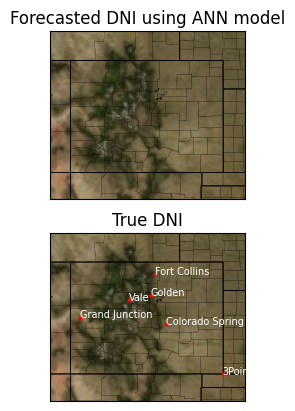

In [190]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30)) 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()

for i in range(locs):
    x,y = m2(P_lons[i], P_lats[i])
    m2.plot(x,y, 'ro', markersize=2)
    plt.text(x+300, y+100, text[i][10:-4], fontsize=7, color='w')


plt.show()

In [169]:
# Moving results to another file
import pickle
for i in range(locs):
    y_trans_ann_lst = list(np.reshape(y_pred_ann_lst[i],y_pred_ann_lst[i].shape[0]))
    y_trans_true_lst = list(np.reshape(testY_lst[i], testY_lst[0].shape[0]))
    
    with open("pred_nn{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_ann_lst, fp)

    with open("true_y{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_true_lst, fp)

In [170]:
################# Skip this cell, it worked better in a sperete file ####################
# import matplotlib.animation as animation 
# from matplotlib.animation import PillowWriter

# point = m.plot(x, y, 'ro', markersize=5)[0]

# def init(): 
#     point.set_markersize(0)
#     return point,

# # animation function.  This is called sequentially
# def animate(i):
#     s = 0.05 * i
#     # point.set_linewidth(s)
#     # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
#     point.set_markersize(s)
#     return point, 
#     # m.bluemarble()
#     # m.drawstates()
#     # m.drawcounties()
    
#     # x,y = m(p1_lon, p1_lat)
#     # m.plot(x, y, 'yo', markersize=s)

# anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# # writer = PillowWriter(fps=30)
# # anim.save("myMap.gif", writer=writer)

# # plt.tight_layout()
# plt.show()
# # anim.save('animatedMap.mp4', writer = 'sa', fps = 30)